In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.
/home/joe/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/joe/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/joe/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/joe/anacond

In [2]:
df = pd.read_csv("../../data/TOTAL_DATA.csv")
original_df = pd.read_csv("../../data/TOTAL_DATA.csv")

In [3]:
df.pop("Time_Stamp")

0        2/2/2015 14:19
1        2/2/2015 14:19
2        2/2/2015 14:21
3        2/2/2015 14:22
4        2/2/2015 14:23
              ...      
20555    2/18/2015 9:15
20556    2/18/2015 9:16
20557    2/18/2015 9:16
20558    2/18/2015 9:17
20559    2/18/2015 9:19
Name: Time_Stamp, Length: 20560, dtype: object

In [4]:
df

Temperature  Humidity       Light          CO2  HumidityRatio  \
0          23.7000   26.2720  585.200000   749.200000       0.004764   
1          23.7180   26.2900  578.400000   760.400000       0.004773   
2          23.7300   26.2300  572.666667   769.666667       0.004765   
3          23.7225   26.1250  493.750000   774.750000       0.004744   
4          23.7540   26.2000  488.600000   779.000000       0.004767   
...            ...       ...         ...          ...            ...   
20555      20.8150   27.7175  429.750000  1505.250000       0.004213   
20556      20.8650   27.7450  423.500000  1514.500000       0.004230   
20557      20.8900   27.7450  423.500000  1521.500000       0.004237   
20558      20.8900   28.0225  418.750000  1632.000000       0.004279   
20559      21.0000   28.1000  409.000000  1864.000000       0.004321   

       Occupancy  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
20555          1  
20556          1  
20557          1  
20558          1  
20559          1  

[20560 rows x 6 columns]

In [5]:
df.pop("HumidityRatio")

0        0.004764
1        0.004773
2        0.004765
3        0.004744
4        0.004767
           ...   
20555    0.004213
20556    0.004230
20557    0.004237
20558    0.004279
20559    0.004321
Name: HumidityRatio, Length: 20560, dtype: float64

In [6]:
df = df.sample(frac=1).reset_index(drop=True)

In [7]:
label = "Occupancy"
features = ["Temperature", "Humidity", "Light", "CO2"]

In [8]:
for col in df.columns:
    if (col not in features) & (col != label):
        df.pop(col)

In [9]:
df.head()

Temperature  Humidity       Light          CO2  Occupancy
0        20.00    35.790   40.000000   514.500000          0
1        22.50    27.000  460.666667  1074.333333          1
2        22.39    30.000  454.000000   586.000000          1
3        21.39    24.290  451.500000   781.000000          1
4        21.20    27.245    0.000000   727.000000          0

In [10]:
for i in features:
    df[i] = (df[i] - df[i].mean()) / df[i].std()

In [11]:
x = [[df["Temperature"][i], df["Humidity"][i], df["Light"][i], df["CO2"][i]] for i in range(len(df))]
y = [[df["Occupancy"][i]] for i in range(len(df))]

In [12]:
x

[[-0.8587129401659417,
  1.6326423836057564,
  -0.4312894769266646,
  -0.565721566759259],
 [1.5102489760057876,
  -0.13165487037712292,
  1.5677834529451333,
  1.2332213272958426],
 [1.406014651694232,
  0.4704943630641329,
  1.5361024237896856,
  -0.33596672841179004],
 [0.45842988522554023,
  -0.6755963445857242,
  1.5242220379157947,
  0.29063737617221613],
 [0.2783887795964876,
  -0.08247934964608683,
  -0.6213756509089207,
  0.11711623951818366],
 [0.4844884663034291,
  -1.8377443651273477,
  0.7484328403507122,
  -0.7360293490308094],
 [-0.8587129401659417,
  1.7550793944054783,
  -0.5881105704620259,
  -0.6123152053052492],
 [-0.48915488124315143,
  -0.08247934964608683,
  -0.6213756509089207,
  0.5589524671094701],
 [-1.436739647711843,
  -0.09151158814770602,
  -0.6213756509089207,
  -0.8533167839914054],
 [-1.3325053234002875,
  -0.23201307595066556,
  -0.6213756509089207,
  -0.7408493806045325],
 [-0.8587129401659417,
  -1.7885688443963117,
  -0.6213756509089207,
  -0.80993

In [13]:
x = np.asarray(x, dtype=np.dtype("float32"))
y = np.asarray(y, dtype=np.dtype("int32"))

In [14]:
train_len = int(len(df) * 0.85)


x_train = x[:train_len]
x_val = x[train_len:]

y_train = y[:train_len]
y_val = y[train_len:]

In [15]:
checkpoint = ModelCheckpoint("./weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [16]:
model = models.Sequential()
model.add(layers.Dense(32, activation="relu", input_shape=(4,)))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [18]:
history = model.fit(x_train, y_train, epochs=10000, batch_size=17476, validation_data=(x_val, y_val), callbacks=[checkpoint])


Train on 17476 samples, validate on 3084 samples
Epoch 1/10000
17476/17476 [==============================] - 0s 7us/step - loss: 0.7223 - accuracy: 0.2696 - val_loss: 0.6973 - val_accuracy: 0.5603

Epoch 00001: val_accuracy improved from -inf to 0.56031, saving model to ./weights.h5
Epoch 2/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.6967 - accuracy: 0.5528 - val_loss: 0.6798 - val_accuracy: 0.7309

Epoch 00002: val_accuracy improved from 0.56031 to 0.73087, saving model to ./weights.h5
Epoch 3/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.6788 - accuracy: 0.7259 - val_loss: 0.6654 - val_accuracy: 0.7720

Epoch 00003: val_accuracy improved from 0.73087 to 0.77205, saving model to ./weights.h5
Epoch 4/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.6641 - accuracy: 0.7695 - val_loss: 0.6527 - val_accuracy: 0.7798

Epoch 00004: val_accuracy improved from 0.77205 to 0.77983, saving model to ./weights.

17476/17476 [==============================] - 0s 0us/step - loss: 0.4119 - accuracy: 0.9391 - val_loss: 0.4094 - val_accuracy: 0.9381

Epoch 00034: val_accuracy improved from 0.93774 to 0.93807, saving model to ./weights.h5
Epoch 35/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.4050 - accuracy: 0.9401 - val_loss: 0.4027 - val_accuracy: 0.9397

Epoch 00035: val_accuracy improved from 0.93807 to 0.93969, saving model to ./weights.h5
Epoch 36/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.3983 - accuracy: 0.9411 - val_loss: 0.3961 - val_accuracy: 0.9407

Epoch 00036: val_accuracy improved from 0.93969 to 0.94066, saving model to ./weights.h5
Epoch 37/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.3916 - accuracy: 0.9419 - val_loss: 0.3895 - val_accuracy: 0.9413

Epoch 00037: val_accuracy improved from 0.94066 to 0.94131, saving model to ./weights.h5
Epoch 38/10000
17476/17476 [===========================

Epoch 69/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.2141 - accuracy: 0.9610 - val_loss: 0.2140 - val_accuracy: 0.9588

Epoch 00069: val_accuracy improved from 0.95720 to 0.95882, saving model to ./weights.h5
Epoch 70/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.2098 - accuracy: 0.9617 - val_loss: 0.2097 - val_accuracy: 0.9595

Epoch 00070: val_accuracy improved from 0.95882 to 0.95947, saving model to ./weights.h5
Epoch 71/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.2056 - accuracy: 0.9628 - val_loss: 0.2056 - val_accuracy: 0.9611

Epoch 00071: val_accuracy improved from 0.95947 to 0.96109, saving model to ./weights.h5
Epoch 72/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.2014 - accuracy: 0.9642 - val_loss: 0.2015 - val_accuracy: 0.9617

Epoch 00072: val_accuracy improved from 0.96109 to 0.96174, saving model to ./weights.h5
Epoch 73/10000
17476/17476 [============

Epoch 105/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.1024 - accuracy: 0.9800 - val_loss: 0.1039 - val_accuracy: 0.9789

Epoch 00105: val_accuracy improved from 0.97860 to 0.97892, saving model to ./weights.h5
Epoch 106/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.1004 - accuracy: 0.9808 - val_loss: 0.1020 - val_accuracy: 0.9792

Epoch 00106: val_accuracy improved from 0.97892 to 0.97925, saving model to ./weights.h5
Epoch 107/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0984 - accuracy: 0.9816 - val_loss: 0.1001 - val_accuracy: 0.9796

Epoch 00107: val_accuracy improved from 0.97925 to 0.97957, saving model to ./weights.h5
Epoch 108/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0966 - accuracy: 0.9820 - val_loss: 0.0983 - val_accuracy: 0.9796

Epoch 00108: val_accuracy did not improve from 0.97957
Epoch 109/10000
17476/17476 [==============================] - 0s 0us/


Epoch 00141: val_accuracy did not improve from 0.98606
Epoch 142/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0579 - accuracy: 0.9871 - val_loss: 0.0614 - val_accuracy: 0.9861

Epoch 00142: val_accuracy did not improve from 0.98606
Epoch 143/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0573 - accuracy: 0.9871 - val_loss: 0.0609 - val_accuracy: 0.9857

Epoch 00143: val_accuracy did not improve from 0.98606
Epoch 144/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0568 - accuracy: 0.9872 - val_loss: 0.0604 - val_accuracy: 0.9857

Epoch 00144: val_accuracy did not improve from 0.98606
Epoch 145/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0563 - accuracy: 0.9872 - val_loss: 0.0599 - val_accuracy: 0.9857

Epoch 00145: val_accuracy did not improve from 0.98606
Epoch 146/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0558 - accuracy: 0.9872 - val_l


Epoch 00180: val_accuracy did not improve from 0.98735
Epoch 181/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0468 - accuracy: 0.9887 - val_loss: 0.0508 - val_accuracy: 0.9874

Epoch 00181: val_accuracy did not improve from 0.98735
Epoch 182/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0467 - accuracy: 0.9887 - val_loss: 0.0506 - val_accuracy: 0.9874

Epoch 00182: val_accuracy did not improve from 0.98735
Epoch 183/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0465 - accuracy: 0.9888 - val_loss: 0.0505 - val_accuracy: 0.9874

Epoch 00183: val_accuracy did not improve from 0.98735
Epoch 184/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0464 - accuracy: 0.9888 - val_loss: 0.0504 - val_accuracy: 0.9874

Epoch 00184: val_accuracy did not improve from 0.98735
Epoch 185/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0463 - accuracy: 0.9887 - val_l

17476/17476 [==============================] - 0s 0us/step - loss: 0.0436 - accuracy: 0.9888 - val_loss: 0.0473 - val_accuracy: 0.9877

Epoch 00220: val_accuracy did not improve from 0.98800
Epoch 221/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0436 - accuracy: 0.9890 - val_loss: 0.0473 - val_accuracy: 0.9877

Epoch 00221: val_accuracy did not improve from 0.98800
Epoch 222/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0435 - accuracy: 0.9888 - val_loss: 0.0472 - val_accuracy: 0.9877

Epoch 00222: val_accuracy did not improve from 0.98800
Epoch 223/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0435 - accuracy: 0.9890 - val_loss: 0.0472 - val_accuracy: 0.9877

Epoch 00223: val_accuracy did not improve from 0.98800
Epoch 224/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0434 - accuracy: 0.9888 - val_loss: 0.0471 - val_accuracy: 0.9877

Epoch 00224: val_accuracy did not im


Epoch 00259: val_accuracy did not improve from 0.98800
Epoch 260/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0418 - accuracy: 0.9890 - val_loss: 0.0455 - val_accuracy: 0.9874

Epoch 00260: val_accuracy did not improve from 0.98800
Epoch 261/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0417 - accuracy: 0.9890 - val_loss: 0.0455 - val_accuracy: 0.9874

Epoch 00261: val_accuracy did not improve from 0.98800
Epoch 262/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0417 - accuracy: 0.9890 - val_loss: 0.0454 - val_accuracy: 0.9874

Epoch 00262: val_accuracy did not improve from 0.98800
Epoch 263/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0416 - accuracy: 0.9890 - val_loss: 0.0455 - val_accuracy: 0.9874

Epoch 00263: val_accuracy did not improve from 0.98800
Epoch 264/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0416 - accuracy: 0.9890 - val_l


Epoch 00299: val_accuracy did not improve from 0.98800
Epoch 300/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0403 - accuracy: 0.9890 - val_loss: 0.0442 - val_accuracy: 0.9874

Epoch 00300: val_accuracy did not improve from 0.98800
Epoch 301/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0402 - accuracy: 0.9890 - val_loss: 0.0443 - val_accuracy: 0.9874

Epoch 00301: val_accuracy did not improve from 0.98800
Epoch 302/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0402 - accuracy: 0.9890 - val_loss: 0.0441 - val_accuracy: 0.9874

Epoch 00302: val_accuracy did not improve from 0.98800
Epoch 303/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0402 - accuracy: 0.9890 - val_loss: 0.0442 - val_accuracy: 0.9874

Epoch 00303: val_accuracy did not improve from 0.98800
Epoch 304/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0401 - accuracy: 0.9890 - val_l


Epoch 00339: val_accuracy did not improve from 0.98800
Epoch 340/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0390 - accuracy: 0.9891 - val_loss: 0.0433 - val_accuracy: 0.9877

Epoch 00340: val_accuracy did not improve from 0.98800
Epoch 341/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0390 - accuracy: 0.9891 - val_loss: 0.0434 - val_accuracy: 0.9870

Epoch 00341: val_accuracy did not improve from 0.98800
Epoch 342/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0390 - accuracy: 0.9891 - val_loss: 0.0433 - val_accuracy: 0.9877

Epoch 00342: val_accuracy did not improve from 0.98800
Epoch 343/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0389 - accuracy: 0.9891 - val_loss: 0.0434 - val_accuracy: 0.9870

Epoch 00343: val_accuracy did not improve from 0.98800
Epoch 344/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0389 - accuracy: 0.9891 - val_l


Epoch 00379: val_accuracy did not improve from 0.98800
Epoch 380/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0379 - accuracy: 0.9891 - val_loss: 0.0426 - val_accuracy: 0.9874

Epoch 00380: val_accuracy did not improve from 0.98800
Epoch 381/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0379 - accuracy: 0.9892 - val_loss: 0.0426 - val_accuracy: 0.9874

Epoch 00381: val_accuracy did not improve from 0.98800
Epoch 382/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0378 - accuracy: 0.9891 - val_loss: 0.0425 - val_accuracy: 0.9874

Epoch 00382: val_accuracy did not improve from 0.98800
Epoch 383/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0378 - accuracy: 0.9892 - val_loss: 0.0426 - val_accuracy: 0.9874

Epoch 00383: val_accuracy did not improve from 0.98800
Epoch 384/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0378 - accuracy: 0.9891 - val_l


Epoch 00419: val_accuracy did not improve from 0.98800
Epoch 420/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0368 - accuracy: 0.9892 - val_loss: 0.0418 - val_accuracy: 0.9874

Epoch 00420: val_accuracy did not improve from 0.98800
Epoch 421/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0368 - accuracy: 0.9894 - val_loss: 0.0418 - val_accuracy: 0.9874

Epoch 00421: val_accuracy did not improve from 0.98800
Epoch 422/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0368 - accuracy: 0.9892 - val_loss: 0.0417 - val_accuracy: 0.9874

Epoch 00422: val_accuracy did not improve from 0.98800
Epoch 423/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0367 - accuracy: 0.9894 - val_loss: 0.0418 - val_accuracy: 0.9874

Epoch 00423: val_accuracy did not improve from 0.98800
Epoch 424/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0367 - accuracy: 0.9893 - val_l


Epoch 00459: val_accuracy did not improve from 0.98800
Epoch 460/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0358 - accuracy: 0.9895 - val_loss: 0.0411 - val_accuracy: 0.9874

Epoch 00460: val_accuracy did not improve from 0.98800
Epoch 461/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0358 - accuracy: 0.9895 - val_loss: 0.0412 - val_accuracy: 0.9877

Epoch 00461: val_accuracy did not improve from 0.98800
Epoch 462/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0358 - accuracy: 0.9895 - val_loss: 0.0410 - val_accuracy: 0.9874

Epoch 00462: val_accuracy did not improve from 0.98800
Epoch 463/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0357 - accuracy: 0.9895 - val_loss: 0.0411 - val_accuracy: 0.9877

Epoch 00463: val_accuracy did not improve from 0.98800
Epoch 464/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0357 - accuracy: 0.9895 - val_l


Epoch 00499: val_accuracy did not improve from 0.98800
Epoch 500/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0350 - accuracy: 0.9896 - val_loss: 0.0405 - val_accuracy: 0.9877

Epoch 00500: val_accuracy did not improve from 0.98800
Epoch 501/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0350 - accuracy: 0.9897 - val_loss: 0.0406 - val_accuracy: 0.9877

Epoch 00501: val_accuracy did not improve from 0.98800
Epoch 502/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0350 - accuracy: 0.9896 - val_loss: 0.0404 - val_accuracy: 0.9877

Epoch 00502: val_accuracy did not improve from 0.98800
Epoch 503/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0350 - accuracy: 0.9897 - val_loss: 0.0405 - val_accuracy: 0.9877

Epoch 00503: val_accuracy did not improve from 0.98800
Epoch 504/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0350 - accuracy: 0.9896 - val_l


Epoch 00539: val_accuracy did not improve from 0.98800
Epoch 540/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0344 - accuracy: 0.9898 - val_loss: 0.0400 - val_accuracy: 0.9877

Epoch 00540: val_accuracy did not improve from 0.98800
Epoch 541/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0343 - accuracy: 0.9898 - val_loss: 0.0401 - val_accuracy: 0.9877

Epoch 00541: val_accuracy did not improve from 0.98800
Epoch 542/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0343 - accuracy: 0.9898 - val_loss: 0.0399 - val_accuracy: 0.9877

Epoch 00542: val_accuracy did not improve from 0.98800
Epoch 543/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0343 - accuracy: 0.9898 - val_loss: 0.0401 - val_accuracy: 0.9877

Epoch 00543: val_accuracy did not improve from 0.98800
Epoch 544/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0343 - accuracy: 0.9898 - val_l


Epoch 00579: val_accuracy did not improve from 0.98800
Epoch 580/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0338 - accuracy: 0.9898 - val_loss: 0.0396 - val_accuracy: 0.9877

Epoch 00580: val_accuracy did not improve from 0.98800
Epoch 581/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0338 - accuracy: 0.9898 - val_loss: 0.0397 - val_accuracy: 0.9877

Epoch 00581: val_accuracy did not improve from 0.98800
Epoch 582/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0337 - accuracy: 0.9898 - val_loss: 0.0395 - val_accuracy: 0.9877

Epoch 00582: val_accuracy did not improve from 0.98800
Epoch 583/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0337 - accuracy: 0.9898 - val_loss: 0.0397 - val_accuracy: 0.9877

Epoch 00583: val_accuracy did not improve from 0.98800
Epoch 584/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0337 - accuracy: 0.9898 - val_l


Epoch 00619: val_accuracy did not improve from 0.98800
Epoch 620/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0333 - accuracy: 0.9898 - val_loss: 0.0392 - val_accuracy: 0.9877

Epoch 00620: val_accuracy did not improve from 0.98800
Epoch 621/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0393 - val_accuracy: 0.9877

Epoch 00621: val_accuracy did not improve from 0.98800
Epoch 622/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0392 - val_accuracy: 0.9877

Epoch 00622: val_accuracy did not improve from 0.98800
Epoch 623/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0393 - val_accuracy: 0.9877

Epoch 00623: val_accuracy did not improve from 0.98800
Epoch 624/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0332 - accuracy: 0.9898 - val_l


Epoch 00659: val_accuracy did not improve from 0.98800
Epoch 660/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.0390 - val_accuracy: 0.9877

Epoch 00660: val_accuracy did not improve from 0.98800
Epoch 661/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0328 - accuracy: 0.9899 - val_loss: 0.0391 - val_accuracy: 0.9877

Epoch 00661: val_accuracy did not improve from 0.98800
Epoch 662/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.0389 - val_accuracy: 0.9877

Epoch 00662: val_accuracy did not improve from 0.98800
Epoch 663/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0328 - accuracy: 0.9899 - val_loss: 0.0391 - val_accuracy: 0.9877

Epoch 00663: val_accuracy did not improve from 0.98800
Epoch 664/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0328 - accuracy: 0.9898 - val_l


Epoch 00699: val_accuracy did not improve from 0.98800
Epoch 700/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0387 - val_accuracy: 0.9880

Epoch 00700: val_accuracy did not improve from 0.98800
Epoch 701/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0324 - accuracy: 0.9899 - val_loss: 0.0388 - val_accuracy: 0.9877

Epoch 00701: val_accuracy did not improve from 0.98800
Epoch 702/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0387 - val_accuracy: 0.9880

Epoch 00702: val_accuracy did not improve from 0.98800
Epoch 703/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0324 - accuracy: 0.9899 - val_loss: 0.0388 - val_accuracy: 0.9877

Epoch 00703: val_accuracy did not improve from 0.98800
Epoch 704/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0324 - accuracy: 0.9898 - val_l


Epoch 00739: val_accuracy did not improve from 0.98800
Epoch 740/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0321 - accuracy: 0.9898 - val_loss: 0.0385 - val_accuracy: 0.9880

Epoch 00740: val_accuracy did not improve from 0.98800
Epoch 741/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0321 - accuracy: 0.9899 - val_loss: 0.0386 - val_accuracy: 0.9877

Epoch 00741: val_accuracy did not improve from 0.98800
Epoch 742/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0320 - accuracy: 0.9898 - val_loss: 0.0385 - val_accuracy: 0.9880

Epoch 00742: val_accuracy did not improve from 0.98800
Epoch 743/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0320 - accuracy: 0.9899 - val_loss: 0.0386 - val_accuracy: 0.9877

Epoch 00743: val_accuracy did not improve from 0.98800
Epoch 744/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0320 - accuracy: 0.9898 - val_l


Epoch 00779: val_accuracy did not improve from 0.98800
Epoch 780/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0382 - val_accuracy: 0.9880

Epoch 00780: val_accuracy did not improve from 0.98800
Epoch 781/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0383 - val_accuracy: 0.9880

Epoch 00781: val_accuracy did not improve from 0.98800
Epoch 782/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0382 - val_accuracy: 0.9880

Epoch 00782: val_accuracy did not improve from 0.98800
Epoch 783/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0383 - val_accuracy: 0.9880

Epoch 00783: val_accuracy did not improve from 0.98800
Epoch 784/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0317 - accuracy: 0.9899 - val_l


Epoch 00819: val_accuracy did not improve from 0.98833
Epoch 820/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0314 - accuracy: 0.9899 - val_loss: 0.0380 - val_accuracy: 0.9880

Epoch 00820: val_accuracy did not improve from 0.98833
Epoch 821/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0314 - accuracy: 0.9900 - val_loss: 0.0381 - val_accuracy: 0.9883

Epoch 00821: val_accuracy did not improve from 0.98833
Epoch 822/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0314 - accuracy: 0.9899 - val_loss: 0.0380 - val_accuracy: 0.9880

Epoch 00822: val_accuracy did not improve from 0.98833
Epoch 823/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0314 - accuracy: 0.9899 - val_loss: 0.0381 - val_accuracy: 0.9883

Epoch 00823: val_accuracy did not improve from 0.98833
Epoch 824/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0314 - accuracy: 0.9899 - val_l


Epoch 00859: val_accuracy did not improve from 0.98833
Epoch 860/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0312 - accuracy: 0.9899 - val_loss: 0.0378 - val_accuracy: 0.9883

Epoch 00860: val_accuracy did not improve from 0.98833
Epoch 861/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.0379 - val_accuracy: 0.9883

Epoch 00861: val_accuracy did not improve from 0.98833
Epoch 862/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0312 - accuracy: 0.9899 - val_loss: 0.0378 - val_accuracy: 0.9883

Epoch 00862: val_accuracy did not improve from 0.98833
Epoch 863/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.0379 - val_accuracy: 0.9883

Epoch 00863: val_accuracy did not improve from 0.98833
Epoch 864/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0312 - accuracy: 0.9899 - val_l


Epoch 00899: val_accuracy did not improve from 0.98865
Epoch 900/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0376 - val_accuracy: 0.9883

Epoch 00900: val_accuracy did not improve from 0.98865
Epoch 901/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0377 - val_accuracy: 0.9887

Epoch 00901: val_accuracy did not improve from 0.98865
Epoch 902/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0375 - val_accuracy: 0.9880

Epoch 00902: val_accuracy did not improve from 0.98865
Epoch 903/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0377 - val_accuracy: 0.9887

Epoch 00903: val_accuracy did not improve from 0.98865
Epoch 904/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0309 - accuracy: 0.9899 - val_l


Epoch 00939: val_accuracy did not improve from 0.98865
Epoch 940/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0307 - accuracy: 0.9900 - val_loss: 0.0374 - val_accuracy: 0.9880

Epoch 00940: val_accuracy did not improve from 0.98865
Epoch 941/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0307 - accuracy: 0.9900 - val_loss: 0.0375 - val_accuracy: 0.9887

Epoch 00941: val_accuracy did not improve from 0.98865
Epoch 942/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0307 - accuracy: 0.9899 - val_loss: 0.0374 - val_accuracy: 0.9880

Epoch 00942: val_accuracy did not improve from 0.98865
Epoch 943/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0307 - accuracy: 0.9900 - val_loss: 0.0375 - val_accuracy: 0.9887

Epoch 00943: val_accuracy did not improve from 0.98865
Epoch 944/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0306 - accuracy: 0.9899 - val_l


Epoch 00979: val_accuracy did not improve from 0.98865
Epoch 980/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0304 - accuracy: 0.9900 - val_loss: 0.0371 - val_accuracy: 0.9880

Epoch 00980: val_accuracy did not improve from 0.98865
Epoch 981/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0304 - accuracy: 0.9900 - val_loss: 0.0372 - val_accuracy: 0.9887

Epoch 00981: val_accuracy did not improve from 0.98865
Epoch 982/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0304 - accuracy: 0.9900 - val_loss: 0.0371 - val_accuracy: 0.9880

Epoch 00982: val_accuracy did not improve from 0.98865
Epoch 983/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0304 - accuracy: 0.9900 - val_loss: 0.0372 - val_accuracy: 0.9887

Epoch 00983: val_accuracy did not improve from 0.98865
Epoch 984/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0304 - accuracy: 0.9900 - val_l


Epoch 01019: val_accuracy did not improve from 0.98865
Epoch 1020/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0302 - accuracy: 0.9900 - val_loss: 0.0370 - val_accuracy: 0.9877

Epoch 01020: val_accuracy did not improve from 0.98865
Epoch 1021/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0302 - accuracy: 0.9900 - val_loss: 0.0370 - val_accuracy: 0.9887

Epoch 01021: val_accuracy did not improve from 0.98865
Epoch 1022/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0302 - accuracy: 0.9900 - val_loss: 0.0369 - val_accuracy: 0.9880

Epoch 01022: val_accuracy did not improve from 0.98865
Epoch 1023/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0302 - accuracy: 0.9900 - val_loss: 0.0370 - val_accuracy: 0.9887

Epoch 01023: val_accuracy did not improve from 0.98865
Epoch 1024/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0302 - accuracy: 0.9900 - 


Epoch 01059: val_accuracy did not improve from 0.98865
Epoch 1060/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0300 - accuracy: 0.9900 - val_loss: 0.0368 - val_accuracy: 0.9877

Epoch 01060: val_accuracy did not improve from 0.98865
Epoch 1061/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0300 - accuracy: 0.9900 - val_loss: 0.0369 - val_accuracy: 0.9887

Epoch 01061: val_accuracy did not improve from 0.98865
Epoch 1062/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0300 - accuracy: 0.9900 - val_loss: 0.0368 - val_accuracy: 0.9880

Epoch 01062: val_accuracy did not improve from 0.98865
Epoch 1063/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0300 - accuracy: 0.9900 - val_loss: 0.0369 - val_accuracy: 0.9887

Epoch 01063: val_accuracy did not improve from 0.98865
Epoch 1064/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0300 - accuracy: 0.9900 - 


Epoch 01099: val_accuracy did not improve from 0.98865
Epoch 1100/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0298 - accuracy: 0.9900 - val_loss: 0.0366 - val_accuracy: 0.9880

Epoch 01100: val_accuracy did not improve from 0.98865
Epoch 1101/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0298 - accuracy: 0.9900 - val_loss: 0.0367 - val_accuracy: 0.9887

Epoch 01101: val_accuracy did not improve from 0.98865
Epoch 1102/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0298 - accuracy: 0.9900 - val_loss: 0.0366 - val_accuracy: 0.9880

Epoch 01102: val_accuracy did not improve from 0.98865
Epoch 1103/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0298 - accuracy: 0.9900 - val_loss: 0.0367 - val_accuracy: 0.9887

Epoch 01103: val_accuracy did not improve from 0.98865
Epoch 1104/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0298 - accuracy: 0.9900 - 


Epoch 01139: val_accuracy did not improve from 0.98865
Epoch 1140/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0296 - accuracy: 0.9900 - val_loss: 0.0364 - val_accuracy: 0.9883

Epoch 01140: val_accuracy did not improve from 0.98865
Epoch 1141/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0296 - accuracy: 0.9900 - val_loss: 0.0365 - val_accuracy: 0.9887

Epoch 01141: val_accuracy did not improve from 0.98865
Epoch 1142/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0296 - accuracy: 0.9900 - val_loss: 0.0364 - val_accuracy: 0.9880

Epoch 01142: val_accuracy did not improve from 0.98865
Epoch 1143/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0296 - accuracy: 0.9900 - val_loss: 0.0365 - val_accuracy: 0.9883

Epoch 01143: val_accuracy did not improve from 0.98865
Epoch 1144/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0296 - accuracy: 0.9901 - 


Epoch 01179: val_accuracy did not improve from 0.98865
Epoch 1180/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0294 - accuracy: 0.9902 - val_loss: 0.0362 - val_accuracy: 0.9880

Epoch 01180: val_accuracy did not improve from 0.98865
Epoch 1181/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0294 - accuracy: 0.9901 - val_loss: 0.0363 - val_accuracy: 0.9883

Epoch 01181: val_accuracy did not improve from 0.98865
Epoch 1182/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0294 - accuracy: 0.9902 - val_loss: 0.0362 - val_accuracy: 0.9880

Epoch 01182: val_accuracy did not improve from 0.98865
Epoch 1183/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0294 - accuracy: 0.9901 - val_loss: 0.0363 - val_accuracy: 0.9883

Epoch 01183: val_accuracy did not improve from 0.98865
Epoch 1184/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0293 - accuracy: 0.9902 - 


Epoch 01219: val_accuracy did not improve from 0.98865
Epoch 1220/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0292 - accuracy: 0.9902 - val_loss: 0.0360 - val_accuracy: 0.9880

Epoch 01220: val_accuracy did not improve from 0.98865
Epoch 1221/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0292 - accuracy: 0.9902 - val_loss: 0.0361 - val_accuracy: 0.9883

Epoch 01221: val_accuracy did not improve from 0.98865
Epoch 1222/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0292 - accuracy: 0.9902 - val_loss: 0.0360 - val_accuracy: 0.9887

Epoch 01222: val_accuracy did not improve from 0.98865
Epoch 1223/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0292 - accuracy: 0.9902 - val_loss: 0.0361 - val_accuracy: 0.9883

Epoch 01223: val_accuracy did not improve from 0.98865
Epoch 1224/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0292 - accuracy: 0.9902 - 


Epoch 01259: val_accuracy did not improve from 0.98865
Epoch 1260/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0290 - accuracy: 0.9902 - val_loss: 0.0358 - val_accuracy: 0.9883

Epoch 01260: val_accuracy did not improve from 0.98865
Epoch 1261/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0290 - accuracy: 0.9903 - val_loss: 0.0359 - val_accuracy: 0.9883

Epoch 01261: val_accuracy did not improve from 0.98865
Epoch 1262/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0289 - accuracy: 0.9903 - val_loss: 0.0358 - val_accuracy: 0.9883

Epoch 01262: val_accuracy did not improve from 0.98865
Epoch 1263/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0289 - accuracy: 0.9903 - val_loss: 0.0359 - val_accuracy: 0.9883

Epoch 01263: val_accuracy did not improve from 0.98865
Epoch 1264/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0289 - accuracy: 0.9903 - 


Epoch 01299: val_accuracy did not improve from 0.98865
Epoch 1300/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0287 - accuracy: 0.9904 - val_loss: 0.0357 - val_accuracy: 0.9883

Epoch 01300: val_accuracy did not improve from 0.98865
Epoch 1301/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0287 - accuracy: 0.9904 - val_loss: 0.0358 - val_accuracy: 0.9883

Epoch 01301: val_accuracy did not improve from 0.98865
Epoch 1302/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0287 - accuracy: 0.9904 - val_loss: 0.0357 - val_accuracy: 0.9887

Epoch 01302: val_accuracy did not improve from 0.98865
Epoch 1303/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0287 - accuracy: 0.9903 - val_loss: 0.0358 - val_accuracy: 0.9883

Epoch 01303: val_accuracy did not improve from 0.98865
Epoch 1304/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0287 - accuracy: 0.9904 - 


Epoch 01339: val_accuracy did not improve from 0.98865
Epoch 1340/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0285 - accuracy: 0.9904 - val_loss: 0.0355 - val_accuracy: 0.9883

Epoch 01340: val_accuracy did not improve from 0.98865
Epoch 1341/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0285 - accuracy: 0.9903 - val_loss: 0.0356 - val_accuracy: 0.9883

Epoch 01341: val_accuracy did not improve from 0.98865
Epoch 1342/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0285 - accuracy: 0.9903 - val_loss: 0.0355 - val_accuracy: 0.9887

Epoch 01342: val_accuracy did not improve from 0.98865
Epoch 1343/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0285 - accuracy: 0.9904 - val_loss: 0.0356 - val_accuracy: 0.9883

Epoch 01343: val_accuracy did not improve from 0.98865
Epoch 1344/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0285 - accuracy: 0.9904 - 


Epoch 01379: val_accuracy did not improve from 0.98865
Epoch 1380/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0283 - accuracy: 0.9903 - val_loss: 0.0353 - val_accuracy: 0.9883

Epoch 01380: val_accuracy did not improve from 0.98865
Epoch 1381/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0283 - accuracy: 0.9904 - val_loss: 0.0354 - val_accuracy: 0.9887

Epoch 01381: val_accuracy did not improve from 0.98865
Epoch 1382/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0283 - accuracy: 0.9904 - val_loss: 0.0353 - val_accuracy: 0.9887

Epoch 01382: val_accuracy did not improve from 0.98865
Epoch 1383/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0283 - accuracy: 0.9904 - val_loss: 0.0355 - val_accuracy: 0.9887

Epoch 01383: val_accuracy did not improve from 0.98865
Epoch 1384/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0283 - accuracy: 0.9904 - 


Epoch 01419: val_accuracy did not improve from 0.98865
Epoch 1420/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0281 - accuracy: 0.9904 - val_loss: 0.0352 - val_accuracy: 0.9883

Epoch 01420: val_accuracy did not improve from 0.98865
Epoch 1421/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0281 - accuracy: 0.9904 - val_loss: 0.0352 - val_accuracy: 0.9887

Epoch 01421: val_accuracy did not improve from 0.98865
Epoch 1422/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0281 - accuracy: 0.9904 - val_loss: 0.0352 - val_accuracy: 0.9887

Epoch 01422: val_accuracy did not improve from 0.98865
Epoch 1423/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0281 - accuracy: 0.9904 - val_loss: 0.0352 - val_accuracy: 0.9887

Epoch 01423: val_accuracy did not improve from 0.98865
Epoch 1424/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0281 - accuracy: 0.9904 - 


Epoch 01459: val_accuracy did not improve from 0.98865
Epoch 1460/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0279 - accuracy: 0.9904 - val_loss: 0.0350 - val_accuracy: 0.9887

Epoch 01460: val_accuracy did not improve from 0.98865
Epoch 1461/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0279 - accuracy: 0.9905 - val_loss: 0.0351 - val_accuracy: 0.9887

Epoch 01461: val_accuracy did not improve from 0.98865
Epoch 1462/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0279 - accuracy: 0.9904 - val_loss: 0.0350 - val_accuracy: 0.9887

Epoch 01462: val_accuracy did not improve from 0.98865
Epoch 1463/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0279 - accuracy: 0.9905 - val_loss: 0.0351 - val_accuracy: 0.9887

Epoch 01463: val_accuracy did not improve from 0.98865
Epoch 1464/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0279 - accuracy: 0.9904 - 


Epoch 01499: val_accuracy did not improve from 0.98865
Epoch 1500/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0277 - accuracy: 0.9904 - val_loss: 0.0349 - val_accuracy: 0.9887

Epoch 01500: val_accuracy did not improve from 0.98865
Epoch 1501/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0277 - accuracy: 0.9906 - val_loss: 0.0350 - val_accuracy: 0.9887

Epoch 01501: val_accuracy did not improve from 0.98865
Epoch 1502/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0277 - accuracy: 0.9904 - val_loss: 0.0349 - val_accuracy: 0.9887

Epoch 01502: val_accuracy did not improve from 0.98865
Epoch 1503/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0277 - accuracy: 0.9905 - val_loss: 0.0350 - val_accuracy: 0.9887

Epoch 01503: val_accuracy did not improve from 0.98865
Epoch 1504/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0277 - accuracy: 0.9904 - 


Epoch 01539: val_accuracy did not improve from 0.98865
Epoch 1540/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0276 - accuracy: 0.9904 - val_loss: 0.0348 - val_accuracy: 0.9887

Epoch 01540: val_accuracy did not improve from 0.98865
Epoch 1541/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0276 - accuracy: 0.9906 - val_loss: 0.0350 - val_accuracy: 0.9887

Epoch 01541: val_accuracy did not improve from 0.98865
Epoch 1542/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0276 - accuracy: 0.9904 - val_loss: 0.0348 - val_accuracy: 0.9887

Epoch 01542: val_accuracy did not improve from 0.98865
Epoch 1543/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0275 - accuracy: 0.9906 - val_loss: 0.0349 - val_accuracy: 0.9887

Epoch 01543: val_accuracy did not improve from 0.98865
Epoch 1544/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0275 - accuracy: 0.9904 - 


Epoch 01579: val_accuracy did not improve from 0.98930
Epoch 1580/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0274 - accuracy: 0.9904 - val_loss: 0.0347 - val_accuracy: 0.9887

Epoch 01580: val_accuracy did not improve from 0.98930
Epoch 1581/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0273 - accuracy: 0.9907 - val_loss: 0.0348 - val_accuracy: 0.9887

Epoch 01581: val_accuracy did not improve from 0.98930
Epoch 1582/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0273 - accuracy: 0.9903 - val_loss: 0.0347 - val_accuracy: 0.9887

Epoch 01582: val_accuracy did not improve from 0.98930
Epoch 1583/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0273 - accuracy: 0.9907 - val_loss: 0.0348 - val_accuracy: 0.9887

Epoch 01583: val_accuracy did not improve from 0.98930
Epoch 1584/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0273 - accuracy: 0.9903 - 


Epoch 01619: val_accuracy did not improve from 0.98930
Epoch 1620/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0272 - accuracy: 0.9903 - val_loss: 0.0347 - val_accuracy: 0.9890

Epoch 01620: val_accuracy did not improve from 0.98930
Epoch 1621/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0272 - accuracy: 0.9909 - val_loss: 0.0347 - val_accuracy: 0.9887

Epoch 01621: val_accuracy did not improve from 0.98930
Epoch 1622/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0272 - accuracy: 0.9903 - val_loss: 0.0347 - val_accuracy: 0.9893

Epoch 01622: val_accuracy did not improve from 0.98930
Epoch 1623/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0272 - accuracy: 0.9910 - val_loss: 0.0348 - val_accuracy: 0.9887

Epoch 01623: val_accuracy did not improve from 0.98930
Epoch 1624/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0272 - accuracy: 0.9904 - 


Epoch 01659: val_accuracy did not improve from 0.98930
Epoch 1660/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0270 - accuracy: 0.9903 - val_loss: 0.0346 - val_accuracy: 0.9893

Epoch 01660: val_accuracy did not improve from 0.98930
Epoch 1661/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.0347 - val_accuracy: 0.9887

Epoch 01661: val_accuracy did not improve from 0.98930
Epoch 1662/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0270 - accuracy: 0.9903 - val_loss: 0.0346 - val_accuracy: 0.9893

Epoch 01662: val_accuracy did not improve from 0.98930
Epoch 1663/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.0347 - val_accuracy: 0.9887

Epoch 01663: val_accuracy did not improve from 0.98930
Epoch 1664/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0270 - accuracy: 0.9904 - 


Epoch 01699: val_accuracy did not improve from 0.98930
Epoch 1700/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0269 - accuracy: 0.9903 - val_loss: 0.0344 - val_accuracy: 0.9893

Epoch 01700: val_accuracy did not improve from 0.98930
Epoch 1701/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0345 - val_accuracy: 0.9887

Epoch 01701: val_accuracy did not improve from 0.98930
Epoch 1702/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0268 - accuracy: 0.9904 - val_loss: 0.0344 - val_accuracy: 0.9893

Epoch 01702: val_accuracy did not improve from 0.98930
Epoch 1703/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0268 - accuracy: 0.9914 - val_loss: 0.0345 - val_accuracy: 0.9887

Epoch 01703: val_accuracy did not improve from 0.98930
Epoch 1704/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0268 - accuracy: 0.9905 - 

17476/17476 [==============================] - 0s 0us/step - loss: 0.0267 - accuracy: 0.9915 - val_loss: 0.0344 - val_accuracy: 0.9893

Epoch 01739: val_accuracy did not improve from 0.98962
Epoch 1740/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0267 - accuracy: 0.9905 - val_loss: 0.0343 - val_accuracy: 0.9896

Epoch 01740: val_accuracy did not improve from 0.98962
Epoch 1741/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0266 - accuracy: 0.9915 - val_loss: 0.0344 - val_accuracy: 0.9893

Epoch 01741: val_accuracy did not improve from 0.98962
Epoch 1742/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0266 - accuracy: 0.9905 - val_loss: 0.0343 - val_accuracy: 0.9896

Epoch 01742: val_accuracy did not improve from 0.98962
Epoch 1743/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0266 - accuracy: 0.9915 - val_loss: 0.0344 - val_accuracy: 0.9893

Epoch 01743: val_accuracy did no


Epoch 01778: val_accuracy did not improve from 0.99060
Epoch 1779/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0265 - accuracy: 0.9915 - val_loss: 0.0343 - val_accuracy: 0.9893

Epoch 01779: val_accuracy did not improve from 0.99060
Epoch 1780/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0265 - accuracy: 0.9907 - val_loss: 0.0343 - val_accuracy: 0.9903

Epoch 01780: val_accuracy did not improve from 0.99060
Epoch 1781/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0265 - accuracy: 0.9915 - val_loss: 0.0344 - val_accuracy: 0.9893

Epoch 01781: val_accuracy did not improve from 0.99060
Epoch 1782/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0265 - accuracy: 0.9907 - val_loss: 0.0343 - val_accuracy: 0.9906

Epoch 01782: val_accuracy did not improve from 0.99060
Epoch 1783/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0266 - accuracy: 0.9915 - 

17476/17476 [==============================] - 0s 0us/step - loss: 0.0264 - accuracy: 0.9908 - val_loss: 0.0342 - val_accuracy: 0.9909

Epoch 01818: val_accuracy did not improve from 0.99092
Epoch 1819/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0264 - accuracy: 0.9915 - val_loss: 0.0344 - val_accuracy: 0.9893

Epoch 01819: val_accuracy did not improve from 0.99092
Epoch 1820/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0264 - accuracy: 0.9908 - val_loss: 0.0343 - val_accuracy: 0.9909

Epoch 01820: val_accuracy did not improve from 0.99092
Epoch 1821/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0264 - accuracy: 0.9915 - val_loss: 0.0344 - val_accuracy: 0.9893

Epoch 01821: val_accuracy did not improve from 0.99092
Epoch 1822/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0264 - accuracy: 0.9908 - val_loss: 0.0342 - val_accuracy: 0.9909

Epoch 01822: val_accuracy did no


Epoch 01857: val_accuracy did not improve from 0.99092
Epoch 1858/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0263 - accuracy: 0.9910 - val_loss: 0.0342 - val_accuracy: 0.9906

Epoch 01858: val_accuracy did not improve from 0.99092
Epoch 1859/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0343 - val_accuracy: 0.9893

Epoch 01859: val_accuracy did not improve from 0.99092
Epoch 1860/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0262 - accuracy: 0.9911 - val_loss: 0.0341 - val_accuracy: 0.9909

Epoch 01860: val_accuracy did not improve from 0.99092
Epoch 1861/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0342 - val_accuracy: 0.9893

Epoch 01861: val_accuracy did not improve from 0.99092
Epoch 1862/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0262 - accuracy: 0.9911 - 


Epoch 01897: val_accuracy did not improve from 0.99092
Epoch 1898/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0261 - accuracy: 0.9914 - val_loss: 0.0340 - val_accuracy: 0.9906

Epoch 01898: val_accuracy did not improve from 0.99092
Epoch 1899/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0342 - val_accuracy: 0.9896

Epoch 01899: val_accuracy did not improve from 0.99092
Epoch 1900/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0260 - accuracy: 0.9914 - val_loss: 0.0340 - val_accuracy: 0.9906

Epoch 01900: val_accuracy did not improve from 0.99092
Epoch 1901/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0342 - val_accuracy: 0.9896

Epoch 01901: val_accuracy did not improve from 0.99092
Epoch 1902/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0261 - accuracy: 0.9914 - 


Epoch 01937: val_accuracy did not improve from 0.99092
Epoch 1938/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0259 - accuracy: 0.9914 - val_loss: 0.0339 - val_accuracy: 0.9906

Epoch 01938: val_accuracy did not improve from 0.99092
Epoch 1939/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0259 - accuracy: 0.9916 - val_loss: 0.0341 - val_accuracy: 0.9896

Epoch 01939: val_accuracy did not improve from 0.99092
Epoch 1940/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0259 - accuracy: 0.9914 - val_loss: 0.0340 - val_accuracy: 0.9906

Epoch 01940: val_accuracy did not improve from 0.99092
Epoch 1941/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.0342 - val_accuracy: 0.9893

Epoch 01941: val_accuracy did not improve from 0.99092
Epoch 1942/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0260 - accuracy: 0.9912 - 


Epoch 01977: val_accuracy did not improve from 0.99092
Epoch 1978/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0258 - accuracy: 0.9912 - val_loss: 0.0340 - val_accuracy: 0.9906

Epoch 01978: val_accuracy did not improve from 0.99092
Epoch 1979/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0342 - val_accuracy: 0.9899

Epoch 01979: val_accuracy did not improve from 0.99092
Epoch 1980/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0259 - accuracy: 0.9914 - val_loss: 0.0340 - val_accuracy: 0.9906

Epoch 01980: val_accuracy did not improve from 0.99092
Epoch 1981/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.0342 - val_accuracy: 0.9896

Epoch 01981: val_accuracy did not improve from 0.99092
Epoch 1982/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0259 - accuracy: 0.9914 - 


Epoch 02017: val_accuracy did not improve from 0.99092
Epoch 2018/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0258 - accuracy: 0.9913 - val_loss: 0.0339 - val_accuracy: 0.9906

Epoch 02018: val_accuracy did not improve from 0.99092
Epoch 2019/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0342 - val_accuracy: 0.9899

Epoch 02019: val_accuracy did not improve from 0.99092
Epoch 2020/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0257 - accuracy: 0.9912 - val_loss: 0.0339 - val_accuracy: 0.9906

Epoch 02020: val_accuracy did not improve from 0.99092
Epoch 2021/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0340 - val_accuracy: 0.9903

Epoch 02021: val_accuracy did not improve from 0.99092
Epoch 2022/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0256 - accuracy: 0.9914 - 


Epoch 02057: val_accuracy did not improve from 0.99092
Epoch 2058/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0256 - accuracy: 0.9914 - val_loss: 0.0338 - val_accuracy: 0.9906

Epoch 02058: val_accuracy did not improve from 0.99092
Epoch 2059/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.0339 - val_accuracy: 0.9903

Epoch 02059: val_accuracy did not improve from 0.99092
Epoch 2060/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0255 - accuracy: 0.9915 - val_loss: 0.0338 - val_accuracy: 0.9906

Epoch 02060: val_accuracy did not improve from 0.99092
Epoch 2061/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0339 - val_accuracy: 0.9903

Epoch 02061: val_accuracy did not improve from 0.99092
Epoch 2062/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0255 - accuracy: 0.9915 - 


Epoch 02097: val_accuracy did not improve from 0.99092
Epoch 2098/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0254 - accuracy: 0.9916 - val_loss: 0.0338 - val_accuracy: 0.9906

Epoch 02098: val_accuracy did not improve from 0.99092
Epoch 2099/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0338 - val_accuracy: 0.9909

Epoch 02099: val_accuracy did not improve from 0.99092
Epoch 2100/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0254 - accuracy: 0.9915 - val_loss: 0.0337 - val_accuracy: 0.9906

Epoch 02100: val_accuracy did not improve from 0.99092
Epoch 2101/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0339 - val_accuracy: 0.9903

Epoch 02101: val_accuracy did not improve from 0.99092
Epoch 2102/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0254 - accuracy: 0.9914 - 


Epoch 02137: val_accuracy did not improve from 0.99092
Epoch 2138/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0252 - accuracy: 0.9915 - val_loss: 0.0337 - val_accuracy: 0.9906

Epoch 02138: val_accuracy did not improve from 0.99092
Epoch 2139/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0252 - accuracy: 0.9919 - val_loss: 0.0338 - val_accuracy: 0.9909

Epoch 02139: val_accuracy did not improve from 0.99092
Epoch 2140/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0253 - accuracy: 0.9916 - val_loss: 0.0337 - val_accuracy: 0.9906

Epoch 02140: val_accuracy did not improve from 0.99092
Epoch 2141/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0253 - accuracy: 0.9918 - val_loss: 0.0339 - val_accuracy: 0.9903

Epoch 02141: val_accuracy did not improve from 0.99092
Epoch 2142/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0254 - accuracy: 0.9915 - 


Epoch 02177: val_accuracy did not improve from 0.99092
Epoch 2178/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0252 - accuracy: 0.9915 - val_loss: 0.0336 - val_accuracy: 0.9906

Epoch 02178: val_accuracy did not improve from 0.99092
Epoch 2179/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0252 - accuracy: 0.9916 - val_loss: 0.0338 - val_accuracy: 0.9909

Epoch 02179: val_accuracy did not improve from 0.99092
Epoch 2180/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0252 - accuracy: 0.9915 - val_loss: 0.0336 - val_accuracy: 0.9906

Epoch 02180: val_accuracy did not improve from 0.99092
Epoch 2181/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0252 - accuracy: 0.9916 - val_loss: 0.0338 - val_accuracy: 0.9909

Epoch 02181: val_accuracy did not improve from 0.99092
Epoch 2182/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0252 - accuracy: 0.9915 - 


Epoch 02217: val_accuracy did not improve from 0.99092
Epoch 2218/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0251 - accuracy: 0.9915 - val_loss: 0.0335 - val_accuracy: 0.9906

Epoch 02218: val_accuracy did not improve from 0.99092
Epoch 2219/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0251 - accuracy: 0.9916 - val_loss: 0.0337 - val_accuracy: 0.9909

Epoch 02219: val_accuracy did not improve from 0.99092
Epoch 2220/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0251 - accuracy: 0.9916 - val_loss: 0.0335 - val_accuracy: 0.9906

Epoch 02220: val_accuracy did not improve from 0.99092
Epoch 2221/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0250 - accuracy: 0.9917 - val_loss: 0.0336 - val_accuracy: 0.9909

Epoch 02221: val_accuracy did not improve from 0.99092
Epoch 2222/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0250 - accuracy: 0.9916 - 


Epoch 02257: val_accuracy did not improve from 0.99092
Epoch 2258/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0249 - accuracy: 0.9916 - val_loss: 0.0334 - val_accuracy: 0.9906

Epoch 02258: val_accuracy did not improve from 0.99092
Epoch 2259/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0249 - accuracy: 0.9916 - val_loss: 0.0336 - val_accuracy: 0.9909

Epoch 02259: val_accuracy did not improve from 0.99092
Epoch 2260/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0249 - accuracy: 0.9916 - val_loss: 0.0334 - val_accuracy: 0.9906

Epoch 02260: val_accuracy did not improve from 0.99092
Epoch 2261/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0249 - accuracy: 0.9916 - val_loss: 0.0336 - val_accuracy: 0.9909

Epoch 02261: val_accuracy did not improve from 0.99092
Epoch 2262/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0250 - accuracy: 0.9916 - 


Epoch 02297: val_accuracy did not improve from 0.99092
Epoch 2298/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0248 - accuracy: 0.9916 - val_loss: 0.0333 - val_accuracy: 0.9906

Epoch 02298: val_accuracy did not improve from 0.99092
Epoch 2299/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0248 - accuracy: 0.9916 - val_loss: 0.0335 - val_accuracy: 0.9909

Epoch 02299: val_accuracy did not improve from 0.99092
Epoch 2300/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0249 - accuracy: 0.9916 - val_loss: 0.0334 - val_accuracy: 0.9906

Epoch 02300: val_accuracy did not improve from 0.99092
Epoch 2301/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0248 - accuracy: 0.9916 - val_loss: 0.0335 - val_accuracy: 0.9909

Epoch 02301: val_accuracy did not improve from 0.99092
Epoch 2302/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0249 - accuracy: 0.9916 - 


Epoch 02337: val_accuracy did not improve from 0.99092
Epoch 2338/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0248 - accuracy: 0.9916 - val_loss: 0.0333 - val_accuracy: 0.9906

Epoch 02338: val_accuracy did not improve from 0.99092
Epoch 2339/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0248 - accuracy: 0.9917 - val_loss: 0.0336 - val_accuracy: 0.9909

Epoch 02339: val_accuracy did not improve from 0.99092
Epoch 2340/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0248 - accuracy: 0.9916 - val_loss: 0.0333 - val_accuracy: 0.9906

Epoch 02340: val_accuracy did not improve from 0.99092
Epoch 2341/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0247 - accuracy: 0.9918 - val_loss: 0.0335 - val_accuracy: 0.9909

Epoch 02341: val_accuracy did not improve from 0.99092
Epoch 2342/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0247 - accuracy: 0.9916 - 


Epoch 02377: val_accuracy did not improve from 0.99092
Epoch 2378/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0246 - accuracy: 0.9916 - val_loss: 0.0333 - val_accuracy: 0.9906

Epoch 02378: val_accuracy did not improve from 0.99092
Epoch 2379/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0246 - accuracy: 0.9917 - val_loss: 0.0334 - val_accuracy: 0.9906

Epoch 02379: val_accuracy did not improve from 0.99092
Epoch 2380/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0246 - accuracy: 0.9916 - val_loss: 0.0332 - val_accuracy: 0.9906

Epoch 02380: val_accuracy did not improve from 0.99092
Epoch 2381/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0246 - accuracy: 0.9916 - val_loss: 0.0334 - val_accuracy: 0.9906

Epoch 02381: val_accuracy did not improve from 0.99092
Epoch 2382/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0246 - accuracy: 0.9916 - 


Epoch 02417: val_accuracy did not improve from 0.99092
Epoch 2418/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0244 - accuracy: 0.9916 - val_loss: 0.0331 - val_accuracy: 0.9906

Epoch 02418: val_accuracy did not improve from 0.99092
Epoch 2419/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0244 - accuracy: 0.9916 - val_loss: 0.0333 - val_accuracy: 0.9906

Epoch 02419: val_accuracy did not improve from 0.99092
Epoch 2420/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0244 - accuracy: 0.9916 - val_loss: 0.0332 - val_accuracy: 0.9906

Epoch 02420: val_accuracy did not improve from 0.99092
Epoch 2421/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0244 - accuracy: 0.9917 - val_loss: 0.0333 - val_accuracy: 0.9906

Epoch 02421: val_accuracy did not improve from 0.99092
Epoch 2422/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0245 - accuracy: 0.9916 - 


Epoch 02457: val_accuracy did not improve from 0.99092
Epoch 2458/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0243 - accuracy: 0.9916 - val_loss: 0.0331 - val_accuracy: 0.9906

Epoch 02458: val_accuracy did not improve from 0.99092
Epoch 2459/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0244 - accuracy: 0.9918 - val_loss: 0.0333 - val_accuracy: 0.9906

Epoch 02459: val_accuracy did not improve from 0.99092
Epoch 2460/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0244 - accuracy: 0.9916 - val_loss: 0.0332 - val_accuracy: 0.9906

Epoch 02460: val_accuracy did not improve from 0.99092
Epoch 2461/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0245 - accuracy: 0.9919 - val_loss: 0.0334 - val_accuracy: 0.9906

Epoch 02461: val_accuracy did not improve from 0.99092
Epoch 2462/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0245 - accuracy: 0.9916 - 


Epoch 02497: val_accuracy did not improve from 0.99092
Epoch 2498/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0243 - accuracy: 0.9916 - val_loss: 0.0332 - val_accuracy: 0.9906

Epoch 02498: val_accuracy did not improve from 0.99092
Epoch 2499/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0243 - accuracy: 0.9919 - val_loss: 0.0333 - val_accuracy: 0.9906

Epoch 02499: val_accuracy did not improve from 0.99092
Epoch 2500/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0244 - accuracy: 0.9916 - val_loss: 0.0331 - val_accuracy: 0.9906

Epoch 02500: val_accuracy did not improve from 0.99092
Epoch 2501/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0243 - accuracy: 0.9919 - val_loss: 0.0333 - val_accuracy: 0.9906

Epoch 02501: val_accuracy did not improve from 0.99092
Epoch 2502/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0243 - accuracy: 0.9916 - 


Epoch 02537: val_accuracy did not improve from 0.99092
Epoch 2538/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0243 - accuracy: 0.9917 - val_loss: 0.0331 - val_accuracy: 0.9906

Epoch 02538: val_accuracy did not improve from 0.99092
Epoch 2539/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0242 - accuracy: 0.9919 - val_loss: 0.0332 - val_accuracy: 0.9906

Epoch 02539: val_accuracy did not improve from 0.99092
Epoch 2540/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0242 - accuracy: 0.9916 - val_loss: 0.0330 - val_accuracy: 0.9906

Epoch 02540: val_accuracy did not improve from 0.99092
Epoch 2541/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0242 - accuracy: 0.9919 - val_loss: 0.0331 - val_accuracy: 0.9906

Epoch 02541: val_accuracy did not improve from 0.99092
Epoch 2542/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0241 - accuracy: 0.9916 - 


Epoch 02577: val_accuracy did not improve from 0.99092
Epoch 2578/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0241 - accuracy: 0.9916 - val_loss: 0.0330 - val_accuracy: 0.9906

Epoch 02578: val_accuracy did not improve from 0.99092
Epoch 2579/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0240 - accuracy: 0.9919 - val_loss: 0.0331 - val_accuracy: 0.9906

Epoch 02579: val_accuracy did not improve from 0.99092
Epoch 2580/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0240 - accuracy: 0.9918 - val_loss: 0.0330 - val_accuracy: 0.9906

Epoch 02580: val_accuracy did not improve from 0.99092
Epoch 2581/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0240 - accuracy: 0.9918 - val_loss: 0.0331 - val_accuracy: 0.9906

Epoch 02581: val_accuracy did not improve from 0.99092
Epoch 2582/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0240 - accuracy: 0.9917 - 


Epoch 02617: val_accuracy did not improve from 0.99092
Epoch 2618/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0240 - accuracy: 0.9918 - val_loss: 0.0330 - val_accuracy: 0.9906

Epoch 02618: val_accuracy did not improve from 0.99092
Epoch 2619/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0240 - accuracy: 0.9919 - val_loss: 0.0330 - val_accuracy: 0.9906

Epoch 02619: val_accuracy did not improve from 0.99092
Epoch 2620/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0240 - accuracy: 0.9918 - val_loss: 0.0330 - val_accuracy: 0.9906

Epoch 02620: val_accuracy did not improve from 0.99092
Epoch 2621/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0240 - accuracy: 0.9919 - val_loss: 0.0331 - val_accuracy: 0.9906

Epoch 02621: val_accuracy did not improve from 0.99092
Epoch 2622/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0241 - accuracy: 0.9917 - 


Epoch 02657: val_accuracy did not improve from 0.99092
Epoch 2658/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0239 - accuracy: 0.9918 - val_loss: 0.0330 - val_accuracy: 0.9903

Epoch 02658: val_accuracy did not improve from 0.99092
Epoch 2659/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0239 - accuracy: 0.9918 - val_loss: 0.0331 - val_accuracy: 0.9906

Epoch 02659: val_accuracy did not improve from 0.99092
Epoch 2660/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0239 - accuracy: 0.9918 - val_loss: 0.0330 - val_accuracy: 0.9903

Epoch 02660: val_accuracy did not improve from 0.99092
Epoch 2661/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0239 - accuracy: 0.9918 - val_loss: 0.0330 - val_accuracy: 0.9906

Epoch 02661: val_accuracy did not improve from 0.99092
Epoch 2662/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0239 - accuracy: 0.9918 - 


Epoch 02697: val_accuracy did not improve from 0.99092
Epoch 2698/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0239 - accuracy: 0.9916 - val_loss: 0.0329 - val_accuracy: 0.9903

Epoch 02698: val_accuracy did not improve from 0.99092
Epoch 2699/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0238 - accuracy: 0.9918 - val_loss: 0.0331 - val_accuracy: 0.9906

Epoch 02699: val_accuracy did not improve from 0.99092
Epoch 2700/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0238 - accuracy: 0.9916 - val_loss: 0.0329 - val_accuracy: 0.9906

Epoch 02700: val_accuracy did not improve from 0.99092
Epoch 2701/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0238 - accuracy: 0.9918 - val_loss: 0.0330 - val_accuracy: 0.9906

Epoch 02701: val_accuracy did not improve from 0.99092
Epoch 2702/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0238 - accuracy: 0.9916 - 


Epoch 02737: val_accuracy did not improve from 0.99092
Epoch 2738/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0237 - accuracy: 0.9916 - val_loss: 0.0329 - val_accuracy: 0.9906

Epoch 02738: val_accuracy did not improve from 0.99092
Epoch 2739/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0237 - accuracy: 0.9919 - val_loss: 0.0329 - val_accuracy: 0.9906

Epoch 02739: val_accuracy did not improve from 0.99092
Epoch 2740/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0237 - accuracy: 0.9917 - val_loss: 0.0329 - val_accuracy: 0.9906

Epoch 02740: val_accuracy did not improve from 0.99092
Epoch 2741/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0237 - accuracy: 0.9920 - val_loss: 0.0330 - val_accuracy: 0.9906

Epoch 02741: val_accuracy did not improve from 0.99092
Epoch 2742/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0238 - accuracy: 0.9918 - 


Epoch 02777: val_accuracy did not improve from 0.99092
Epoch 2778/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0237 - accuracy: 0.9916 - val_loss: 0.0329 - val_accuracy: 0.9906

Epoch 02778: val_accuracy did not improve from 0.99092
Epoch 2779/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0237 - accuracy: 0.9919 - val_loss: 0.0330 - val_accuracy: 0.9906

Epoch 02779: val_accuracy did not improve from 0.99092
Epoch 2780/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0237 - accuracy: 0.9918 - val_loss: 0.0330 - val_accuracy: 0.9906

Epoch 02780: val_accuracy did not improve from 0.99092
Epoch 2781/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0237 - accuracy: 0.9918 - val_loss: 0.0330 - val_accuracy: 0.9906

Epoch 02781: val_accuracy did not improve from 0.99092
Epoch 2782/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0237 - accuracy: 0.9918 - 


Epoch 02817: val_accuracy did not improve from 0.99092
Epoch 2818/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0236 - accuracy: 0.9916 - val_loss: 0.0328 - val_accuracy: 0.9906

Epoch 02818: val_accuracy did not improve from 0.99092
Epoch 2819/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0236 - accuracy: 0.9919 - val_loss: 0.0329 - val_accuracy: 0.9906

Epoch 02819: val_accuracy did not improve from 0.99092
Epoch 2820/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0235 - accuracy: 0.9916 - val_loss: 0.0328 - val_accuracy: 0.9903

Epoch 02820: val_accuracy did not improve from 0.99092
Epoch 2821/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0235 - accuracy: 0.9920 - val_loss: 0.0329 - val_accuracy: 0.9906

Epoch 02821: val_accuracy did not improve from 0.99092
Epoch 2822/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0235 - accuracy: 0.9916 - 


Epoch 02857: val_accuracy did not improve from 0.99092
Epoch 2858/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0234 - accuracy: 0.9917 - val_loss: 0.0328 - val_accuracy: 0.9906

Epoch 02858: val_accuracy did not improve from 0.99092
Epoch 2859/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0234 - accuracy: 0.9920 - val_loss: 0.0328 - val_accuracy: 0.9906

Epoch 02859: val_accuracy did not improve from 0.99092
Epoch 2860/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0234 - accuracy: 0.9916 - val_loss: 0.0328 - val_accuracy: 0.9906

Epoch 02860: val_accuracy did not improve from 0.99092
Epoch 2861/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0235 - accuracy: 0.9920 - val_loss: 0.0329 - val_accuracy: 0.9906

Epoch 02861: val_accuracy did not improve from 0.99092
Epoch 2862/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0235 - accuracy: 0.9916 - 


Epoch 02897: val_accuracy did not improve from 0.99092
Epoch 2898/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0234 - accuracy: 0.9917 - val_loss: 0.0328 - val_accuracy: 0.9906

Epoch 02898: val_accuracy did not improve from 0.99092
Epoch 2899/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0234 - accuracy: 0.9920 - val_loss: 0.0329 - val_accuracy: 0.9906

Epoch 02899: val_accuracy did not improve from 0.99092
Epoch 2900/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0235 - accuracy: 0.9917 - val_loss: 0.0329 - val_accuracy: 0.9906

Epoch 02900: val_accuracy did not improve from 0.99092
Epoch 2901/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0235 - accuracy: 0.9919 - val_loss: 0.0330 - val_accuracy: 0.9906

Epoch 02901: val_accuracy did not improve from 0.99092
Epoch 2902/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0235 - accuracy: 0.9916 - 


Epoch 02937: val_accuracy did not improve from 0.99092
Epoch 2938/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0234 - accuracy: 0.9916 - val_loss: 0.0328 - val_accuracy: 0.9906

Epoch 02938: val_accuracy did not improve from 0.99092
Epoch 2939/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0234 - accuracy: 0.9919 - val_loss: 0.0330 - val_accuracy: 0.9906

Epoch 02939: val_accuracy did not improve from 0.99092
Epoch 2940/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0234 - accuracy: 0.9916 - val_loss: 0.0328 - val_accuracy: 0.9906

Epoch 02940: val_accuracy did not improve from 0.99092
Epoch 2941/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0234 - accuracy: 0.9919 - val_loss: 0.0329 - val_accuracy: 0.9906

Epoch 02941: val_accuracy did not improve from 0.99092
Epoch 2942/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0233 - accuracy: 0.9916 - 


Epoch 02977: val_accuracy did not improve from 0.99092
Epoch 2978/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0233 - accuracy: 0.9916 - val_loss: 0.0328 - val_accuracy: 0.9906

Epoch 02978: val_accuracy did not improve from 0.99092
Epoch 2979/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0233 - accuracy: 0.9919 - val_loss: 0.0329 - val_accuracy: 0.9906

Epoch 02979: val_accuracy did not improve from 0.99092
Epoch 2980/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0233 - accuracy: 0.9916 - val_loss: 0.0327 - val_accuracy: 0.9906

Epoch 02980: val_accuracy did not improve from 0.99092
Epoch 2981/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0232 - accuracy: 0.9920 - val_loss: 0.0328 - val_accuracy: 0.9906

Epoch 02981: val_accuracy did not improve from 0.99092
Epoch 2982/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0232 - accuracy: 0.9917 - 


Epoch 03017: val_accuracy did not improve from 0.99092
Epoch 3018/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0232 - accuracy: 0.9917 - val_loss: 0.0327 - val_accuracy: 0.9909

Epoch 03018: val_accuracy did not improve from 0.99092
Epoch 3019/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0231 - accuracy: 0.9920 - val_loss: 0.0327 - val_accuracy: 0.9906

Epoch 03019: val_accuracy did not improve from 0.99092
Epoch 3020/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0231 - accuracy: 0.9919 - val_loss: 0.0327 - val_accuracy: 0.9909

Epoch 03020: val_accuracy did not improve from 0.99092
Epoch 3021/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0231 - accuracy: 0.9920 - val_loss: 0.0327 - val_accuracy: 0.9906

Epoch 03021: val_accuracy did not improve from 0.99092
Epoch 3022/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0231 - accuracy: 0.9919 - 


Epoch 03057: val_accuracy did not improve from 0.99092
Epoch 3058/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0230 - accuracy: 0.9918 - val_loss: 0.0326 - val_accuracy: 0.9909

Epoch 03058: val_accuracy did not improve from 0.99092
Epoch 3059/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0230 - accuracy: 0.9920 - val_loss: 0.0326 - val_accuracy: 0.9906

Epoch 03059: val_accuracy did not improve from 0.99092
Epoch 3060/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0230 - accuracy: 0.9919 - val_loss: 0.0326 - val_accuracy: 0.9909

Epoch 03060: val_accuracy did not improve from 0.99092
Epoch 3061/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0230 - accuracy: 0.9920 - val_loss: 0.0327 - val_accuracy: 0.9906

Epoch 03061: val_accuracy did not improve from 0.99092
Epoch 3062/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0230 - accuracy: 0.9918 - 


Epoch 03097: val_accuracy did not improve from 0.99092
Epoch 3098/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0229 - accuracy: 0.9919 - val_loss: 0.0325 - val_accuracy: 0.9909

Epoch 03098: val_accuracy did not improve from 0.99092
Epoch 3099/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0229 - accuracy: 0.9920 - val_loss: 0.0326 - val_accuracy: 0.9906

Epoch 03099: val_accuracy did not improve from 0.99092
Epoch 3100/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0229 - accuracy: 0.9919 - val_loss: 0.0325 - val_accuracy: 0.9906

Epoch 03100: val_accuracy did not improve from 0.99092
Epoch 3101/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0229 - accuracy: 0.9920 - val_loss: 0.0326 - val_accuracy: 0.9906

Epoch 03101: val_accuracy did not improve from 0.99092
Epoch 3102/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0229 - accuracy: 0.9918 - 


Epoch 03137: val_accuracy did not improve from 0.99092
Epoch 3138/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0228 - accuracy: 0.9918 - val_loss: 0.0324 - val_accuracy: 0.9903

Epoch 03138: val_accuracy did not improve from 0.99092
Epoch 3139/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0228 - accuracy: 0.9921 - val_loss: 0.0325 - val_accuracy: 0.9906

Epoch 03139: val_accuracy did not improve from 0.99092
Epoch 3140/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0228 - accuracy: 0.9919 - val_loss: 0.0324 - val_accuracy: 0.9903

Epoch 03140: val_accuracy did not improve from 0.99092
Epoch 3141/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0228 - accuracy: 0.9920 - val_loss: 0.0326 - val_accuracy: 0.9906

Epoch 03141: val_accuracy did not improve from 0.99092
Epoch 3142/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0229 - accuracy: 0.9917 - 


Epoch 03177: val_accuracy did not improve from 0.99092
Epoch 3178/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0228 - accuracy: 0.9918 - val_loss: 0.0324 - val_accuracy: 0.9903

Epoch 03178: val_accuracy did not improve from 0.99092
Epoch 3179/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0228 - accuracy: 0.9920 - val_loss: 0.0325 - val_accuracy: 0.9906

Epoch 03179: val_accuracy did not improve from 0.99092
Epoch 3180/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0228 - accuracy: 0.9918 - val_loss: 0.0324 - val_accuracy: 0.9903

Epoch 03180: val_accuracy did not improve from 0.99092
Epoch 3181/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0228 - accuracy: 0.9920 - val_loss: 0.0325 - val_accuracy: 0.9906

Epoch 03181: val_accuracy did not improve from 0.99092
Epoch 3182/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0228 - accuracy: 0.9918 - 


Epoch 03217: val_accuracy did not improve from 0.99092
Epoch 3218/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0228 - accuracy: 0.9918 - val_loss: 0.0324 - val_accuracy: 0.9906

Epoch 03218: val_accuracy did not improve from 0.99092
Epoch 3219/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0228 - accuracy: 0.9921 - val_loss: 0.0324 - val_accuracy: 0.9906

Epoch 03219: val_accuracy did not improve from 0.99092
Epoch 3220/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0227 - accuracy: 0.9917 - val_loss: 0.0323 - val_accuracy: 0.9903

Epoch 03220: val_accuracy did not improve from 0.99092
Epoch 3221/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0227 - accuracy: 0.9920 - val_loss: 0.0324 - val_accuracy: 0.9906

Epoch 03221: val_accuracy did not improve from 0.99092
Epoch 3222/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0227 - accuracy: 0.9918 - 


Epoch 03257: val_accuracy did not improve from 0.99092
Epoch 3258/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0226 - accuracy: 0.9918 - val_loss: 0.0322 - val_accuracy: 0.9903

Epoch 03258: val_accuracy did not improve from 0.99092
Epoch 3259/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0226 - accuracy: 0.9921 - val_loss: 0.0323 - val_accuracy: 0.9906

Epoch 03259: val_accuracy did not improve from 0.99092
Epoch 3260/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0225 - accuracy: 0.9919 - val_loss: 0.0321 - val_accuracy: 0.9906

Epoch 03260: val_accuracy did not improve from 0.99092
Epoch 3261/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0225 - accuracy: 0.9920 - val_loss: 0.0322 - val_accuracy: 0.9906

Epoch 03261: val_accuracy did not improve from 0.99092
Epoch 3262/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0225 - accuracy: 0.9920 - 


Epoch 03297: val_accuracy did not improve from 0.99092
Epoch 3298/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0225 - accuracy: 0.9920 - val_loss: 0.0321 - val_accuracy: 0.9906

Epoch 03298: val_accuracy did not improve from 0.99092
Epoch 3299/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0225 - accuracy: 0.9921 - val_loss: 0.0322 - val_accuracy: 0.9906

Epoch 03299: val_accuracy did not improve from 0.99092
Epoch 3300/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0225 - accuracy: 0.9919 - val_loss: 0.0322 - val_accuracy: 0.9906

Epoch 03300: val_accuracy did not improve from 0.99092
Epoch 3301/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0225 - accuracy: 0.9920 - val_loss: 0.0323 - val_accuracy: 0.9906

Epoch 03301: val_accuracy did not improve from 0.99092
Epoch 3302/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0226 - accuracy: 0.9918 - 


Epoch 03337: val_accuracy did not improve from 0.99092
Epoch 3338/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0225 - accuracy: 0.9919 - val_loss: 0.0322 - val_accuracy: 0.9906

Epoch 03338: val_accuracy did not improve from 0.99092
Epoch 3339/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0225 - accuracy: 0.9920 - val_loss: 0.0323 - val_accuracy: 0.9906

Epoch 03339: val_accuracy did not improve from 0.99092
Epoch 3340/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0226 - accuracy: 0.9918 - val_loss: 0.0322 - val_accuracy: 0.9906

Epoch 03340: val_accuracy did not improve from 0.99092
Epoch 3341/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0226 - accuracy: 0.9921 - val_loss: 0.0323 - val_accuracy: 0.9906

Epoch 03341: val_accuracy did not improve from 0.99092
Epoch 3342/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0226 - accuracy: 0.9918 - 


Epoch 03377: val_accuracy did not improve from 0.99092
Epoch 3378/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0225 - accuracy: 0.9918 - val_loss: 0.0321 - val_accuracy: 0.9906

Epoch 03378: val_accuracy did not improve from 0.99092
Epoch 3379/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0225 - accuracy: 0.9921 - val_loss: 0.0322 - val_accuracy: 0.9906

Epoch 03379: val_accuracy did not improve from 0.99092
Epoch 3380/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0224 - accuracy: 0.9919 - val_loss: 0.0320 - val_accuracy: 0.9906

Epoch 03380: val_accuracy did not improve from 0.99092
Epoch 3381/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0224 - accuracy: 0.9920 - val_loss: 0.0321 - val_accuracy: 0.9906

Epoch 03381: val_accuracy did not improve from 0.99092
Epoch 3382/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0223 - accuracy: 0.9919 - 


Epoch 03417: val_accuracy did not improve from 0.99092
Epoch 3418/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0223 - accuracy: 0.9919 - val_loss: 0.0320 - val_accuracy: 0.9909

Epoch 03418: val_accuracy did not improve from 0.99092
Epoch 3419/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0223 - accuracy: 0.9920 - val_loss: 0.0320 - val_accuracy: 0.9906

Epoch 03419: val_accuracy did not improve from 0.99092
Epoch 3420/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0223 - accuracy: 0.9919 - val_loss: 0.0320 - val_accuracy: 0.9909

Epoch 03420: val_accuracy did not improve from 0.99092
Epoch 3421/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0223 - accuracy: 0.9921 - val_loss: 0.0320 - val_accuracy: 0.9906

Epoch 03421: val_accuracy did not improve from 0.99092
Epoch 3422/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0223 - accuracy: 0.9919 - 


Epoch 03457: val_accuracy did not improve from 0.99092
Epoch 3458/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0222 - accuracy: 0.9919 - val_loss: 0.0319 - val_accuracy: 0.9909

Epoch 03458: val_accuracy did not improve from 0.99092
Epoch 3459/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0222 - accuracy: 0.9920 - val_loss: 0.0320 - val_accuracy: 0.9906

Epoch 03459: val_accuracy did not improve from 0.99092
Epoch 3460/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0222 - accuracy: 0.9919 - val_loss: 0.0320 - val_accuracy: 0.9906

Epoch 03460: val_accuracy did not improve from 0.99092
Epoch 3461/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0223 - accuracy: 0.9921 - val_loss: 0.0320 - val_accuracy: 0.9906

Epoch 03461: val_accuracy did not improve from 0.99092
Epoch 3462/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0223 - accuracy: 0.9919 - 


Epoch 03497: val_accuracy did not improve from 0.99092
Epoch 3498/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0222 - accuracy: 0.9919 - val_loss: 0.0320 - val_accuracy: 0.9906

Epoch 03498: val_accuracy did not improve from 0.99092
Epoch 3499/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0223 - accuracy: 0.9922 - val_loss: 0.0320 - val_accuracy: 0.9906

Epoch 03499: val_accuracy did not improve from 0.99092
Epoch 3500/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0223 - accuracy: 0.9919 - val_loss: 0.0320 - val_accuracy: 0.9906

Epoch 03500: val_accuracy did not improve from 0.99092
Epoch 3501/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0223 - accuracy: 0.9922 - val_loss: 0.0320 - val_accuracy: 0.9906

Epoch 03501: val_accuracy did not improve from 0.99092
Epoch 3502/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0222 - accuracy: 0.9919 - 


Epoch 03537: val_accuracy did not improve from 0.99092
Epoch 3538/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0221 - accuracy: 0.9919 - val_loss: 0.0318 - val_accuracy: 0.9906

Epoch 03538: val_accuracy did not improve from 0.99092
Epoch 3539/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0221 - accuracy: 0.9921 - val_loss: 0.0319 - val_accuracy: 0.9906

Epoch 03539: val_accuracy did not improve from 0.99092
Epoch 3540/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0221 - accuracy: 0.9919 - val_loss: 0.0318 - val_accuracy: 0.9906

Epoch 03540: val_accuracy did not improve from 0.99092
Epoch 3541/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0221 - accuracy: 0.9922 - val_loss: 0.0319 - val_accuracy: 0.9906

Epoch 03541: val_accuracy did not improve from 0.99092
Epoch 3542/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0221 - accuracy: 0.9920 - 


Epoch 03577: val_accuracy did not improve from 0.99092
Epoch 3578/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0220 - accuracy: 0.9920 - val_loss: 0.0318 - val_accuracy: 0.9906

Epoch 03578: val_accuracy did not improve from 0.99092
Epoch 3579/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0220 - accuracy: 0.9922 - val_loss: 0.0318 - val_accuracy: 0.9906

Epoch 03579: val_accuracy did not improve from 0.99092
Epoch 3580/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0220 - accuracy: 0.9919 - val_loss: 0.0319 - val_accuracy: 0.9906

Epoch 03580: val_accuracy did not improve from 0.99092
Epoch 3581/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0220 - accuracy: 0.9921 - val_loss: 0.0319 - val_accuracy: 0.9906

Epoch 03581: val_accuracy did not improve from 0.99092
Epoch 3582/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0221 - accuracy: 0.9919 - 


Epoch 03617: val_accuracy did not improve from 0.99092
Epoch 3618/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0220 - accuracy: 0.9920 - val_loss: 0.0318 - val_accuracy: 0.9906

Epoch 03618: val_accuracy did not improve from 0.99092
Epoch 3619/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0220 - accuracy: 0.9922 - val_loss: 0.0319 - val_accuracy: 0.9906

Epoch 03619: val_accuracy did not improve from 0.99092
Epoch 3620/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0220 - accuracy: 0.9920 - val_loss: 0.0319 - val_accuracy: 0.9906

Epoch 03620: val_accuracy did not improve from 0.99092
Epoch 3621/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0220 - accuracy: 0.9922 - val_loss: 0.0319 - val_accuracy: 0.9906

Epoch 03621: val_accuracy did not improve from 0.99092
Epoch 3622/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0220 - accuracy: 0.9919 - 


Epoch 03657: val_accuracy did not improve from 0.99092
Epoch 3658/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0220 - accuracy: 0.9920 - val_loss: 0.0319 - val_accuracy: 0.9909

Epoch 03658: val_accuracy did not improve from 0.99092
Epoch 3659/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0220 - accuracy: 0.9922 - val_loss: 0.0320 - val_accuracy: 0.9906

Epoch 03659: val_accuracy did not improve from 0.99092
Epoch 3660/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0220 - accuracy: 0.9920 - val_loss: 0.0319 - val_accuracy: 0.9909

Epoch 03660: val_accuracy did not improve from 0.99092
Epoch 3661/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0220 - accuracy: 0.9922 - val_loss: 0.0319 - val_accuracy: 0.9906

Epoch 03661: val_accuracy did not improve from 0.99092
Epoch 3662/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0220 - accuracy: 0.9919 - 


Epoch 03697: val_accuracy did not improve from 0.99092
Epoch 3698/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0219 - accuracy: 0.9920 - val_loss: 0.0318 - val_accuracy: 0.9906

Epoch 03698: val_accuracy did not improve from 0.99092
Epoch 3699/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0218 - accuracy: 0.9923 - val_loss: 0.0318 - val_accuracy: 0.9906

Epoch 03699: val_accuracy did not improve from 0.99092
Epoch 3700/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0218 - accuracy: 0.9921 - val_loss: 0.0318 - val_accuracy: 0.9909

Epoch 03700: val_accuracy did not improve from 0.99092
Epoch 3701/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0218 - accuracy: 0.9922 - val_loss: 0.0318 - val_accuracy: 0.9906

Epoch 03701: val_accuracy did not improve from 0.99092
Epoch 3702/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0218 - accuracy: 0.9921 - 


Epoch 03737: val_accuracy did not improve from 0.99092
Epoch 3738/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0217 - accuracy: 0.9922 - val_loss: 0.0317 - val_accuracy: 0.9909

Epoch 03738: val_accuracy did not improve from 0.99092
Epoch 3739/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0217 - accuracy: 0.9923 - val_loss: 0.0317 - val_accuracy: 0.9906

Epoch 03739: val_accuracy did not improve from 0.99092
Epoch 3740/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0217 - accuracy: 0.9922 - val_loss: 0.0318 - val_accuracy: 0.9906

Epoch 03740: val_accuracy did not improve from 0.99092
Epoch 3741/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0217 - accuracy: 0.9924 - val_loss: 0.0318 - val_accuracy: 0.9906

Epoch 03741: val_accuracy did not improve from 0.99092
Epoch 3742/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0217 - accuracy: 0.9922 - 


Epoch 03777: val_accuracy did not improve from 0.99092
Epoch 3778/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0217 - accuracy: 0.9922 - val_loss: 0.0318 - val_accuracy: 0.9909

Epoch 03778: val_accuracy did not improve from 0.99092
Epoch 3779/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0217 - accuracy: 0.9923 - val_loss: 0.0318 - val_accuracy: 0.9903

Epoch 03779: val_accuracy did not improve from 0.99092
Epoch 3780/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0218 - accuracy: 0.9922 - val_loss: 0.0319 - val_accuracy: 0.9909

Epoch 03780: val_accuracy did not improve from 0.99092
Epoch 3781/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0218 - accuracy: 0.9923 - val_loss: 0.0319 - val_accuracy: 0.9903

Epoch 03781: val_accuracy did not improve from 0.99092
Epoch 3782/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0218 - accuracy: 0.9921 - 


Epoch 03817: val_accuracy did not improve from 0.99092
Epoch 3818/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0217 - accuracy: 0.9922 - val_loss: 0.0319 - val_accuracy: 0.9909

Epoch 03818: val_accuracy did not improve from 0.99092
Epoch 3819/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0217 - accuracy: 0.9922 - val_loss: 0.0318 - val_accuracy: 0.9903

Epoch 03819: val_accuracy did not improve from 0.99092
Epoch 3820/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0217 - accuracy: 0.9922 - val_loss: 0.0318 - val_accuracy: 0.9909

Epoch 03820: val_accuracy did not improve from 0.99092
Epoch 3821/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0217 - accuracy: 0.9923 - val_loss: 0.0318 - val_accuracy: 0.9906

Epoch 03821: val_accuracy did not improve from 0.99092
Epoch 3822/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0216 - accuracy: 0.9922 - 

17476/17476 [==============================] - 0s 0us/step - loss: 0.0216 - accuracy: 0.9923 - val_loss: 0.0318 - val_accuracy: 0.9906

Epoch 03857: val_accuracy did not improve from 0.99125
Epoch 3858/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0216 - accuracy: 0.9922 - val_loss: 0.0316 - val_accuracy: 0.9909

Epoch 03858: val_accuracy did not improve from 0.99125
Epoch 3859/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0215 - accuracy: 0.9924 - val_loss: 0.0317 - val_accuracy: 0.9906

Epoch 03859: val_accuracy did not improve from 0.99125
Epoch 3860/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0215 - accuracy: 0.9922 - val_loss: 0.0316 - val_accuracy: 0.9909

Epoch 03860: val_accuracy did not improve from 0.99125
Epoch 3861/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0215 - accuracy: 0.9924 - val_loss: 0.0317 - val_accuracy: 0.9906

Epoch 03861: val_accuracy did no


Epoch 03896: val_accuracy did not improve from 0.99125
Epoch 3897/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0214 - accuracy: 0.9924 - val_loss: 0.0317 - val_accuracy: 0.9906

Epoch 03897: val_accuracy did not improve from 0.99125
Epoch 3898/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0214 - accuracy: 0.9922 - val_loss: 0.0316 - val_accuracy: 0.9912

Epoch 03898: val_accuracy did not improve from 0.99125
Epoch 3899/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0214 - accuracy: 0.9924 - val_loss: 0.0317 - val_accuracy: 0.9903

Epoch 03899: val_accuracy did not improve from 0.99125
Epoch 3900/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0215 - accuracy: 0.9922 - val_loss: 0.0317 - val_accuracy: 0.9909

Epoch 03900: val_accuracy did not improve from 0.99125
Epoch 3901/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0215 - accuracy: 0.9924 - 


Epoch 03936: val_accuracy did not improve from 0.99125
Epoch 3937/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0215 - accuracy: 0.9924 - val_loss: 0.0317 - val_accuracy: 0.9903

Epoch 03937: val_accuracy did not improve from 0.99125
Epoch 3938/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0215 - accuracy: 0.9922 - val_loss: 0.0318 - val_accuracy: 0.9909

Epoch 03938: val_accuracy did not improve from 0.99125
Epoch 3939/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0216 - accuracy: 0.9923 - val_loss: 0.0318 - val_accuracy: 0.9903

Epoch 03939: val_accuracy did not improve from 0.99125
Epoch 3940/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0216 - accuracy: 0.9921 - val_loss: 0.0318 - val_accuracy: 0.9909

Epoch 03940: val_accuracy did not improve from 0.99125
Epoch 3941/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0216 - accuracy: 0.9922 - 


Epoch 03976: val_accuracy did not improve from 0.99125
Epoch 3977/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0215 - accuracy: 0.9924 - val_loss: 0.0317 - val_accuracy: 0.9903

Epoch 03977: val_accuracy did not improve from 0.99125
Epoch 3978/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0215 - accuracy: 0.9921 - val_loss: 0.0316 - val_accuracy: 0.9909

Epoch 03978: val_accuracy did not improve from 0.99125
Epoch 3979/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0214 - accuracy: 0.9924 - val_loss: 0.0317 - val_accuracy: 0.9903

Epoch 03979: val_accuracy did not improve from 0.99125
Epoch 3980/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0214 - accuracy: 0.9922 - val_loss: 0.0316 - val_accuracy: 0.9909

Epoch 03980: val_accuracy did not improve from 0.99125
Epoch 3981/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0214 - accuracy: 0.9924 - 


Epoch 04016: val_accuracy did not improve from 0.99125
Epoch 4017/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0213 - accuracy: 0.9924 - val_loss: 0.0316 - val_accuracy: 0.9906

Epoch 04017: val_accuracy did not improve from 0.99125
Epoch 4018/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0213 - accuracy: 0.9922 - val_loss: 0.0315 - val_accuracy: 0.9912

Epoch 04018: val_accuracy did not improve from 0.99125
Epoch 4019/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0213 - accuracy: 0.9924 - val_loss: 0.0316 - val_accuracy: 0.9903

Epoch 04019: val_accuracy did not improve from 0.99125
Epoch 4020/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0213 - accuracy: 0.9923 - val_loss: 0.0315 - val_accuracy: 0.9909

Epoch 04020: val_accuracy did not improve from 0.99125
Epoch 4021/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0213 - accuracy: 0.9924 - 


Epoch 04056: val_accuracy did not improve from 0.99125
Epoch 4057/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0212 - accuracy: 0.9925 - val_loss: 0.0315 - val_accuracy: 0.9903

Epoch 04057: val_accuracy did not improve from 0.99125
Epoch 4058/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0212 - accuracy: 0.9922 - val_loss: 0.0315 - val_accuracy: 0.9912

Epoch 04058: val_accuracy did not improve from 0.99125
Epoch 4059/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0212 - accuracy: 0.9924 - val_loss: 0.0316 - val_accuracy: 0.9903

Epoch 04059: val_accuracy did not improve from 0.99125
Epoch 4060/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0213 - accuracy: 0.9922 - val_loss: 0.0317 - val_accuracy: 0.9909

Epoch 04060: val_accuracy did not improve from 0.99125
Epoch 4061/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0214 - accuracy: 0.9926 - 


Epoch 04096: val_accuracy did not improve from 0.99125
Epoch 4097/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0212 - accuracy: 0.9926 - val_loss: 0.0316 - val_accuracy: 0.9903

Epoch 04097: val_accuracy did not improve from 0.99125
Epoch 4098/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0213 - accuracy: 0.9922 - val_loss: 0.0317 - val_accuracy: 0.9909

Epoch 04098: val_accuracy did not improve from 0.99125
Epoch 4099/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0213 - accuracy: 0.9927 - val_loss: 0.0317 - val_accuracy: 0.9903

Epoch 04099: val_accuracy did not improve from 0.99125
Epoch 4100/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0214 - accuracy: 0.9921 - val_loss: 0.0317 - val_accuracy: 0.9909

Epoch 04100: val_accuracy did not improve from 0.99125
Epoch 4101/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0214 - accuracy: 0.9927 - 


Epoch 04136: val_accuracy did not improve from 0.99125
Epoch 4137/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0213 - accuracy: 0.9927 - val_loss: 0.0317 - val_accuracy: 0.9903

Epoch 04137: val_accuracy did not improve from 0.99125
Epoch 4138/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0213 - accuracy: 0.9921 - val_loss: 0.0315 - val_accuracy: 0.9909

Epoch 04138: val_accuracy did not improve from 0.99125
Epoch 4139/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0212 - accuracy: 0.9926 - val_loss: 0.0316 - val_accuracy: 0.9903

Epoch 04139: val_accuracy did not improve from 0.99125
Epoch 4140/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0212 - accuracy: 0.9922 - val_loss: 0.0315 - val_accuracy: 0.9909

Epoch 04140: val_accuracy did not improve from 0.99125
Epoch 4141/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0211 - accuracy: 0.9925 - 


Epoch 04176: val_accuracy did not improve from 0.99125
Epoch 4177/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0211 - accuracy: 0.9926 - val_loss: 0.0315 - val_accuracy: 0.9903

Epoch 04177: val_accuracy did not improve from 0.99125
Epoch 4178/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0211 - accuracy: 0.9922 - val_loss: 0.0314 - val_accuracy: 0.9912

Epoch 04178: val_accuracy did not improve from 0.99125
Epoch 4179/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0210 - accuracy: 0.9925 - val_loss: 0.0314 - val_accuracy: 0.9903

Epoch 04179: val_accuracy did not improve from 0.99125
Epoch 4180/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0210 - accuracy: 0.9922 - val_loss: 0.0314 - val_accuracy: 0.9912

Epoch 04180: val_accuracy did not improve from 0.99125
Epoch 4181/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0211 - accuracy: 0.9925 - 


Epoch 04216: val_accuracy did not improve from 0.99125
Epoch 4217/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0210 - accuracy: 0.9925 - val_loss: 0.0314 - val_accuracy: 0.9903

Epoch 04217: val_accuracy did not improve from 0.99125
Epoch 4218/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0210 - accuracy: 0.9922 - val_loss: 0.0315 - val_accuracy: 0.9909

Epoch 04218: val_accuracy did not improve from 0.99125
Epoch 4219/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0211 - accuracy: 0.9927 - val_loss: 0.0315 - val_accuracy: 0.9903

Epoch 04219: val_accuracy did not improve from 0.99125
Epoch 4220/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0211 - accuracy: 0.9921 - val_loss: 0.0316 - val_accuracy: 0.9909

Epoch 04220: val_accuracy did not improve from 0.99125
Epoch 4221/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0212 - accuracy: 0.9928 - 


Epoch 04256: val_accuracy did not improve from 0.99125
Epoch 4257/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0211 - accuracy: 0.9928 - val_loss: 0.0316 - val_accuracy: 0.9903

Epoch 04257: val_accuracy did not improve from 0.99125
Epoch 4258/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0212 - accuracy: 0.9922 - val_loss: 0.0316 - val_accuracy: 0.9909

Epoch 04258: val_accuracy did not improve from 0.99125
Epoch 4259/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0212 - accuracy: 0.9929 - val_loss: 0.0316 - val_accuracy: 0.9903

Epoch 04259: val_accuracy did not improve from 0.99125
Epoch 4260/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0211 - accuracy: 0.9922 - val_loss: 0.0314 - val_accuracy: 0.9909

Epoch 04260: val_accuracy did not improve from 0.99125
Epoch 4261/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0211 - accuracy: 0.9928 - 


Epoch 04296: val_accuracy did not improve from 0.99125
Epoch 4297/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0211 - accuracy: 0.9928 - val_loss: 0.0314 - val_accuracy: 0.9903

Epoch 04297: val_accuracy did not improve from 0.99125
Epoch 4298/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0210 - accuracy: 0.9922 - val_loss: 0.0313 - val_accuracy: 0.9909

Epoch 04298: val_accuracy did not improve from 0.99125
Epoch 4299/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0210 - accuracy: 0.9928 - val_loss: 0.0313 - val_accuracy: 0.9903

Epoch 04299: val_accuracy did not improve from 0.99125
Epoch 4300/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0209 - accuracy: 0.9922 - val_loss: 0.0312 - val_accuracy: 0.9909

Epoch 04300: val_accuracy did not improve from 0.99125
Epoch 4301/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0209 - accuracy: 0.9926 - 


Epoch 04336: val_accuracy did not improve from 0.99125
Epoch 4337/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0209 - accuracy: 0.9927 - val_loss: 0.0313 - val_accuracy: 0.9903

Epoch 04337: val_accuracy did not improve from 0.99125
Epoch 4338/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0208 - accuracy: 0.9922 - val_loss: 0.0313 - val_accuracy: 0.9909

Epoch 04338: val_accuracy did not improve from 0.99125
Epoch 4339/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0208 - accuracy: 0.9926 - val_loss: 0.0313 - val_accuracy: 0.9903

Epoch 04339: val_accuracy did not improve from 0.99125
Epoch 4340/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0209 - accuracy: 0.9922 - val_loss: 0.0314 - val_accuracy: 0.9909

Epoch 04340: val_accuracy did not improve from 0.99125
Epoch 4341/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0209 - accuracy: 0.9927 - 


Epoch 04376: val_accuracy did not improve from 0.99125
Epoch 4377/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0208 - accuracy: 0.9928 - val_loss: 0.0314 - val_accuracy: 0.9903

Epoch 04377: val_accuracy did not improve from 0.99125
Epoch 4378/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0209 - accuracy: 0.9922 - val_loss: 0.0316 - val_accuracy: 0.9909

Epoch 04378: val_accuracy did not improve from 0.99125
Epoch 4379/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0210 - accuracy: 0.9929 - val_loss: 0.0315 - val_accuracy: 0.9903

Epoch 04379: val_accuracy did not improve from 0.99125
Epoch 4380/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0210 - accuracy: 0.9922 - val_loss: 0.0317 - val_accuracy: 0.9909

Epoch 04380: val_accuracy did not improve from 0.99125
Epoch 4381/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0210 - accuracy: 0.9928 - 


Epoch 04416: val_accuracy did not improve from 0.99125
Epoch 4417/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0210 - accuracy: 0.9929 - val_loss: 0.0317 - val_accuracy: 0.9903

Epoch 04417: val_accuracy did not improve from 0.99125
Epoch 4418/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0210 - accuracy: 0.9922 - val_loss: 0.0317 - val_accuracy: 0.9909

Epoch 04418: val_accuracy did not improve from 0.99125
Epoch 4419/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0209 - accuracy: 0.9929 - val_loss: 0.0316 - val_accuracy: 0.9903

Epoch 04419: val_accuracy did not improve from 0.99125
Epoch 4420/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0209 - accuracy: 0.9921 - val_loss: 0.0316 - val_accuracy: 0.9909

Epoch 04420: val_accuracy did not improve from 0.99125
Epoch 4421/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0208 - accuracy: 0.9928 - 


Epoch 04456: val_accuracy did not improve from 0.99125
Epoch 4457/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0208 - accuracy: 0.9929 - val_loss: 0.0317 - val_accuracy: 0.9903

Epoch 04457: val_accuracy did not improve from 0.99125
Epoch 4458/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0207 - accuracy: 0.9921 - val_loss: 0.0316 - val_accuracy: 0.9909

Epoch 04458: val_accuracy did not improve from 0.99125
Epoch 4459/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0207 - accuracy: 0.9928 - val_loss: 0.0316 - val_accuracy: 0.9903

Epoch 04459: val_accuracy did not improve from 0.99125
Epoch 4460/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0207 - accuracy: 0.9923 - val_loss: 0.0317 - val_accuracy: 0.9909

Epoch 04460: val_accuracy did not improve from 0.99125
Epoch 4461/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0207 - accuracy: 0.9927 - 


Epoch 04496: val_accuracy did not improve from 0.99125
Epoch 4497/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0207 - accuracy: 0.9928 - val_loss: 0.0318 - val_accuracy: 0.9903

Epoch 04497: val_accuracy did not improve from 0.99125
Epoch 4498/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0207 - accuracy: 0.9923 - val_loss: 0.0319 - val_accuracy: 0.9909

Epoch 04498: val_accuracy did not improve from 0.99125
Epoch 4499/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0207 - accuracy: 0.9928 - val_loss: 0.0319 - val_accuracy: 0.9903

Epoch 04499: val_accuracy did not improve from 0.99125
Epoch 4500/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0208 - accuracy: 0.9922 - val_loss: 0.0320 - val_accuracy: 0.9909

Epoch 04500: val_accuracy did not improve from 0.99125
Epoch 4501/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0208 - accuracy: 0.9929 - 


Epoch 04536: val_accuracy did not improve from 0.99125
Epoch 4537/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0207 - accuracy: 0.9929 - val_loss: 0.0321 - val_accuracy: 0.9903

Epoch 04537: val_accuracy did not improve from 0.99125
Epoch 4538/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0208 - accuracy: 0.9922 - val_loss: 0.0323 - val_accuracy: 0.9909

Epoch 04538: val_accuracy did not improve from 0.99125
Epoch 4539/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0208 - accuracy: 0.9929 - val_loss: 0.0322 - val_accuracy: 0.9903

Epoch 04539: val_accuracy did not improve from 0.99125
Epoch 4540/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0209 - accuracy: 0.9922 - val_loss: 0.0323 - val_accuracy: 0.9912

Epoch 04540: val_accuracy did not improve from 0.99125
Epoch 4541/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0209 - accuracy: 0.9929 - 


Epoch 04576: val_accuracy did not improve from 0.99125
Epoch 4577/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0208 - accuracy: 0.9929 - val_loss: 0.0323 - val_accuracy: 0.9903

Epoch 04577: val_accuracy did not improve from 0.99125
Epoch 4578/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0208 - accuracy: 0.9921 - val_loss: 0.0324 - val_accuracy: 0.9909

Epoch 04578: val_accuracy did not improve from 0.99125
Epoch 4579/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0208 - accuracy: 0.9929 - val_loss: 0.0323 - val_accuracy: 0.9903

Epoch 04579: val_accuracy did not improve from 0.99125
Epoch 4580/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0207 - accuracy: 0.9921 - val_loss: 0.0322 - val_accuracy: 0.9909

Epoch 04580: val_accuracy did not improve from 0.99125
Epoch 4581/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0206 - accuracy: 0.9929 - 


Epoch 04616: val_accuracy did not improve from 0.99125
Epoch 4617/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0206 - accuracy: 0.9929 - val_loss: 0.0323 - val_accuracy: 0.9903

Epoch 04617: val_accuracy did not improve from 0.99125
Epoch 4618/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0206 - accuracy: 0.9922 - val_loss: 0.0323 - val_accuracy: 0.9909

Epoch 04618: val_accuracy did not improve from 0.99125
Epoch 4619/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0205 - accuracy: 0.9928 - val_loss: 0.0323 - val_accuracy: 0.9903

Epoch 04619: val_accuracy did not improve from 0.99125
Epoch 4620/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0205 - accuracy: 0.9922 - val_loss: 0.0324 - val_accuracy: 0.9909

Epoch 04620: val_accuracy did not improve from 0.99125
Epoch 4621/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0205 - accuracy: 0.9928 - 


Epoch 04656: val_accuracy did not improve from 0.99125
Epoch 4657/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0205 - accuracy: 0.9928 - val_loss: 0.0325 - val_accuracy: 0.9903

Epoch 04657: val_accuracy did not improve from 0.99125
Epoch 4658/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0205 - accuracy: 0.9922 - val_loss: 0.0325 - val_accuracy: 0.9909

Epoch 04658: val_accuracy did not improve from 0.99125
Epoch 4659/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0205 - accuracy: 0.9928 - val_loss: 0.0325 - val_accuracy: 0.9903

Epoch 04659: val_accuracy did not improve from 0.99125
Epoch 4660/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0206 - accuracy: 0.9923 - val_loss: 0.0327 - val_accuracy: 0.9912

Epoch 04660: val_accuracy did not improve from 0.99125
Epoch 4661/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0207 - accuracy: 0.9930 - 


Epoch 04696: val_accuracy did not improve from 0.99125
Epoch 4697/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0205 - accuracy: 0.9929 - val_loss: 0.0328 - val_accuracy: 0.9903

Epoch 04697: val_accuracy did not improve from 0.99125
Epoch 4698/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0206 - accuracy: 0.9922 - val_loss: 0.0330 - val_accuracy: 0.9912

Epoch 04698: val_accuracy did not improve from 0.99125
Epoch 4699/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0207 - accuracy: 0.9928 - val_loss: 0.0329 - val_accuracy: 0.9903

Epoch 04699: val_accuracy did not improve from 0.99125
Epoch 4700/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0208 - accuracy: 0.9922 - val_loss: 0.0330 - val_accuracy: 0.9912

Epoch 04700: val_accuracy did not improve from 0.99125
Epoch 4701/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0207 - accuracy: 0.9929 - 

17476/17476 [==============================] - 0s 0us/step - loss: 0.0207 - accuracy: 0.9921 - val_loss: 0.0331 - val_accuracy: 0.9912

Epoch 04736: val_accuracy did not improve from 0.99157
Epoch 4737/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0206 - accuracy: 0.9931 - val_loss: 0.0330 - val_accuracy: 0.9903

Epoch 04737: val_accuracy did not improve from 0.99157
Epoch 4738/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0206 - accuracy: 0.9921 - val_loss: 0.0329 - val_accuracy: 0.9909

Epoch 04738: val_accuracy did not improve from 0.99157
Epoch 4739/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0205 - accuracy: 0.9929 - val_loss: 0.0329 - val_accuracy: 0.9903

Epoch 04739: val_accuracy did not improve from 0.99157
Epoch 4740/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0204 - accuracy: 0.9922 - val_loss: 0.0329 - val_accuracy: 0.9909

Epoch 04740: val_accuracy did no


Epoch 04775: val_accuracy did not improve from 0.99157
Epoch 4776/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0204 - accuracy: 0.9922 - val_loss: 0.0330 - val_accuracy: 0.9909

Epoch 04776: val_accuracy did not improve from 0.99157
Epoch 4777/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0204 - accuracy: 0.9930 - val_loss: 0.0330 - val_accuracy: 0.9903

Epoch 04777: val_accuracy did not improve from 0.99157
Epoch 4778/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0204 - accuracy: 0.9922 - val_loss: 0.0331 - val_accuracy: 0.9909

Epoch 04778: val_accuracy did not improve from 0.99157
Epoch 4779/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0204 - accuracy: 0.9930 - val_loss: 0.0330 - val_accuracy: 0.9903

Epoch 04779: val_accuracy did not improve from 0.99157
Epoch 4780/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0204 - accuracy: 0.9922 - 


Epoch 04815: val_accuracy did not improve from 0.99157
Epoch 4816/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0204 - accuracy: 0.9922 - val_loss: 0.0334 - val_accuracy: 0.9909

Epoch 04816: val_accuracy did not improve from 0.99157
Epoch 4817/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0204 - accuracy: 0.9930 - val_loss: 0.0333 - val_accuracy: 0.9903

Epoch 04817: val_accuracy did not improve from 0.99157
Epoch 4818/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0205 - accuracy: 0.9923 - val_loss: 0.0336 - val_accuracy: 0.9916

Epoch 04818: val_accuracy did not improve from 0.99157
Epoch 4819/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0206 - accuracy: 0.9931 - val_loss: 0.0334 - val_accuracy: 0.9903

Epoch 04819: val_accuracy did not improve from 0.99157
Epoch 4820/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0206 - accuracy: 0.9922 - 


Epoch 04855: val_accuracy did not improve from 0.99157
Epoch 4856/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0206 - accuracy: 0.9920 - val_loss: 0.0338 - val_accuracy: 0.9919

Epoch 04856: val_accuracy improved from 0.99157 to 0.99189, saving model to ./weights.h5
Epoch 4857/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0206 - accuracy: 0.9929 - val_loss: 0.0337 - val_accuracy: 0.9903

Epoch 04857: val_accuracy did not improve from 0.99189
Epoch 4858/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0205 - accuracy: 0.9920 - val_loss: 0.0335 - val_accuracy: 0.9916

Epoch 04858: val_accuracy did not improve from 0.99189
Epoch 4859/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0204 - accuracy: 0.9932 - val_loss: 0.0335 - val_accuracy: 0.9903

Epoch 04859: val_accuracy did not improve from 0.99189
Epoch 4860/10000
17476/17476 [==============================] - 0s 0us/step - 

17476/17476 [==============================] - 0s 0us/step - loss: 0.0205 - accuracy: 0.9928 - val_loss: 0.0337 - val_accuracy: 0.9903

Epoch 04895: val_accuracy did not improve from 0.99189
Epoch 4896/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0204 - accuracy: 0.9923 - val_loss: 0.0337 - val_accuracy: 0.9909

Epoch 04896: val_accuracy did not improve from 0.99189
Epoch 4897/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0203 - accuracy: 0.9930 - val_loss: 0.0336 - val_accuracy: 0.9903

Epoch 04897: val_accuracy did not improve from 0.99189
Epoch 4898/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0203 - accuracy: 0.9922 - val_loss: 0.0336 - val_accuracy: 0.9909

Epoch 04898: val_accuracy did not improve from 0.99189
Epoch 4899/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0202 - accuracy: 0.9930 - val_loss: 0.0336 - val_accuracy: 0.9903

Epoch 04899: val_accuracy did no


Epoch 04934: val_accuracy did not improve from 0.99189
Epoch 4935/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0202 - accuracy: 0.9930 - val_loss: 0.0338 - val_accuracy: 0.9903

Epoch 04935: val_accuracy did not improve from 0.99189
Epoch 4936/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0202 - accuracy: 0.9922 - val_loss: 0.0337 - val_accuracy: 0.9909

Epoch 04936: val_accuracy did not improve from 0.99189
Epoch 4937/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0202 - accuracy: 0.9930 - val_loss: 0.0338 - val_accuracy: 0.9903

Epoch 04937: val_accuracy did not improve from 0.99189
Epoch 4938/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0202 - accuracy: 0.9922 - val_loss: 0.0337 - val_accuracy: 0.9909

Epoch 04938: val_accuracy did not improve from 0.99189
Epoch 4939/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0202 - accuracy: 0.9930 - 


Epoch 04974: val_accuracy did not improve from 0.99189
Epoch 4975/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0202 - accuracy: 0.9929 - val_loss: 0.0340 - val_accuracy: 0.9903

Epoch 04975: val_accuracy did not improve from 0.99189
Epoch 4976/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0202 - accuracy: 0.9922 - val_loss: 0.0339 - val_accuracy: 0.9912

Epoch 04976: val_accuracy did not improve from 0.99189
Epoch 4977/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0202 - accuracy: 0.9930 - val_loss: 0.0340 - val_accuracy: 0.9903

Epoch 04977: val_accuracy did not improve from 0.99189
Epoch 4978/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0203 - accuracy: 0.9922 - val_loss: 0.0343 - val_accuracy: 0.9916

Epoch 04978: val_accuracy did not improve from 0.99189
Epoch 4979/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0204 - accuracy: 0.9930 - 


Epoch 05014: val_accuracy did not improve from 0.99189
Epoch 5015/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0202 - accuracy: 0.9930 - val_loss: 0.0342 - val_accuracy: 0.9903

Epoch 05015: val_accuracy did not improve from 0.99189
Epoch 5016/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0203 - accuracy: 0.9922 - val_loss: 0.0345 - val_accuracy: 0.9919

Epoch 05016: val_accuracy did not improve from 0.99189
Epoch 5017/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0204 - accuracy: 0.9930 - val_loss: 0.0345 - val_accuracy: 0.9903

Epoch 05017: val_accuracy did not improve from 0.99189
Epoch 5018/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0205 - accuracy: 0.9922 - val_loss: 0.0346 - val_accuracy: 0.9919

Epoch 05018: val_accuracy did not improve from 0.99189
Epoch 5019/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0205 - accuracy: 0.9930 - 


Epoch 05054: val_accuracy did not improve from 0.99189
Epoch 5055/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0204 - accuracy: 0.9930 - val_loss: 0.0345 - val_accuracy: 0.9903

Epoch 05055: val_accuracy did not improve from 0.99189
Epoch 5056/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0204 - accuracy: 0.9921 - val_loss: 0.0346 - val_accuracy: 0.9919

Epoch 05056: val_accuracy did not improve from 0.99189
Epoch 5057/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0204 - accuracy: 0.9930 - val_loss: 0.0345 - val_accuracy: 0.9903

Epoch 05057: val_accuracy did not improve from 0.99189
Epoch 5058/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0203 - accuracy: 0.9922 - val_loss: 0.0344 - val_accuracy: 0.9916

Epoch 05058: val_accuracy did not improve from 0.99189
Epoch 5059/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0202 - accuracy: 0.9932 - 


Epoch 05094: val_accuracy did not improve from 0.99189
Epoch 5095/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0203 - accuracy: 0.9930 - val_loss: 0.0346 - val_accuracy: 0.9903

Epoch 05095: val_accuracy did not improve from 0.99189
Epoch 5096/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0202 - accuracy: 0.9921 - val_loss: 0.0346 - val_accuracy: 0.9912

Epoch 05096: val_accuracy did not improve from 0.99189
Epoch 5097/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0201 - accuracy: 0.9931 - val_loss: 0.0345 - val_accuracy: 0.9903

Epoch 05097: val_accuracy did not improve from 0.99189
Epoch 5098/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0201 - accuracy: 0.9922 - val_loss: 0.0345 - val_accuracy: 0.9912

Epoch 05098: val_accuracy did not improve from 0.99189
Epoch 5099/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0201 - accuracy: 0.9929 - 

17476/17476 [==============================] - 0s 0us/step - loss: 0.0202 - accuracy: 0.9923 - val_loss: 0.0348 - val_accuracy: 0.9916

Epoch 05134: val_accuracy did not improve from 0.99222
Epoch 5135/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0201 - accuracy: 0.9931 - val_loss: 0.0346 - val_accuracy: 0.9899

Epoch 05135: val_accuracy did not improve from 0.99222
Epoch 5136/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0201 - accuracy: 0.9922 - val_loss: 0.0347 - val_accuracy: 0.9912

Epoch 05136: val_accuracy did not improve from 0.99222
Epoch 5137/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0200 - accuracy: 0.9929 - val_loss: 0.0346 - val_accuracy: 0.9899

Epoch 05137: val_accuracy did not improve from 0.99222
Epoch 5138/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0200 - accuracy: 0.9923 - val_loss: 0.0346 - val_accuracy: 0.9912

Epoch 05138: val_accuracy did no


Epoch 05173: val_accuracy did not improve from 0.99222
Epoch 5174/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0201 - accuracy: 0.9922 - val_loss: 0.0348 - val_accuracy: 0.9912

Epoch 05174: val_accuracy did not improve from 0.99222
Epoch 5175/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0200 - accuracy: 0.9929 - val_loss: 0.0349 - val_accuracy: 0.9899

Epoch 05175: val_accuracy did not improve from 0.99222
Epoch 5176/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0200 - accuracy: 0.9923 - val_loss: 0.0348 - val_accuracy: 0.9912

Epoch 05176: val_accuracy did not improve from 0.99222
Epoch 5177/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0200 - accuracy: 0.9929 - val_loss: 0.0349 - val_accuracy: 0.9899

Epoch 05177: val_accuracy did not improve from 0.99222
Epoch 5178/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0200 - accuracy: 0.9923 - 


Epoch 05213: val_accuracy did not improve from 0.99222
Epoch 5214/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0200 - accuracy: 0.9923 - val_loss: 0.0351 - val_accuracy: 0.9912

Epoch 05214: val_accuracy did not improve from 0.99222
Epoch 5215/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0200 - accuracy: 0.9929 - val_loss: 0.0351 - val_accuracy: 0.9899

Epoch 05215: val_accuracy did not improve from 0.99222
Epoch 5216/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0200 - accuracy: 0.9923 - val_loss: 0.0352 - val_accuracy: 0.9916

Epoch 05216: val_accuracy did not improve from 0.99222
Epoch 5217/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0200 - accuracy: 0.9931 - val_loss: 0.0352 - val_accuracy: 0.9903

Epoch 05217: val_accuracy did not improve from 0.99222
Epoch 5218/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0202 - accuracy: 0.9922 - 


Epoch 05253: val_accuracy did not improve from 0.99222
Epoch 5254/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0200 - accuracy: 0.9923 - val_loss: 0.0354 - val_accuracy: 0.9916

Epoch 05254: val_accuracy did not improve from 0.99222
Epoch 5255/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0200 - accuracy: 0.9932 - val_loss: 0.0354 - val_accuracy: 0.9903

Epoch 05255: val_accuracy did not improve from 0.99222
Epoch 5256/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0202 - accuracy: 0.9922 - val_loss: 0.0357 - val_accuracy: 0.9922

Epoch 05256: val_accuracy did not improve from 0.99222
Epoch 5257/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0203 - accuracy: 0.9931 - val_loss: 0.0356 - val_accuracy: 0.9903

Epoch 05257: val_accuracy did not improve from 0.99222
Epoch 5258/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0203 - accuracy: 0.9921 - 


Epoch 05293: val_accuracy did not improve from 0.99222
Epoch 5294/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0203 - accuracy: 0.9922 - val_loss: 0.0359 - val_accuracy: 0.9922

Epoch 05294: val_accuracy did not improve from 0.99222
Epoch 5295/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0202 - accuracy: 0.9930 - val_loss: 0.0357 - val_accuracy: 0.9903

Epoch 05295: val_accuracy did not improve from 0.99222
Epoch 5296/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0202 - accuracy: 0.9922 - val_loss: 0.0357 - val_accuracy: 0.9916

Epoch 05296: val_accuracy did not improve from 0.99222
Epoch 5297/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0200 - accuracy: 0.9933 - val_loss: 0.0356 - val_accuracy: 0.9903

Epoch 05297: val_accuracy did not improve from 0.99222
Epoch 5298/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0200 - accuracy: 0.9922 - 


Epoch 05333: val_accuracy did not improve from 0.99222
Epoch 5334/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0201 - accuracy: 0.9922 - val_loss: 0.0358 - val_accuracy: 0.9916

Epoch 05334: val_accuracy did not improve from 0.99222
Epoch 5335/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0200 - accuracy: 0.9932 - val_loss: 0.0356 - val_accuracy: 0.9899

Epoch 05335: val_accuracy did not improve from 0.99222
Epoch 5336/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0199 - accuracy: 0.9923 - val_loss: 0.0357 - val_accuracy: 0.9912

Epoch 05336: val_accuracy did not improve from 0.99222
Epoch 5337/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0199 - accuracy: 0.9930 - val_loss: 0.0356 - val_accuracy: 0.9899

Epoch 05337: val_accuracy did not improve from 0.99222
Epoch 5338/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0199 - accuracy: 0.9923 - 


Epoch 05373: val_accuracy did not improve from 0.99222
Epoch 5374/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0199 - accuracy: 0.9923 - val_loss: 0.0358 - val_accuracy: 0.9912

Epoch 05374: val_accuracy did not improve from 0.99222
Epoch 5375/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0198 - accuracy: 0.9930 - val_loss: 0.0360 - val_accuracy: 0.9899

Epoch 05375: val_accuracy did not improve from 0.99222
Epoch 5376/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0198 - accuracy: 0.9923 - val_loss: 0.0358 - val_accuracy: 0.9912

Epoch 05376: val_accuracy did not improve from 0.99222
Epoch 5377/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0198 - accuracy: 0.9931 - val_loss: 0.0360 - val_accuracy: 0.9903

Epoch 05377: val_accuracy did not improve from 0.99222
Epoch 5378/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0199 - accuracy: 0.9923 - 


Epoch 05413: val_accuracy did not improve from 0.99222
Epoch 5414/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0198 - accuracy: 0.9924 - val_loss: 0.0362 - val_accuracy: 0.9912

Epoch 05414: val_accuracy did not improve from 0.99222
Epoch 5415/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0199 - accuracy: 0.9931 - val_loss: 0.0361 - val_accuracy: 0.9899

Epoch 05415: val_accuracy did not improve from 0.99222
Epoch 5416/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0200 - accuracy: 0.9923 - val_loss: 0.0364 - val_accuracy: 0.9916

Epoch 05416: val_accuracy did not improve from 0.99222
Epoch 5417/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0200 - accuracy: 0.9932 - val_loss: 0.0363 - val_accuracy: 0.9903

Epoch 05417: val_accuracy did not improve from 0.99222
Epoch 5418/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0201 - accuracy: 0.9922 - 


Epoch 05453: val_accuracy did not improve from 0.99222
Epoch 5454/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0201 - accuracy: 0.9922 - val_loss: 0.0367 - val_accuracy: 0.9919

Epoch 05454: val_accuracy did not improve from 0.99222
Epoch 5455/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0201 - accuracy: 0.9932 - val_loss: 0.0366 - val_accuracy: 0.9903

Epoch 05455: val_accuracy did not improve from 0.99222
Epoch 5456/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0201 - accuracy: 0.9922 - val_loss: 0.0366 - val_accuracy: 0.9912

Epoch 05456: val_accuracy did not improve from 0.99222
Epoch 5457/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0200 - accuracy: 0.9931 - val_loss: 0.0364 - val_accuracy: 0.9903

Epoch 05457: val_accuracy did not improve from 0.99222
Epoch 5458/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0199 - accuracy: 0.9922 - 


Epoch 05493: val_accuracy did not improve from 0.99222
Epoch 5494/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0200 - accuracy: 0.9922 - val_loss: 0.0367 - val_accuracy: 0.9912

Epoch 05494: val_accuracy did not improve from 0.99222
Epoch 5495/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0199 - accuracy: 0.9932 - val_loss: 0.0367 - val_accuracy: 0.9903

Epoch 05495: val_accuracy did not improve from 0.99222
Epoch 5496/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0198 - accuracy: 0.9922 - val_loss: 0.0366 - val_accuracy: 0.9912

Epoch 05496: val_accuracy did not improve from 0.99222
Epoch 5497/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0198 - accuracy: 0.9931 - val_loss: 0.0366 - val_accuracy: 0.9899

Epoch 05497: val_accuracy did not improve from 0.99222
Epoch 5498/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0197 - accuracy: 0.9924 - 


Epoch 05533: val_accuracy did not improve from 0.99222
Epoch 5534/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0198 - accuracy: 0.9923 - val_loss: 0.0369 - val_accuracy: 0.9912

Epoch 05534: val_accuracy did not improve from 0.99222
Epoch 5535/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0197 - accuracy: 0.9931 - val_loss: 0.0367 - val_accuracy: 0.9899

Epoch 05535: val_accuracy did not improve from 0.99222
Epoch 5536/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0197 - accuracy: 0.9924 - val_loss: 0.0368 - val_accuracy: 0.9912

Epoch 05536: val_accuracy did not improve from 0.99222
Epoch 5537/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0197 - accuracy: 0.9930 - val_loss: 0.0367 - val_accuracy: 0.9899

Epoch 05537: val_accuracy did not improve from 0.99222
Epoch 5538/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0197 - accuracy: 0.9924 - 


Epoch 05573: val_accuracy did not improve from 0.99222
Epoch 5574/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0197 - accuracy: 0.9924 - val_loss: 0.0370 - val_accuracy: 0.9912

Epoch 05574: val_accuracy did not improve from 0.99222
Epoch 5575/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0197 - accuracy: 0.9931 - val_loss: 0.0370 - val_accuracy: 0.9899

Epoch 05575: val_accuracy did not improve from 0.99222
Epoch 5576/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0197 - accuracy: 0.9924 - val_loss: 0.0371 - val_accuracy: 0.9916

Epoch 05576: val_accuracy did not improve from 0.99222
Epoch 5577/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0198 - accuracy: 0.9934 - val_loss: 0.0371 - val_accuracy: 0.9903

Epoch 05577: val_accuracy did not improve from 0.99222
Epoch 5578/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0199 - accuracy: 0.9922 - 


Epoch 05613: val_accuracy did not improve from 0.99222
Epoch 5614/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0198 - accuracy: 0.9924 - val_loss: 0.0375 - val_accuracy: 0.9916

Epoch 05614: val_accuracy did not improve from 0.99222
Epoch 5615/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0199 - accuracy: 0.9934 - val_loss: 0.0374 - val_accuracy: 0.9903

Epoch 05615: val_accuracy did not improve from 0.99222
Epoch 5616/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0200 - accuracy: 0.9922 - val_loss: 0.0377 - val_accuracy: 0.9919

Epoch 05616: val_accuracy did not improve from 0.99222
Epoch 5617/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0200 - accuracy: 0.9932 - val_loss: 0.0375 - val_accuracy: 0.9903

Epoch 05617: val_accuracy did not improve from 0.99222
Epoch 5618/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0200 - accuracy: 0.9921 - 


Epoch 05653: val_accuracy did not improve from 0.99222
Epoch 5654/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0200 - accuracy: 0.9921 - val_loss: 0.0378 - val_accuracy: 0.9919

Epoch 05654: val_accuracy did not improve from 0.99222
Epoch 5655/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0199 - accuracy: 0.9931 - val_loss: 0.0377 - val_accuracy: 0.9903

Epoch 05655: val_accuracy did not improve from 0.99222
Epoch 5656/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0199 - accuracy: 0.9922 - val_loss: 0.0376 - val_accuracy: 0.9909

Epoch 05656: val_accuracy did not improve from 0.99222
Epoch 5657/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0197 - accuracy: 0.9935 - val_loss: 0.0375 - val_accuracy: 0.9903

Epoch 05657: val_accuracy did not improve from 0.99222
Epoch 5658/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0197 - accuracy: 0.9924 - 


Epoch 05693: val_accuracy did not improve from 0.99222
Epoch 5694/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0197 - accuracy: 0.9924 - val_loss: 0.0377 - val_accuracy: 0.9912

Epoch 05694: val_accuracy did not improve from 0.99222
Epoch 5695/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0196 - accuracy: 0.9933 - val_loss: 0.0376 - val_accuracy: 0.9899

Epoch 05695: val_accuracy did not improve from 0.99222
Epoch 5696/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0196 - accuracy: 0.9924 - val_loss: 0.0377 - val_accuracy: 0.9912

Epoch 05696: val_accuracy did not improve from 0.99222
Epoch 5697/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0196 - accuracy: 0.9931 - val_loss: 0.0376 - val_accuracy: 0.9899

Epoch 05697: val_accuracy did not improve from 0.99222
Epoch 5698/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0196 - accuracy: 0.9924 - 


Epoch 05733: val_accuracy did not improve from 0.99222
Epoch 5734/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0196 - accuracy: 0.9924 - val_loss: 0.0379 - val_accuracy: 0.9912

Epoch 05734: val_accuracy did not improve from 0.99222
Epoch 5735/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0196 - accuracy: 0.9931 - val_loss: 0.0378 - val_accuracy: 0.9899

Epoch 05735: val_accuracy did not improve from 0.99222
Epoch 5736/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0196 - accuracy: 0.9924 - val_loss: 0.0379 - val_accuracy: 0.9912

Epoch 05736: val_accuracy did not improve from 0.99222
Epoch 5737/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0196 - accuracy: 0.9932 - val_loss: 0.0379 - val_accuracy: 0.9899

Epoch 05737: val_accuracy did not improve from 0.99222
Epoch 5738/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0197 - accuracy: 0.9924 - 


Epoch 05773: val_accuracy did not improve from 0.99222
Epoch 5774/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0196 - accuracy: 0.9924 - val_loss: 0.0382 - val_accuracy: 0.9912

Epoch 05774: val_accuracy did not improve from 0.99222
Epoch 5775/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0196 - accuracy: 0.9935 - val_loss: 0.0382 - val_accuracy: 0.9903

Epoch 05775: val_accuracy did not improve from 0.99222
Epoch 5776/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0198 - accuracy: 0.9923 - val_loss: 0.0385 - val_accuracy: 0.9919

Epoch 05776: val_accuracy did not improve from 0.99222
Epoch 5777/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0199 - accuracy: 0.9932 - val_loss: 0.0384 - val_accuracy: 0.9903

Epoch 05777: val_accuracy did not improve from 0.99222
Epoch 5778/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0199 - accuracy: 0.9922 - 


Epoch 05813: val_accuracy did not improve from 0.99222
Epoch 5814/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0199 - accuracy: 0.9921 - val_loss: 0.0387 - val_accuracy: 0.9919

Epoch 05814: val_accuracy did not improve from 0.99222
Epoch 5815/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0199 - accuracy: 0.9932 - val_loss: 0.0385 - val_accuracy: 0.9903

Epoch 05815: val_accuracy did not improve from 0.99222
Epoch 5816/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0198 - accuracy: 0.9921 - val_loss: 0.0385 - val_accuracy: 0.9912

Epoch 05816: val_accuracy did not improve from 0.99222
Epoch 5817/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0197 - accuracy: 0.9933 - val_loss: 0.0383 - val_accuracy: 0.9903

Epoch 05817: val_accuracy did not improve from 0.99222
Epoch 5818/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0196 - accuracy: 0.9925 - 


Epoch 05853: val_accuracy did not improve from 0.99222
Epoch 5854/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0197 - accuracy: 0.9924 - val_loss: 0.0387 - val_accuracy: 0.9909

Epoch 05854: val_accuracy did not improve from 0.99222
Epoch 5855/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0196 - accuracy: 0.9935 - val_loss: 0.0385 - val_accuracy: 0.9899

Epoch 05855: val_accuracy did not improve from 0.99222
Epoch 5856/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0195 - accuracy: 0.9924 - val_loss: 0.0386 - val_accuracy: 0.9912

Epoch 05856: val_accuracy did not improve from 0.99222
Epoch 5857/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0195 - accuracy: 0.9934 - val_loss: 0.0384 - val_accuracy: 0.9899

Epoch 05857: val_accuracy did not improve from 0.99222
Epoch 5858/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0195 - accuracy: 0.9924 - 


Epoch 05893: val_accuracy did not improve from 0.99222
Epoch 5894/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0195 - accuracy: 0.9924 - val_loss: 0.0388 - val_accuracy: 0.9912

Epoch 05894: val_accuracy did not improve from 0.99222
Epoch 5895/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0195 - accuracy: 0.9933 - val_loss: 0.0387 - val_accuracy: 0.9899

Epoch 05895: val_accuracy did not improve from 0.99222
Epoch 5896/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0195 - accuracy: 0.9924 - val_loss: 0.0388 - val_accuracy: 0.9909

Epoch 05896: val_accuracy did not improve from 0.99222
Epoch 5897/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0195 - accuracy: 0.9934 - val_loss: 0.0388 - val_accuracy: 0.9903

Epoch 05897: val_accuracy did not improve from 0.99222
Epoch 5898/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0196 - accuracy: 0.9925 - 


Epoch 05933: val_accuracy did not improve from 0.99222
Epoch 5934/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0194 - accuracy: 0.9924 - val_loss: 0.0390 - val_accuracy: 0.9912

Epoch 05934: val_accuracy did not improve from 0.99222
Epoch 5935/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0194 - accuracy: 0.9933 - val_loss: 0.0389 - val_accuracy: 0.9899

Epoch 05935: val_accuracy did not improve from 0.99222
Epoch 5936/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0195 - accuracy: 0.9924 - val_loss: 0.0392 - val_accuracy: 0.9912

Epoch 05936: val_accuracy did not improve from 0.99222
Epoch 5937/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0196 - accuracy: 0.9934 - val_loss: 0.0391 - val_accuracy: 0.9903

Epoch 05937: val_accuracy did not improve from 0.99222
Epoch 5938/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0198 - accuracy: 0.9922 - 


Epoch 05973: val_accuracy did not improve from 0.99222
Epoch 5974/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0195 - accuracy: 0.9924 - val_loss: 0.0394 - val_accuracy: 0.9912

Epoch 05974: val_accuracy did not improve from 0.99222
Epoch 5975/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0196 - accuracy: 0.9933 - val_loss: 0.0394 - val_accuracy: 0.9903

Epoch 05975: val_accuracy did not improve from 0.99222
Epoch 5976/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0198 - accuracy: 0.9921 - val_loss: 0.0396 - val_accuracy: 0.9922

Epoch 05976: val_accuracy did not improve from 0.99222
Epoch 5977/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0198 - accuracy: 0.9933 - val_loss: 0.0395 - val_accuracy: 0.9903

Epoch 05977: val_accuracy did not improve from 0.99222
Epoch 5978/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0198 - accuracy: 0.9921 - 


Epoch 06013: val_accuracy did not improve from 0.99222
Epoch 6014/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0198 - accuracy: 0.9922 - val_loss: 0.0398 - val_accuracy: 0.9922

Epoch 06014: val_accuracy did not improve from 0.99222
Epoch 6015/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0197 - accuracy: 0.9933 - val_loss: 0.0397 - val_accuracy: 0.9903

Epoch 06015: val_accuracy did not improve from 0.99222
Epoch 6016/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0197 - accuracy: 0.9922 - val_loss: 0.0395 - val_accuracy: 0.9912

Epoch 06016: val_accuracy did not improve from 0.99222
Epoch 6017/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0195 - accuracy: 0.9932 - val_loss: 0.0394 - val_accuracy: 0.9903

Epoch 06017: val_accuracy did not improve from 0.99222
Epoch 6018/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0195 - accuracy: 0.9924 - 


Epoch 06053: val_accuracy did not improve from 0.99222
Epoch 6054/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0196 - accuracy: 0.9923 - val_loss: 0.0396 - val_accuracy: 0.9909

Epoch 06054: val_accuracy did not improve from 0.99222
Epoch 6055/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0195 - accuracy: 0.9934 - val_loss: 0.0395 - val_accuracy: 0.9903

Epoch 06055: val_accuracy did not improve from 0.99222
Epoch 6056/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0194 - accuracy: 0.9924 - val_loss: 0.0396 - val_accuracy: 0.9912

Epoch 06056: val_accuracy did not improve from 0.99222
Epoch 6057/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0193 - accuracy: 0.9934 - val_loss: 0.0394 - val_accuracy: 0.9903

Epoch 06057: val_accuracy did not improve from 0.99222
Epoch 6058/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0193 - accuracy: 0.9924 - 


Epoch 06093: val_accuracy did not improve from 0.99222
Epoch 6094/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0193 - accuracy: 0.9924 - val_loss: 0.0398 - val_accuracy: 0.9912

Epoch 06094: val_accuracy did not improve from 0.99222
Epoch 6095/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0193 - accuracy: 0.9934 - val_loss: 0.0396 - val_accuracy: 0.9903

Epoch 06095: val_accuracy did not improve from 0.99222
Epoch 6096/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0194 - accuracy: 0.9924 - val_loss: 0.0399 - val_accuracy: 0.9909

Epoch 06096: val_accuracy did not improve from 0.99222
Epoch 6097/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0194 - accuracy: 0.9935 - val_loss: 0.0397 - val_accuracy: 0.9899

Epoch 06097: val_accuracy did not improve from 0.99222
Epoch 6098/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0195 - accuracy: 0.9925 - 


Epoch 06133: val_accuracy did not improve from 0.99222
Epoch 6134/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0193 - accuracy: 0.9924 - val_loss: 0.0402 - val_accuracy: 0.9912

Epoch 06134: val_accuracy did not improve from 0.99222
Epoch 6135/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0194 - accuracy: 0.9934 - val_loss: 0.0401 - val_accuracy: 0.9903

Epoch 06135: val_accuracy did not improve from 0.99222
Epoch 6136/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0196 - accuracy: 0.9926 - val_loss: 0.0405 - val_accuracy: 0.9919

Epoch 06136: val_accuracy did not improve from 0.99222
Epoch 6137/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0197 - accuracy: 0.9933 - val_loss: 0.0403 - val_accuracy: 0.9903

Epoch 06137: val_accuracy did not improve from 0.99222
Epoch 6138/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0198 - accuracy: 0.9922 - 


Epoch 06173: val_accuracy did not improve from 0.99222
Epoch 6174/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0196 - accuracy: 0.9923 - val_loss: 0.0406 - val_accuracy: 0.9919

Epoch 06174: val_accuracy did not improve from 0.99222
Epoch 6175/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0197 - accuracy: 0.9932 - val_loss: 0.0406 - val_accuracy: 0.9903

Epoch 06175: val_accuracy did not improve from 0.99222
Epoch 6176/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0197 - accuracy: 0.9922 - val_loss: 0.0405 - val_accuracy: 0.9919

Epoch 06176: val_accuracy did not improve from 0.99222
Epoch 6177/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0196 - accuracy: 0.9933 - val_loss: 0.0403 - val_accuracy: 0.9903

Epoch 06177: val_accuracy did not improve from 0.99222
Epoch 6178/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0195 - accuracy: 0.9924 - 


Epoch 06213: val_accuracy did not improve from 0.99222
Epoch 6214/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0196 - accuracy: 0.9922 - val_loss: 0.0405 - val_accuracy: 0.9912

Epoch 06214: val_accuracy did not improve from 0.99222
Epoch 6215/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0194 - accuracy: 0.9933 - val_loss: 0.0405 - val_accuracy: 0.9906

Epoch 06215: val_accuracy did not improve from 0.99222
Epoch 6216/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0193 - accuracy: 0.9924 - val_loss: 0.0404 - val_accuracy: 0.9909

Epoch 06216: val_accuracy did not improve from 0.99222
Epoch 6217/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0193 - accuracy: 0.9935 - val_loss: 0.0403 - val_accuracy: 0.9903

Epoch 06217: val_accuracy did not improve from 0.99222
Epoch 6218/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0193 - accuracy: 0.9925 - 


Epoch 06253: val_accuracy did not improve from 0.99222
Epoch 6254/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0193 - accuracy: 0.9924 - val_loss: 0.0406 - val_accuracy: 0.9909

Epoch 06254: val_accuracy did not improve from 0.99222
Epoch 6255/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0193 - accuracy: 0.9934 - val_loss: 0.0405 - val_accuracy: 0.9903

Epoch 06255: val_accuracy did not improve from 0.99222
Epoch 6256/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0193 - accuracy: 0.9924 - val_loss: 0.0407 - val_accuracy: 0.9912

Epoch 06256: val_accuracy did not improve from 0.99222
Epoch 6257/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0193 - accuracy: 0.9934 - val_loss: 0.0406 - val_accuracy: 0.9906

Epoch 06257: val_accuracy did not improve from 0.99222
Epoch 6258/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0193 - accuracy: 0.9924 - 


Epoch 06293: val_accuracy did not improve from 0.99222
Epoch 6294/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0194 - accuracy: 0.9925 - val_loss: 0.0411 - val_accuracy: 0.9916

Epoch 06294: val_accuracy did not improve from 0.99222
Epoch 6295/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0194 - accuracy: 0.9932 - val_loss: 0.0409 - val_accuracy: 0.9903

Epoch 06295: val_accuracy did not improve from 0.99222
Epoch 6296/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0195 - accuracy: 0.9924 - val_loss: 0.0411 - val_accuracy: 0.9919

Epoch 06296: val_accuracy did not improve from 0.99222
Epoch 6297/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0195 - accuracy: 0.9933 - val_loss: 0.0410 - val_accuracy: 0.9903

Epoch 06297: val_accuracy did not improve from 0.99222
Epoch 6298/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0195 - accuracy: 0.9923 - 


Epoch 06333: val_accuracy did not improve from 0.99222
Epoch 6334/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0195 - accuracy: 0.9924 - val_loss: 0.0412 - val_accuracy: 0.9916

Epoch 06334: val_accuracy did not improve from 0.99222
Epoch 6335/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0194 - accuracy: 0.9932 - val_loss: 0.0410 - val_accuracy: 0.9903

Epoch 06335: val_accuracy did not improve from 0.99222
Epoch 6336/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0193 - accuracy: 0.9924 - val_loss: 0.0411 - val_accuracy: 0.9912

Epoch 06336: val_accuracy did not improve from 0.99222
Epoch 6337/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0192 - accuracy: 0.9935 - val_loss: 0.0410 - val_accuracy: 0.9903

Epoch 06337: val_accuracy did not improve from 0.99222
Epoch 6338/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9925 - 


Epoch 06373: val_accuracy did not improve from 0.99222
Epoch 6374/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9925 - val_loss: 0.0412 - val_accuracy: 0.9909

Epoch 06374: val_accuracy did not improve from 0.99222
Epoch 6375/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0191 - accuracy: 0.9934 - val_loss: 0.0411 - val_accuracy: 0.9903

Epoch 06375: val_accuracy did not improve from 0.99222
Epoch 6376/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9926 - val_loss: 0.0413 - val_accuracy: 0.9912

Epoch 06376: val_accuracy did not improve from 0.99222
Epoch 6377/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9935 - val_loss: 0.0412 - val_accuracy: 0.9903

Epoch 06377: val_accuracy did not improve from 0.99222
Epoch 6378/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0192 - accuracy: 0.9924 - 


Epoch 06413: val_accuracy did not improve from 0.99222
Epoch 6414/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0192 - accuracy: 0.9926 - val_loss: 0.0417 - val_accuracy: 0.9916

Epoch 06414: val_accuracy did not improve from 0.99222
Epoch 6415/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0193 - accuracy: 0.9935 - val_loss: 0.0415 - val_accuracy: 0.9899

Epoch 06415: val_accuracy did not improve from 0.99222
Epoch 6416/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0194 - accuracy: 0.9925 - val_loss: 0.0418 - val_accuracy: 0.9922

Epoch 06416: val_accuracy did not improve from 0.99222
Epoch 6417/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0195 - accuracy: 0.9933 - val_loss: 0.0416 - val_accuracy: 0.9903

Epoch 06417: val_accuracy did not improve from 0.99222
Epoch 6418/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0195 - accuracy: 0.9923 - 


Epoch 06453: val_accuracy did not improve from 0.99222
Epoch 6454/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0194 - accuracy: 0.9923 - val_loss: 0.0419 - val_accuracy: 0.9919

Epoch 06454: val_accuracy did not improve from 0.99222
Epoch 6455/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0193 - accuracy: 0.9933 - val_loss: 0.0418 - val_accuracy: 0.9906

Epoch 06455: val_accuracy did not improve from 0.99222
Epoch 6456/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9923 - val_loss: 0.0416 - val_accuracy: 0.9912

Epoch 06456: val_accuracy did not improve from 0.99222
Epoch 6457/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9934 - val_loss: 0.0415 - val_accuracy: 0.9903

Epoch 06457: val_accuracy did not improve from 0.99222
Epoch 6458/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0191 - accuracy: 0.9924 - 


Epoch 06493: val_accuracy did not improve from 0.99222
Epoch 6494/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9925 - val_loss: 0.0420 - val_accuracy: 0.9912

Epoch 06494: val_accuracy did not improve from 0.99222
Epoch 6495/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0192 - accuracy: 0.9935 - val_loss: 0.0417 - val_accuracy: 0.9903

Epoch 06495: val_accuracy did not improve from 0.99222
Epoch 6496/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0192 - accuracy: 0.9925 - val_loss: 0.0421 - val_accuracy: 0.9916

Epoch 06496: val_accuracy did not improve from 0.99222
Epoch 6497/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0193 - accuracy: 0.9934 - val_loss: 0.0419 - val_accuracy: 0.9903

Epoch 06497: val_accuracy did not improve from 0.99222
Epoch 6498/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0193 - accuracy: 0.9924 - 


Epoch 06533: val_accuracy did not improve from 0.99222
Epoch 6534/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9924 - val_loss: 0.0422 - val_accuracy: 0.9919

Epoch 06534: val_accuracy did not improve from 0.99222
Epoch 6535/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9932 - val_loss: 0.0421 - val_accuracy: 0.9906

Epoch 06535: val_accuracy did not improve from 0.99222
Epoch 6536/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9924 - val_loss: 0.0422 - val_accuracy: 0.9919

Epoch 06536: val_accuracy did not improve from 0.99222
Epoch 6537/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0192 - accuracy: 0.9933 - val_loss: 0.0421 - val_accuracy: 0.9906

Epoch 06537: val_accuracy did not improve from 0.99222
Epoch 6538/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9924 - 


Epoch 06573: val_accuracy did not improve from 0.99222
Epoch 6574/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9923 - val_loss: 0.0423 - val_accuracy: 0.9912

Epoch 06574: val_accuracy did not improve from 0.99222
Epoch 6575/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0191 - accuracy: 0.9934 - val_loss: 0.0422 - val_accuracy: 0.9906

Epoch 06575: val_accuracy did not improve from 0.99222
Epoch 6576/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0191 - accuracy: 0.9924 - val_loss: 0.0424 - val_accuracy: 0.9912

Epoch 06576: val_accuracy did not improve from 0.99222
Epoch 6577/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0191 - accuracy: 0.9934 - val_loss: 0.0422 - val_accuracy: 0.9903

Epoch 06577: val_accuracy did not improve from 0.99222
Epoch 6578/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9925 - 


Epoch 06613: val_accuracy did not improve from 0.99222
Epoch 6614/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9924 - val_loss: 0.0427 - val_accuracy: 0.9919

Epoch 06614: val_accuracy did not improve from 0.99222
Epoch 6615/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9932 - val_loss: 0.0426 - val_accuracy: 0.9903

Epoch 06615: val_accuracy did not improve from 0.99222
Epoch 6616/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9923 - val_loss: 0.0426 - val_accuracy: 0.9919

Epoch 06616: val_accuracy did not improve from 0.99222
Epoch 6617/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9932 - val_loss: 0.0425 - val_accuracy: 0.9906

Epoch 06617: val_accuracy did not improve from 0.99222
Epoch 6618/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9923 - 


Epoch 06653: val_accuracy did not improve from 0.99222
Epoch 6654/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9924 - val_loss: 0.0427 - val_accuracy: 0.9916

Epoch 06654: val_accuracy did not improve from 0.99222
Epoch 6655/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0191 - accuracy: 0.9934 - val_loss: 0.0426 - val_accuracy: 0.9906

Epoch 06655: val_accuracy did not improve from 0.99222
Epoch 6656/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0191 - accuracy: 0.9926 - val_loss: 0.0427 - val_accuracy: 0.9912

Epoch 06656: val_accuracy did not improve from 0.99222
Epoch 6657/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0190 - accuracy: 0.9934 - val_loss: 0.0425 - val_accuracy: 0.9903

Epoch 06657: val_accuracy did not improve from 0.99222
Epoch 6658/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0191 - accuracy: 0.9926 - 


Epoch 06693: val_accuracy did not improve from 0.99222
Epoch 6694/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0191 - accuracy: 0.9926 - val_loss: 0.0430 - val_accuracy: 0.9916

Epoch 06694: val_accuracy did not improve from 0.99222
Epoch 6695/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0191 - accuracy: 0.9935 - val_loss: 0.0429 - val_accuracy: 0.9906

Epoch 06695: val_accuracy did not improve from 0.99222
Epoch 6696/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9925 - val_loss: 0.0432 - val_accuracy: 0.9922

Epoch 06696: val_accuracy did not improve from 0.99222
Epoch 6697/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0193 - accuracy: 0.9934 - val_loss: 0.0429 - val_accuracy: 0.9903

Epoch 06697: val_accuracy did not improve from 0.99222
Epoch 6698/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0193 - accuracy: 0.9924 - 


Epoch 06733: val_accuracy did not improve from 0.99222
Epoch 6734/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9924 - val_loss: 0.0432 - val_accuracy: 0.9919

Epoch 06734: val_accuracy did not improve from 0.99222
Epoch 6735/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0191 - accuracy: 0.9933 - val_loss: 0.0431 - val_accuracy: 0.9906

Epoch 06735: val_accuracy did not improve from 0.99222
Epoch 6736/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0191 - accuracy: 0.9924 - val_loss: 0.0431 - val_accuracy: 0.9912

Epoch 06736: val_accuracy did not improve from 0.99222
Epoch 6737/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0190 - accuracy: 0.9935 - val_loss: 0.0429 - val_accuracy: 0.9903

Epoch 06737: val_accuracy did not improve from 0.99222
Epoch 6738/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0190 - accuracy: 0.9926 - 


Epoch 06773: val_accuracy did not improve from 0.99222
Epoch 6774/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0191 - accuracy: 0.9926 - val_loss: 0.0435 - val_accuracy: 0.9916

Epoch 06774: val_accuracy did not improve from 0.99222
Epoch 6775/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0191 - accuracy: 0.9935 - val_loss: 0.0432 - val_accuracy: 0.9903

Epoch 06775: val_accuracy did not improve from 0.99222
Epoch 6776/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9925 - val_loss: 0.0436 - val_accuracy: 0.9919

Epoch 06776: val_accuracy did not improve from 0.99222
Epoch 6777/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0192 - accuracy: 0.9933 - val_loss: 0.0433 - val_accuracy: 0.9903

Epoch 06777: val_accuracy did not improve from 0.99222
Epoch 6778/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0192 - accuracy: 0.9924 - 


Epoch 06813: val_accuracy did not improve from 0.99222
Epoch 6814/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0191 - accuracy: 0.9924 - val_loss: 0.0436 - val_accuracy: 0.9919

Epoch 06814: val_accuracy did not improve from 0.99222
Epoch 6815/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0190 - accuracy: 0.9934 - val_loss: 0.0434 - val_accuracy: 0.9903

Epoch 06815: val_accuracy did not improve from 0.99222
Epoch 6816/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0190 - accuracy: 0.9926 - val_loss: 0.0435 - val_accuracy: 0.9912

Epoch 06816: val_accuracy did not improve from 0.99222
Epoch 6817/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0190 - accuracy: 0.9936 - val_loss: 0.0433 - val_accuracy: 0.9903

Epoch 06817: val_accuracy did not improve from 0.99222
Epoch 6818/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0190 - accuracy: 0.9926 - 


Epoch 06853: val_accuracy did not improve from 0.99222
Epoch 6854/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0190 - accuracy: 0.9926 - val_loss: 0.0438 - val_accuracy: 0.9916

Epoch 06854: val_accuracy did not improve from 0.99222
Epoch 6855/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0190 - accuracy: 0.9935 - val_loss: 0.0436 - val_accuracy: 0.9903

Epoch 06855: val_accuracy did not improve from 0.99222
Epoch 6856/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0191 - accuracy: 0.9925 - val_loss: 0.0439 - val_accuracy: 0.9919

Epoch 06856: val_accuracy did not improve from 0.99222
Epoch 6857/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0191 - accuracy: 0.9932 - val_loss: 0.0438 - val_accuracy: 0.9903

Epoch 06857: val_accuracy did not improve from 0.99222
Epoch 6858/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9925 - 


Epoch 06893: val_accuracy did not improve from 0.99222
Epoch 6894/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0193 - accuracy: 0.9924 - val_loss: 0.0442 - val_accuracy: 0.9919

Epoch 06894: val_accuracy did not improve from 0.99222
Epoch 6895/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0192 - accuracy: 0.9934 - val_loss: 0.0439 - val_accuracy: 0.9906

Epoch 06895: val_accuracy did not improve from 0.99222
Epoch 6896/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0191 - accuracy: 0.9924 - val_loss: 0.0440 - val_accuracy: 0.9916

Epoch 06896: val_accuracy did not improve from 0.99222
Epoch 6897/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0190 - accuracy: 0.9934 - val_loss: 0.0438 - val_accuracy: 0.9903

Epoch 06897: val_accuracy did not improve from 0.99222
Epoch 6898/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9926 - 


Epoch 06933: val_accuracy did not improve from 0.99222
Epoch 6934/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9924 - val_loss: 0.0441 - val_accuracy: 0.9912

Epoch 06934: val_accuracy did not improve from 0.99222
Epoch 6935/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9936 - val_loss: 0.0439 - val_accuracy: 0.9906

Epoch 06935: val_accuracy did not improve from 0.99222
Epoch 6936/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9927 - val_loss: 0.0441 - val_accuracy: 0.9912

Epoch 06936: val_accuracy did not improve from 0.99222
Epoch 6937/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9936 - val_loss: 0.0439 - val_accuracy: 0.9906

Epoch 06937: val_accuracy did not improve from 0.99222
Epoch 6938/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9926 - 


Epoch 06973: val_accuracy did not improve from 0.99222
Epoch 6974/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0190 - accuracy: 0.9926 - val_loss: 0.0445 - val_accuracy: 0.9919

Epoch 06974: val_accuracy did not improve from 0.99222
Epoch 6975/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0190 - accuracy: 0.9933 - val_loss: 0.0443 - val_accuracy: 0.9903

Epoch 06975: val_accuracy did not improve from 0.99222
Epoch 6976/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0191 - accuracy: 0.9926 - val_loss: 0.0445 - val_accuracy: 0.9922

Epoch 06976: val_accuracy did not improve from 0.99222
Epoch 6977/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0191 - accuracy: 0.9934 - val_loss: 0.0444 - val_accuracy: 0.9906

Epoch 06977: val_accuracy did not improve from 0.99222
Epoch 6978/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0191 - accuracy: 0.9925 - 


Epoch 07013: val_accuracy did not improve from 0.99222
Epoch 7014/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0190 - accuracy: 0.9924 - val_loss: 0.0446 - val_accuracy: 0.9916

Epoch 07014: val_accuracy did not improve from 0.99222
Epoch 7015/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9935 - val_loss: 0.0445 - val_accuracy: 0.9906

Epoch 07015: val_accuracy did not improve from 0.99222
Epoch 7016/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9924 - val_loss: 0.0446 - val_accuracy: 0.9916

Epoch 07016: val_accuracy did not improve from 0.99222
Epoch 7017/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9935 - val_loss: 0.0444 - val_accuracy: 0.9906

Epoch 07017: val_accuracy did not improve from 0.99222
Epoch 7018/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9927 - 


Epoch 07053: val_accuracy did not improve from 0.99222
Epoch 7054/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0190 - accuracy: 0.9924 - val_loss: 0.0450 - val_accuracy: 0.9922

Epoch 07054: val_accuracy did not improve from 0.99222
Epoch 7055/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0190 - accuracy: 0.9933 - val_loss: 0.0447 - val_accuracy: 0.9906

Epoch 07055: val_accuracy did not improve from 0.99222
Epoch 7056/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0191 - accuracy: 0.9924 - val_loss: 0.0450 - val_accuracy: 0.9922

Epoch 07056: val_accuracy did not improve from 0.99222
Epoch 7057/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0191 - accuracy: 0.9934 - val_loss: 0.0448 - val_accuracy: 0.9906

Epoch 07057: val_accuracy did not improve from 0.99222
Epoch 7058/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0190 - accuracy: 0.9925 - 


Epoch 07093: val_accuracy did not improve from 0.99222
Epoch 7094/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0190 - accuracy: 0.9924 - val_loss: 0.0451 - val_accuracy: 0.9916

Epoch 07094: val_accuracy did not improve from 0.99222
Epoch 7095/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9935 - val_loss: 0.0448 - val_accuracy: 0.9906

Epoch 07095: val_accuracy did not improve from 0.99222
Epoch 7096/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9926 - val_loss: 0.0451 - val_accuracy: 0.9916

Epoch 07096: val_accuracy did not improve from 0.99222
Epoch 7097/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9936 - val_loss: 0.0448 - val_accuracy: 0.9906

Epoch 07097: val_accuracy did not improve from 0.99222
Epoch 7098/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9926 - 


Epoch 07133: val_accuracy did not improve from 0.99222
Epoch 7134/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9926 - val_loss: 0.0453 - val_accuracy: 0.9919

Epoch 07134: val_accuracy did not improve from 0.99222
Epoch 7135/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9934 - val_loss: 0.0451 - val_accuracy: 0.9906

Epoch 07135: val_accuracy did not improve from 0.99222
Epoch 7136/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0190 - accuracy: 0.9926 - val_loss: 0.0454 - val_accuracy: 0.9922

Epoch 07136: val_accuracy did not improve from 0.99222
Epoch 7137/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0190 - accuracy: 0.9933 - val_loss: 0.0451 - val_accuracy: 0.9906

Epoch 07137: val_accuracy did not improve from 0.99222
Epoch 7138/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0190 - accuracy: 0.9925 - 


Epoch 07173: val_accuracy did not improve from 0.99222
Epoch 7174/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9924 - val_loss: 0.0454 - val_accuracy: 0.9916

Epoch 07174: val_accuracy did not improve from 0.99222
Epoch 7175/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9935 - val_loss: 0.0453 - val_accuracy: 0.9909

Epoch 07175: val_accuracy did not improve from 0.99222
Epoch 7176/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9927 - val_loss: 0.0454 - val_accuracy: 0.9912

Epoch 07176: val_accuracy did not improve from 0.99222
Epoch 7177/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9936 - val_loss: 0.0452 - val_accuracy: 0.9909

Epoch 07177: val_accuracy did not improve from 0.99222
Epoch 7178/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9927 - 


Epoch 07213: val_accuracy did not improve from 0.99222
Epoch 7214/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9927 - val_loss: 0.0459 - val_accuracy: 0.9916

Epoch 07214: val_accuracy did not improve from 0.99222
Epoch 7215/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0188 - accuracy: 0.9936 - val_loss: 0.0456 - val_accuracy: 0.9906

Epoch 07215: val_accuracy did not improve from 0.99222
Epoch 7216/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9926 - val_loss: 0.0461 - val_accuracy: 0.9919

Epoch 07216: val_accuracy did not improve from 0.99222
Epoch 7217/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0190 - accuracy: 0.9934 - val_loss: 0.0458 - val_accuracy: 0.9906

Epoch 07217: val_accuracy did not improve from 0.99222
Epoch 7218/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0190 - accuracy: 0.9925 - 


Epoch 07253: val_accuracy did not improve from 0.99222
Epoch 7254/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9925 - val_loss: 0.0462 - val_accuracy: 0.9919

Epoch 07254: val_accuracy did not improve from 0.99222
Epoch 7255/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0188 - accuracy: 0.9934 - val_loss: 0.0459 - val_accuracy: 0.9909

Epoch 07255: val_accuracy did not improve from 0.99222
Epoch 7256/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9927 - val_loss: 0.0462 - val_accuracy: 0.9916

Epoch 07256: val_accuracy did not improve from 0.99222
Epoch 7257/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9936 - val_loss: 0.0459 - val_accuracy: 0.9909

Epoch 07257: val_accuracy did not improve from 0.99222
Epoch 7258/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9927 - 


Epoch 07293: val_accuracy did not improve from 0.99222
Epoch 7294/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9927 - val_loss: 0.0466 - val_accuracy: 0.9916

Epoch 07294: val_accuracy did not improve from 0.99222
Epoch 7295/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9936 - val_loss: 0.0462 - val_accuracy: 0.9909

Epoch 07295: val_accuracy did not improve from 0.99222
Epoch 7296/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9926 - val_loss: 0.0466 - val_accuracy: 0.9922

Epoch 07296: val_accuracy did not improve from 0.99222
Epoch 7297/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9935 - val_loss: 0.0464 - val_accuracy: 0.9912

Epoch 07297: val_accuracy did not improve from 0.99222
Epoch 7298/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9925 - 


Epoch 07333: val_accuracy did not improve from 0.99222
Epoch 7334/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9924 - val_loss: 0.0467 - val_accuracy: 0.9922

Epoch 07334: val_accuracy did not improve from 0.99222
Epoch 7335/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9934 - val_loss: 0.0465 - val_accuracy: 0.9912

Epoch 07335: val_accuracy did not improve from 0.99222
Epoch 7336/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9926 - val_loss: 0.0468 - val_accuracy: 0.9919

Epoch 07336: val_accuracy did not improve from 0.99222
Epoch 7337/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9935 - val_loss: 0.0464 - val_accuracy: 0.9909

Epoch 07337: val_accuracy did not improve from 0.99222
Epoch 7338/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9927 - 


Epoch 07373: val_accuracy did not improve from 0.99222
Epoch 7374/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9927 - val_loss: 0.0469 - val_accuracy: 0.9916

Epoch 07374: val_accuracy did not improve from 0.99222
Epoch 7375/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9936 - val_loss: 0.0466 - val_accuracy: 0.9909

Epoch 07375: val_accuracy did not improve from 0.99222
Epoch 7376/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9927 - val_loss: 0.0470 - val_accuracy: 0.9916

Epoch 07376: val_accuracy did not improve from 0.99222
Epoch 7377/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9935 - val_loss: 0.0467 - val_accuracy: 0.9909

Epoch 07377: val_accuracy did not improve from 0.99222
Epoch 7378/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9927 - 


Epoch 07413: val_accuracy did not improve from 0.99222
Epoch 7414/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9927 - val_loss: 0.0472 - val_accuracy: 0.9922

Epoch 07414: val_accuracy did not improve from 0.99222
Epoch 7415/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9934 - val_loss: 0.0470 - val_accuracy: 0.9912

Epoch 07415: val_accuracy did not improve from 0.99222
Epoch 7416/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9925 - val_loss: 0.0474 - val_accuracy: 0.9919

Epoch 07416: val_accuracy did not improve from 0.99222
Epoch 7417/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9934 - val_loss: 0.0471 - val_accuracy: 0.9912

Epoch 07417: val_accuracy did not improve from 0.99222
Epoch 7418/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9925 - 


Epoch 07453: val_accuracy did not improve from 0.99222
Epoch 7454/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9924 - val_loss: 0.0474 - val_accuracy: 0.9922

Epoch 07454: val_accuracy did not improve from 0.99222
Epoch 7455/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9934 - val_loss: 0.0473 - val_accuracy: 0.9912

Epoch 07455: val_accuracy did not improve from 0.99222
Epoch 7456/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9926 - val_loss: 0.0473 - val_accuracy: 0.9916

Epoch 07456: val_accuracy did not improve from 0.99222
Epoch 7457/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9935 - val_loss: 0.0471 - val_accuracy: 0.9909

Epoch 07457: val_accuracy did not improve from 0.99222
Epoch 7458/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9927 - 


Epoch 07493: val_accuracy did not improve from 0.99222
Epoch 7494/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9927 - val_loss: 0.0477 - val_accuracy: 0.9916

Epoch 07494: val_accuracy did not improve from 0.99222
Epoch 7495/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9935 - val_loss: 0.0473 - val_accuracy: 0.9909

Epoch 07495: val_accuracy did not improve from 0.99222
Epoch 7496/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9927 - val_loss: 0.0478 - val_accuracy: 0.9922

Epoch 07496: val_accuracy did not improve from 0.99222
Epoch 7497/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9935 - val_loss: 0.0475 - val_accuracy: 0.9912

Epoch 07497: val_accuracy did not improve from 0.99222
Epoch 7498/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9926 - 


Epoch 07533: val_accuracy did not improve from 0.99222
Epoch 7534/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9926 - val_loss: 0.0480 - val_accuracy: 0.9916

Epoch 07534: val_accuracy did not improve from 0.99222
Epoch 7535/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9935 - val_loss: 0.0479 - val_accuracy: 0.9912

Epoch 07535: val_accuracy did not improve from 0.99222
Epoch 7536/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9926 - val_loss: 0.0479 - val_accuracy: 0.9919

Epoch 07536: val_accuracy did not improve from 0.99222
Epoch 7537/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9934 - val_loss: 0.0477 - val_accuracy: 0.9912

Epoch 07537: val_accuracy did not improve from 0.99222
Epoch 7538/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9925 - 


Epoch 07573: val_accuracy did not improve from 0.99222
Epoch 7574/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9926 - val_loss: 0.0480 - val_accuracy: 0.9922

Epoch 07574: val_accuracy did not improve from 0.99222
Epoch 7575/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9934 - val_loss: 0.0478 - val_accuracy: 0.9912

Epoch 07575: val_accuracy did not improve from 0.99222
Epoch 7576/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9926 - val_loss: 0.0481 - val_accuracy: 0.9916

Epoch 07576: val_accuracy did not improve from 0.99222
Epoch 7577/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0187 - accuracy: 0.9936 - val_loss: 0.0477 - val_accuracy: 0.9909

Epoch 07577: val_accuracy did not improve from 0.99222
Epoch 7578/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9927 - 


Epoch 07613: val_accuracy did not improve from 0.99222
Epoch 7614/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9927 - val_loss: 0.0486 - val_accuracy: 0.9922

Epoch 07614: val_accuracy did not improve from 0.99222
Epoch 7615/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9935 - val_loss: 0.0481 - val_accuracy: 0.9909

Epoch 07615: val_accuracy did not improve from 0.99222
Epoch 7616/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9927 - val_loss: 0.0485 - val_accuracy: 0.9922

Epoch 07616: val_accuracy did not improve from 0.99222
Epoch 7617/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9935 - val_loss: 0.0481 - val_accuracy: 0.9909

Epoch 07617: val_accuracy did not improve from 0.99222
Epoch 7618/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9927 - 


Epoch 07653: val_accuracy did not improve from 0.99222
Epoch 7654/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9927 - val_loss: 0.0486 - val_accuracy: 0.9916

Epoch 07654: val_accuracy did not improve from 0.99222
Epoch 7655/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9936 - val_loss: 0.0483 - val_accuracy: 0.9909

Epoch 07655: val_accuracy did not improve from 0.99222
Epoch 7656/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9927 - val_loss: 0.0486 - val_accuracy: 0.9916

Epoch 07656: val_accuracy did not improve from 0.99222
Epoch 7657/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9936 - val_loss: 0.0484 - val_accuracy: 0.9909

Epoch 07657: val_accuracy did not improve from 0.99222
Epoch 7658/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9927 - 


Epoch 07693: val_accuracy did not improve from 0.99222
Epoch 7694/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9927 - val_loss: 0.0490 - val_accuracy: 0.9922

Epoch 07694: val_accuracy did not improve from 0.99222
Epoch 7695/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9935 - val_loss: 0.0487 - val_accuracy: 0.9909

Epoch 07695: val_accuracy did not improve from 0.99222
Epoch 7696/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9926 - val_loss: 0.0491 - val_accuracy: 0.9916

Epoch 07696: val_accuracy did not improve from 0.99222
Epoch 7697/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9935 - val_loss: 0.0488 - val_accuracy: 0.9912

Epoch 07697: val_accuracy did not improve from 0.99222
Epoch 7698/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9926 - 


Epoch 07733: val_accuracy did not improve from 0.99222
Epoch 7734/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0189 - accuracy: 0.9925 - val_loss: 0.0494 - val_accuracy: 0.9916

Epoch 07734: val_accuracy did not improve from 0.99222
Epoch 7735/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0188 - accuracy: 0.9934 - val_loss: 0.0490 - val_accuracy: 0.9912

Epoch 07735: val_accuracy did not improve from 0.99222
Epoch 7736/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9926 - val_loss: 0.0491 - val_accuracy: 0.9922

Epoch 07736: val_accuracy did not improve from 0.99222
Epoch 7737/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9935 - val_loss: 0.0490 - val_accuracy: 0.9912

Epoch 07737: val_accuracy did not improve from 0.99222
Epoch 7738/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9926 - 


Epoch 07773: val_accuracy did not improve from 0.99222
Epoch 7774/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9926 - val_loss: 0.0493 - val_accuracy: 0.9916

Epoch 07774: val_accuracy did not improve from 0.99222
Epoch 7775/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9936 - val_loss: 0.0490 - val_accuracy: 0.9909

Epoch 07775: val_accuracy did not improve from 0.99222
Epoch 7776/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9927 - val_loss: 0.0494 - val_accuracy: 0.9922

Epoch 07776: val_accuracy did not improve from 0.99222
Epoch 7777/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9937 - val_loss: 0.0491 - val_accuracy: 0.9909

Epoch 07777: val_accuracy did not improve from 0.99222
Epoch 7778/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9926 - 


Epoch 07813: val_accuracy did not improve from 0.99222
Epoch 7814/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0185 - accuracy: 0.9927 - val_loss: 0.0495 - val_accuracy: 0.9916

Epoch 07814: val_accuracy did not improve from 0.99222
Epoch 7815/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9936 - val_loss: 0.0492 - val_accuracy: 0.9909

Epoch 07815: val_accuracy did not improve from 0.99222
Epoch 7816/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9926 - val_loss: 0.0497 - val_accuracy: 0.9922

Epoch 07816: val_accuracy did not improve from 0.99222
Epoch 7817/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0187 - accuracy: 0.9936 - val_loss: 0.0493 - val_accuracy: 0.9909

Epoch 07817: val_accuracy did not improve from 0.99222
Epoch 7818/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9927 - 


Epoch 07853: val_accuracy did not improve from 0.99222
Epoch 7854/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9927 - val_loss: 0.0498 - val_accuracy: 0.9919

Epoch 07854: val_accuracy did not improve from 0.99222
Epoch 7855/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9935 - val_loss: 0.0495 - val_accuracy: 0.9912

Epoch 07855: val_accuracy did not improve from 0.99222
Epoch 7856/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9926 - val_loss: 0.0499 - val_accuracy: 0.9919

Epoch 07856: val_accuracy did not improve from 0.99222
Epoch 7857/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9936 - val_loss: 0.0495 - val_accuracy: 0.9909

Epoch 07857: val_accuracy did not improve from 0.99222
Epoch 7858/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9927 - 


Epoch 07893: val_accuracy did not improve from 0.99222
Epoch 7894/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9926 - val_loss: 0.0498 - val_accuracy: 0.9919

Epoch 07894: val_accuracy did not improve from 0.99222
Epoch 7895/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0185 - accuracy: 0.9936 - val_loss: 0.0497 - val_accuracy: 0.9912

Epoch 07895: val_accuracy did not improve from 0.99222
Epoch 7896/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0185 - accuracy: 0.9928 - val_loss: 0.0499 - val_accuracy: 0.9916

Epoch 07896: val_accuracy did not improve from 0.99222
Epoch 7897/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9936 - val_loss: 0.0495 - val_accuracy: 0.9909

Epoch 07897: val_accuracy did not improve from 0.99222
Epoch 7898/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0185 - accuracy: 0.9928 - 


Epoch 07933: val_accuracy did not improve from 0.99222
Epoch 7934/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9927 - val_loss: 0.0503 - val_accuracy: 0.9919

Epoch 07934: val_accuracy did not improve from 0.99222
Epoch 7935/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0185 - accuracy: 0.9936 - val_loss: 0.0498 - val_accuracy: 0.9909

Epoch 07935: val_accuracy did not improve from 0.99222
Epoch 7936/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9927 - val_loss: 0.0503 - val_accuracy: 0.9919

Epoch 07936: val_accuracy did not improve from 0.99222
Epoch 7937/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9937 - val_loss: 0.0499 - val_accuracy: 0.9909

Epoch 07937: val_accuracy did not improve from 0.99222
Epoch 7938/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0186 - accuracy: 0.9927 - 


Epoch 07973: val_accuracy did not improve from 0.99222
Epoch 7974/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0185 - accuracy: 0.9926 - val_loss: 0.0505 - val_accuracy: 0.9919

Epoch 07974: val_accuracy did not improve from 0.99222
Epoch 7975/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9937 - val_loss: 0.0501 - val_accuracy: 0.9909

Epoch 07975: val_accuracy did not improve from 0.99222
Epoch 7976/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9926 - val_loss: 0.0506 - val_accuracy: 0.9916

Epoch 07976: val_accuracy did not improve from 0.99222
Epoch 7977/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9935 - val_loss: 0.0504 - val_accuracy: 0.9912

Epoch 07977: val_accuracy did not improve from 0.99222
Epoch 7978/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9927 - 


Epoch 08013: val_accuracy did not improve from 0.99222
Epoch 8014/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0187 - accuracy: 0.9926 - val_loss: 0.0508 - val_accuracy: 0.9916

Epoch 08014: val_accuracy did not improve from 0.99222
Epoch 8015/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9935 - val_loss: 0.0505 - val_accuracy: 0.9912

Epoch 08015: val_accuracy did not improve from 0.99222
Epoch 8016/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9927 - val_loss: 0.0507 - val_accuracy: 0.9919

Epoch 08016: val_accuracy did not improve from 0.99222
Epoch 8017/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0185 - accuracy: 0.9937 - val_loss: 0.0504 - val_accuracy: 0.9909

Epoch 08017: val_accuracy did not improve from 0.99222
Epoch 8018/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0185 - accuracy: 0.9928 - 


Epoch 08053: val_accuracy did not improve from 0.99222
Epoch 8054/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0185 - accuracy: 0.9927 - val_loss: 0.0508 - val_accuracy: 0.9916

Epoch 08054: val_accuracy did not improve from 0.99222
Epoch 8055/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9936 - val_loss: 0.0504 - val_accuracy: 0.9909

Epoch 08055: val_accuracy did not improve from 0.99222
Epoch 8056/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9928 - val_loss: 0.0507 - val_accuracy: 0.9916

Epoch 08056: val_accuracy did not improve from 0.99222
Epoch 8057/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9936 - val_loss: 0.0505 - val_accuracy: 0.9909

Epoch 08057: val_accuracy did not improve from 0.99222
Epoch 8058/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9928 - 


Epoch 08093: val_accuracy did not improve from 0.99222
Epoch 8094/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9928 - val_loss: 0.0511 - val_accuracy: 0.9919

Epoch 08094: val_accuracy did not improve from 0.99222
Epoch 8095/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9936 - val_loss: 0.0507 - val_accuracy: 0.9909

Epoch 08095: val_accuracy did not improve from 0.99222
Epoch 8096/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0185 - accuracy: 0.9928 - val_loss: 0.0512 - val_accuracy: 0.9916

Epoch 08096: val_accuracy did not improve from 0.99222
Epoch 8097/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.0509 - val_accuracy: 0.9912

Epoch 08097: val_accuracy did not improve from 0.99222
Epoch 8098/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9927 - 


Epoch 08133: val_accuracy did not improve from 0.99222
Epoch 8134/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0185 - accuracy: 0.9927 - val_loss: 0.0514 - val_accuracy: 0.9916

Epoch 08134: val_accuracy did not improve from 0.99222
Epoch 8135/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.0511 - val_accuracy: 0.9912

Epoch 08135: val_accuracy did not improve from 0.99222
Epoch 8136/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9927 - val_loss: 0.0514 - val_accuracy: 0.9916

Epoch 08136: val_accuracy did not improve from 0.99222
Epoch 8137/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9936 - val_loss: 0.0511 - val_accuracy: 0.9912

Epoch 08137: val_accuracy did not improve from 0.99222
Epoch 8138/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0185 - accuracy: 0.9926 - 


Epoch 08173: val_accuracy did not improve from 0.99222
Epoch 8174/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0186 - accuracy: 0.9926 - val_loss: 0.0516 - val_accuracy: 0.9912

Epoch 08174: val_accuracy did not improve from 0.99222
Epoch 8175/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0185 - accuracy: 0.9938 - val_loss: 0.0511 - val_accuracy: 0.9909

Epoch 08175: val_accuracy did not improve from 0.99222
Epoch 8176/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0185 - accuracy: 0.9927 - val_loss: 0.0515 - val_accuracy: 0.9919

Epoch 08176: val_accuracy did not improve from 0.99222
Epoch 8177/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9937 - val_loss: 0.0510 - val_accuracy: 0.9909

Epoch 08177: val_accuracy did not improve from 0.99222
Epoch 8178/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9927 - 


Epoch 08213: val_accuracy did not improve from 0.99222
Epoch 8214/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0185 - accuracy: 0.9928 - val_loss: 0.0517 - val_accuracy: 0.9916

Epoch 08214: val_accuracy did not improve from 0.99222
Epoch 8215/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9938 - val_loss: 0.0512 - val_accuracy: 0.9909

Epoch 08215: val_accuracy did not improve from 0.99222
Epoch 8216/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9928 - val_loss: 0.0516 - val_accuracy: 0.9919

Epoch 08216: val_accuracy did not improve from 0.99222
Epoch 8217/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9937 - val_loss: 0.0513 - val_accuracy: 0.9909

Epoch 08217: val_accuracy did not improve from 0.99222
Epoch 8218/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9929 - 


Epoch 08253: val_accuracy did not improve from 0.99222
Epoch 8254/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9928 - val_loss: 0.0520 - val_accuracy: 0.9916

Epoch 08254: val_accuracy did not improve from 0.99222
Epoch 8255/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0184 - accuracy: 0.9939 - val_loss: 0.0516 - val_accuracy: 0.9909

Epoch 08255: val_accuracy did not improve from 0.99222
Epoch 8256/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0185 - accuracy: 0.9927 - val_loss: 0.0520 - val_accuracy: 0.9916

Epoch 08256: val_accuracy did not improve from 0.99222
Epoch 8257/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0185 - accuracy: 0.9939 - val_loss: 0.0518 - val_accuracy: 0.9912

Epoch 08257: val_accuracy did not improve from 0.99222
Epoch 8258/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0185 - accuracy: 0.9927 - 


Epoch 08293: val_accuracy did not improve from 0.99222
Epoch 8294/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0185 - accuracy: 0.9927 - val_loss: 0.0522 - val_accuracy: 0.9916

Epoch 08294: val_accuracy did not improve from 0.99222
Epoch 8295/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0185 - accuracy: 0.9939 - val_loss: 0.0519 - val_accuracy: 0.9912

Epoch 08295: val_accuracy did not improve from 0.99222
Epoch 8296/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0185 - accuracy: 0.9927 - val_loss: 0.0522 - val_accuracy: 0.9916

Epoch 08296: val_accuracy did not improve from 0.99222
Epoch 8297/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9938 - val_loss: 0.0518 - val_accuracy: 0.9912

Epoch 08297: val_accuracy did not improve from 0.99222
Epoch 8298/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9927 - 


Epoch 08333: val_accuracy did not improve from 0.99222
Epoch 8334/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9928 - val_loss: 0.0523 - val_accuracy: 0.9916

Epoch 08334: val_accuracy did not improve from 0.99222
Epoch 8335/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9938 - val_loss: 0.0520 - val_accuracy: 0.9909

Epoch 08335: val_accuracy did not improve from 0.99222
Epoch 8336/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9928 - val_loss: 0.0524 - val_accuracy: 0.9916

Epoch 08336: val_accuracy did not improve from 0.99222
Epoch 8337/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9938 - val_loss: 0.0520 - val_accuracy: 0.9909

Epoch 08337: val_accuracy did not improve from 0.99222
Epoch 8338/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0184 - accuracy: 0.9929 - 


Epoch 08373: val_accuracy did not improve from 0.99222
Epoch 8374/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9928 - val_loss: 0.0527 - val_accuracy: 0.9916

Epoch 08374: val_accuracy did not improve from 0.99222
Epoch 8375/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9939 - val_loss: 0.0522 - val_accuracy: 0.9909

Epoch 08375: val_accuracy did not improve from 0.99222
Epoch 8376/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9928 - val_loss: 0.0527 - val_accuracy: 0.9916

Epoch 08376: val_accuracy did not improve from 0.99222
Epoch 8377/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9939 - val_loss: 0.0524 - val_accuracy: 0.9909

Epoch 08377: val_accuracy did not improve from 0.99222
Epoch 8378/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9928 - 


Epoch 08413: val_accuracy did not improve from 0.99222
Epoch 8414/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9928 - val_loss: 0.0529 - val_accuracy: 0.9916

Epoch 08414: val_accuracy did not improve from 0.99222
Epoch 8415/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9939 - val_loss: 0.0526 - val_accuracy: 0.9909

Epoch 08415: val_accuracy did not improve from 0.99222
Epoch 8416/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9928 - val_loss: 0.0529 - val_accuracy: 0.9916

Epoch 08416: val_accuracy did not improve from 0.99222
Epoch 8417/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9939 - val_loss: 0.0526 - val_accuracy: 0.9912

Epoch 08417: val_accuracy did not improve from 0.99222
Epoch 8418/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9926 - 


Epoch 08453: val_accuracy did not improve from 0.99222
Epoch 8454/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0184 - accuracy: 0.9927 - val_loss: 0.0533 - val_accuracy: 0.9916

Epoch 08454: val_accuracy did not improve from 0.99222
Epoch 8455/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9940 - val_loss: 0.0528 - val_accuracy: 0.9909

Epoch 08455: val_accuracy did not improve from 0.99222
Epoch 8456/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9928 - val_loss: 0.0532 - val_accuracy: 0.9916

Epoch 08456: val_accuracy did not improve from 0.99222
Epoch 8457/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9939 - val_loss: 0.0529 - val_accuracy: 0.9912

Epoch 08457: val_accuracy did not improve from 0.99222
Epoch 8458/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9926 - 


Epoch 08493: val_accuracy did not improve from 0.99222
Epoch 8494/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0185 - accuracy: 0.9928 - val_loss: 0.0534 - val_accuracy: 0.9916

Epoch 08494: val_accuracy did not improve from 0.99222
Epoch 8495/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0185 - accuracy: 0.9939 - val_loss: 0.0533 - val_accuracy: 0.9912

Epoch 08495: val_accuracy did not improve from 0.99222
Epoch 8496/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9927 - val_loss: 0.0533 - val_accuracy: 0.9916

Epoch 08496: val_accuracy did not improve from 0.99222
Epoch 8497/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9938 - val_loss: 0.0530 - val_accuracy: 0.9912

Epoch 08497: val_accuracy did not improve from 0.99222
Epoch 8498/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9929 - 


Epoch 08533: val_accuracy did not improve from 0.99222
Epoch 8534/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9927 - val_loss: 0.0535 - val_accuracy: 0.9916

Epoch 08534: val_accuracy did not improve from 0.99222
Epoch 8535/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9938 - val_loss: 0.0532 - val_accuracy: 0.9912

Epoch 08535: val_accuracy did not improve from 0.99222
Epoch 8536/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9928 - val_loss: 0.0536 - val_accuracy: 0.9916

Epoch 08536: val_accuracy did not improve from 0.99222
Epoch 8537/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9938 - val_loss: 0.0531 - val_accuracy: 0.9909

Epoch 08537: val_accuracy did not improve from 0.99222
Epoch 8538/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9928 - 


Epoch 08573: val_accuracy did not improve from 0.99222
Epoch 8574/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9928 - val_loss: 0.0537 - val_accuracy: 0.9916

Epoch 08574: val_accuracy did not improve from 0.99222
Epoch 8575/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9938 - val_loss: 0.0532 - val_accuracy: 0.9909

Epoch 08575: val_accuracy did not improve from 0.99222
Epoch 8576/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9928 - val_loss: 0.0538 - val_accuracy: 0.9916

Epoch 08576: val_accuracy did not improve from 0.99222
Epoch 8577/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9938 - val_loss: 0.0533 - val_accuracy: 0.9909

Epoch 08577: val_accuracy did not improve from 0.99222
Epoch 8578/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9928 - 


Epoch 08613: val_accuracy did not improve from 0.99222
Epoch 8614/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9929 - val_loss: 0.0540 - val_accuracy: 0.9916

Epoch 08614: val_accuracy did not improve from 0.99222
Epoch 8615/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0536 - val_accuracy: 0.9909

Epoch 08615: val_accuracy did not improve from 0.99222
Epoch 8616/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9928 - val_loss: 0.0540 - val_accuracy: 0.9916

Epoch 08616: val_accuracy did not improve from 0.99222
Epoch 8617/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0535 - val_accuracy: 0.9912

Epoch 08617: val_accuracy did not improve from 0.99222
Epoch 8618/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9927 - 


Epoch 08653: val_accuracy did not improve from 0.99222
Epoch 8654/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9929 - val_loss: 0.0541 - val_accuracy: 0.9916

Epoch 08654: val_accuracy did not improve from 0.99222
Epoch 8655/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9937 - val_loss: 0.0537 - val_accuracy: 0.9912

Epoch 08655: val_accuracy did not improve from 0.99222
Epoch 8656/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9928 - val_loss: 0.0542 - val_accuracy: 0.9916

Epoch 08656: val_accuracy did not improve from 0.99222
Epoch 8657/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0538 - val_accuracy: 0.9912

Epoch 08657: val_accuracy did not improve from 0.99222
Epoch 8658/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9928 - 


Epoch 08693: val_accuracy did not improve from 0.99222
Epoch 8694/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9928 - val_loss: 0.0546 - val_accuracy: 0.9916

Epoch 08694: val_accuracy did not improve from 0.99222
Epoch 8695/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9940 - val_loss: 0.0540 - val_accuracy: 0.9912

Epoch 08695: val_accuracy did not improve from 0.99222
Epoch 8696/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0184 - accuracy: 0.9927 - val_loss: 0.0543 - val_accuracy: 0.9916

Epoch 08696: val_accuracy did not improve from 0.99222
Epoch 8697/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9939 - val_loss: 0.0541 - val_accuracy: 0.9912

Epoch 08697: val_accuracy did not improve from 0.99222
Epoch 8698/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9928 - 


Epoch 08733: val_accuracy did not improve from 0.99222
Epoch 8734/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9928 - val_loss: 0.0544 - val_accuracy: 0.9916

Epoch 08734: val_accuracy did not improve from 0.99222
Epoch 8735/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9937 - val_loss: 0.0541 - val_accuracy: 0.9912

Epoch 08735: val_accuracy did not improve from 0.99222
Epoch 8736/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9928 - val_loss: 0.0545 - val_accuracy: 0.9919

Epoch 08736: val_accuracy did not improve from 0.99222
Epoch 8737/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9938 - val_loss: 0.0540 - val_accuracy: 0.9909

Epoch 08737: val_accuracy did not improve from 0.99222
Epoch 8738/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9928 - 


Epoch 08773: val_accuracy did not improve from 0.99222
Epoch 8774/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9928 - val_loss: 0.0548 - val_accuracy: 0.9916

Epoch 08774: val_accuracy did not improve from 0.99222
Epoch 8775/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9938 - val_loss: 0.0542 - val_accuracy: 0.9906

Epoch 08775: val_accuracy did not improve from 0.99222
Epoch 8776/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9929 - val_loss: 0.0548 - val_accuracy: 0.9916

Epoch 08776: val_accuracy did not improve from 0.99222
Epoch 8777/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0543 - val_accuracy: 0.9909

Epoch 08777: val_accuracy did not improve from 0.99222
Epoch 8778/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9928 - 


Epoch 08813: val_accuracy did not improve from 0.99222
Epoch 8814/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9929 - val_loss: 0.0550 - val_accuracy: 0.9916

Epoch 08814: val_accuracy did not improve from 0.99222
Epoch 8815/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0546 - val_accuracy: 0.9909

Epoch 08815: val_accuracy did not improve from 0.99222
Epoch 8816/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9930 - val_loss: 0.0550 - val_accuracy: 0.9916

Epoch 08816: val_accuracy did not improve from 0.99222
Epoch 8817/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9938 - val_loss: 0.0545 - val_accuracy: 0.9912

Epoch 08817: val_accuracy did not improve from 0.99222
Epoch 8818/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9927 - 


Epoch 08853: val_accuracy did not improve from 0.99222
Epoch 8854/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9928 - val_loss: 0.0554 - val_accuracy: 0.9916

Epoch 08854: val_accuracy did not improve from 0.99222
Epoch 8855/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0547 - val_accuracy: 0.9909

Epoch 08855: val_accuracy did not improve from 0.99222
Epoch 8856/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0183 - accuracy: 0.9928 - val_loss: 0.0552 - val_accuracy: 0.9916

Epoch 08856: val_accuracy did not improve from 0.99222
Epoch 8857/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0182 - accuracy: 0.9938 - val_loss: 0.0549 - val_accuracy: 0.9912

Epoch 08857: val_accuracy did not improve from 0.99222
Epoch 8858/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9928 - 


Epoch 08893: val_accuracy did not improve from 0.99222
Epoch 8894/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9927 - val_loss: 0.0552 - val_accuracy: 0.9916

Epoch 08894: val_accuracy did not improve from 0.99222
Epoch 8895/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0182 - accuracy: 0.9938 - val_loss: 0.0549 - val_accuracy: 0.9909

Epoch 08895: val_accuracy did not improve from 0.99222
Epoch 8896/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9930 - val_loss: 0.0554 - val_accuracy: 0.9919

Epoch 08896: val_accuracy did not improve from 0.99222
Epoch 8897/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9938 - val_loss: 0.0547 - val_accuracy: 0.9909

Epoch 08897: val_accuracy did not improve from 0.99222
Epoch 8898/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9930 - 


Epoch 08933: val_accuracy did not improve from 0.99222
Epoch 8934/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9930 - val_loss: 0.0556 - val_accuracy: 0.9919

Epoch 08934: val_accuracy did not improve from 0.99222
Epoch 8935/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0181 - accuracy: 0.9938 - val_loss: 0.0549 - val_accuracy: 0.9909

Epoch 08935: val_accuracy did not improve from 0.99222
Epoch 8936/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9928 - val_loss: 0.0557 - val_accuracy: 0.9916

Epoch 08936: val_accuracy did not improve from 0.99222
Epoch 8937/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9940 - val_loss: 0.0550 - val_accuracy: 0.9909

Epoch 08937: val_accuracy did not improve from 0.99222
Epoch 8938/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0182 - accuracy: 0.9928 - 


Epoch 08973: val_accuracy did not improve from 0.99222
Epoch 8974/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9928 - val_loss: 0.0559 - val_accuracy: 0.9916

Epoch 08974: val_accuracy did not improve from 0.99222
Epoch 8975/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0552 - val_accuracy: 0.9909

Epoch 08975: val_accuracy did not improve from 0.99222
Epoch 8976/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9928 - val_loss: 0.0559 - val_accuracy: 0.9916

Epoch 08976: val_accuracy did not improve from 0.99222
Epoch 8977/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0555 - val_accuracy: 0.9912

Epoch 08977: val_accuracy did not improve from 0.99222
Epoch 8978/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9928 - 


Epoch 09013: val_accuracy did not improve from 0.99222
Epoch 9014/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9927 - val_loss: 0.0562 - val_accuracy: 0.9916

Epoch 09014: val_accuracy did not improve from 0.99222
Epoch 9015/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9939 - val_loss: 0.0555 - val_accuracy: 0.9912

Epoch 09015: val_accuracy did not improve from 0.99222
Epoch 9016/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9927 - val_loss: 0.0560 - val_accuracy: 0.9916

Epoch 09016: val_accuracy did not improve from 0.99222
Epoch 9017/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0556 - val_accuracy: 0.9912

Epoch 09017: val_accuracy did not improve from 0.99222
Epoch 9018/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9928 - 


Epoch 09053: val_accuracy did not improve from 0.99222
Epoch 9054/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9927 - val_loss: 0.0560 - val_accuracy: 0.9916

Epoch 09054: val_accuracy did not improve from 0.99222
Epoch 9055/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9938 - val_loss: 0.0556 - val_accuracy: 0.9909

Epoch 09055: val_accuracy did not improve from 0.99222
Epoch 9056/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9929 - val_loss: 0.0561 - val_accuracy: 0.9919

Epoch 09056: val_accuracy did not improve from 0.99222
Epoch 9057/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9938 - val_loss: 0.0555 - val_accuracy: 0.9909

Epoch 09057: val_accuracy did not improve from 0.99222
Epoch 9058/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9930 - 


Epoch 09093: val_accuracy did not improve from 0.99222
Epoch 9094/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9930 - val_loss: 0.0563 - val_accuracy: 0.9916

Epoch 09094: val_accuracy did not improve from 0.99222
Epoch 9095/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9939 - val_loss: 0.0557 - val_accuracy: 0.9909

Epoch 09095: val_accuracy did not improve from 0.99222
Epoch 9096/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9930 - val_loss: 0.0563 - val_accuracy: 0.9916

Epoch 09096: val_accuracy did not improve from 0.99222
Epoch 9097/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9939 - val_loss: 0.0557 - val_accuracy: 0.9909

Epoch 09097: val_accuracy did not improve from 0.99222
Epoch 9098/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9930 - 


Epoch 09133: val_accuracy did not improve from 0.99222
Epoch 9134/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9931 - val_loss: 0.0564 - val_accuracy: 0.9919

Epoch 09134: val_accuracy did not improve from 0.99222
Epoch 9135/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9938 - val_loss: 0.0558 - val_accuracy: 0.9906

Epoch 09135: val_accuracy did not improve from 0.99222
Epoch 9136/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9930 - val_loss: 0.0566 - val_accuracy: 0.9919

Epoch 09136: val_accuracy did not improve from 0.99222
Epoch 9137/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9938 - val_loss: 0.0558 - val_accuracy: 0.9909

Epoch 09137: val_accuracy did not improve from 0.99222
Epoch 9138/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9930 - 


Epoch 09173: val_accuracy did not improve from 0.99222
Epoch 9174/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0182 - accuracy: 0.9928 - val_loss: 0.0570 - val_accuracy: 0.9912

Epoch 09174: val_accuracy did not improve from 0.99222
Epoch 9175/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0182 - accuracy: 0.9940 - val_loss: 0.0561 - val_accuracy: 0.9909

Epoch 09175: val_accuracy did not improve from 0.99222
Epoch 9176/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0183 - accuracy: 0.9927 - val_loss: 0.0568 - val_accuracy: 0.9916

Epoch 09176: val_accuracy did not improve from 0.99222
Epoch 9177/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0563 - val_accuracy: 0.9912

Epoch 09177: val_accuracy did not improve from 0.99222
Epoch 9178/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9927 - 


Epoch 09213: val_accuracy did not improve from 0.99222
Epoch 9214/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9928 - val_loss: 0.0569 - val_accuracy: 0.9916

Epoch 09214: val_accuracy did not improve from 0.99222
Epoch 9215/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.0563 - val_accuracy: 0.9909

Epoch 09215: val_accuracy did not improve from 0.99222
Epoch 9216/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9931 - val_loss: 0.0569 - val_accuracy: 0.9919

Epoch 09216: val_accuracy did not improve from 0.99222
Epoch 9217/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9938 - val_loss: 0.0563 - val_accuracy: 0.9906

Epoch 09217: val_accuracy did not improve from 0.99222
Epoch 9218/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9931 - 


Epoch 09253: val_accuracy did not improve from 0.99222
Epoch 9254/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9930 - val_loss: 0.0570 - val_accuracy: 0.9919

Epoch 09254: val_accuracy did not improve from 0.99222
Epoch 9255/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9938 - val_loss: 0.0564 - val_accuracy: 0.9909

Epoch 09255: val_accuracy did not improve from 0.99222
Epoch 9256/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9931 - val_loss: 0.0572 - val_accuracy: 0.9919

Epoch 09256: val_accuracy did not improve from 0.99222
Epoch 9257/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.0564 - val_accuracy: 0.9909

Epoch 09257: val_accuracy did not improve from 0.99222
Epoch 9258/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9930 - 


Epoch 09293: val_accuracy did not improve from 0.99222
Epoch 9294/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9931 - val_loss: 0.0572 - val_accuracy: 0.9916

Epoch 09294: val_accuracy did not improve from 0.99222
Epoch 9295/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.0566 - val_accuracy: 0.9909

Epoch 09295: val_accuracy did not improve from 0.99222
Epoch 9296/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9928 - val_loss: 0.0573 - val_accuracy: 0.9916

Epoch 09296: val_accuracy did not improve from 0.99222
Epoch 9297/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9939 - val_loss: 0.0568 - val_accuracy: 0.9912

Epoch 09297: val_accuracy did not improve from 0.99222
Epoch 9298/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0182 - accuracy: 0.9927 - 


Epoch 09333: val_accuracy did not improve from 0.99222
Epoch 9334/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9928 - val_loss: 0.0575 - val_accuracy: 0.9916

Epoch 09334: val_accuracy did not improve from 0.99222
Epoch 9335/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9938 - val_loss: 0.0572 - val_accuracy: 0.9912

Epoch 09335: val_accuracy did not improve from 0.99222
Epoch 9336/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9928 - val_loss: 0.0574 - val_accuracy: 0.9916

Epoch 09336: val_accuracy did not improve from 0.99222
Epoch 9337/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9938 - val_loss: 0.0569 - val_accuracy: 0.9912

Epoch 09337: val_accuracy did not improve from 0.99222
Epoch 9338/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9928 - 


Epoch 09373: val_accuracy did not improve from 0.99222
Epoch 9374/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9929 - val_loss: 0.0576 - val_accuracy: 0.9916

Epoch 09374: val_accuracy did not improve from 0.99222
Epoch 9375/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9938 - val_loss: 0.0570 - val_accuracy: 0.9912

Epoch 09375: val_accuracy did not improve from 0.99222
Epoch 9376/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9929 - val_loss: 0.0577 - val_accuracy: 0.9916

Epoch 09376: val_accuracy did not improve from 0.99222
Epoch 9377/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.0571 - val_accuracy: 0.9909

Epoch 09377: val_accuracy did not improve from 0.99222
Epoch 9378/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9931 - 


Epoch 09413: val_accuracy did not improve from 0.99222
Epoch 9414/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9927 - val_loss: 0.0579 - val_accuracy: 0.9916

Epoch 09414: val_accuracy did not improve from 0.99222
Epoch 9415/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.0574 - val_accuracy: 0.9909

Epoch 09415: val_accuracy did not improve from 0.99222
Epoch 9416/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9930 - val_loss: 0.0577 - val_accuracy: 0.9916

Epoch 09416: val_accuracy did not improve from 0.99222
Epoch 9417/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.0572 - val_accuracy: 0.9909

Epoch 09417: val_accuracy did not improve from 0.99222
Epoch 9418/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9930 - 


Epoch 09453: val_accuracy did not improve from 0.99222
Epoch 9454/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9930 - val_loss: 0.0580 - val_accuracy: 0.9916

Epoch 09454: val_accuracy did not improve from 0.99222
Epoch 9455/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.0574 - val_accuracy: 0.9909

Epoch 09455: val_accuracy did not improve from 0.99222
Epoch 9456/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9931 - val_loss: 0.0580 - val_accuracy: 0.9916

Epoch 09456: val_accuracy did not improve from 0.99222
Epoch 9457/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.0574 - val_accuracy: 0.9909

Epoch 09457: val_accuracy did not improve from 0.99222
Epoch 9458/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9931 - 


Epoch 09493: val_accuracy did not improve from 0.99222
Epoch 9494/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9931 - val_loss: 0.0582 - val_accuracy: 0.9916

Epoch 09494: val_accuracy did not improve from 0.99222
Epoch 9495/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.0576 - val_accuracy: 0.9909

Epoch 09495: val_accuracy did not improve from 0.99222
Epoch 9496/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9928 - val_loss: 0.0584 - val_accuracy: 0.9916

Epoch 09496: val_accuracy did not improve from 0.99222
Epoch 9497/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9939 - val_loss: 0.0577 - val_accuracy: 0.9909

Epoch 09497: val_accuracy did not improve from 0.99222
Epoch 9498/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0181 - accuracy: 0.9928 - 


Epoch 09533: val_accuracy did not improve from 0.99222
Epoch 9534/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9930 - val_loss: 0.0585 - val_accuracy: 0.9916

Epoch 09534: val_accuracy did not improve from 0.99222
Epoch 9535/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.0578 - val_accuracy: 0.9909

Epoch 09535: val_accuracy did not improve from 0.99222
Epoch 9536/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9930 - val_loss: 0.0585 - val_accuracy: 0.9916

Epoch 09536: val_accuracy did not improve from 0.99222
Epoch 9537/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.0580 - val_accuracy: 0.9909

Epoch 09537: val_accuracy did not improve from 0.99222
Epoch 9538/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9930 - 


Epoch 09573: val_accuracy did not improve from 0.99222
Epoch 9574/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0180 - accuracy: 0.9928 - val_loss: 0.0586 - val_accuracy: 0.9916

Epoch 09574: val_accuracy did not improve from 0.99222
Epoch 9575/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.0580 - val_accuracy: 0.9909

Epoch 09575: val_accuracy did not improve from 0.99222
Epoch 9576/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9930 - val_loss: 0.0587 - val_accuracy: 0.9916

Epoch 09576: val_accuracy did not improve from 0.99222
Epoch 9577/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9939 - val_loss: 0.0579 - val_accuracy: 0.9909

Epoch 09577: val_accuracy did not improve from 0.99222
Epoch 9578/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9931 - 


Epoch 09613: val_accuracy did not improve from 0.99222
Epoch 9614/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9930 - val_loss: 0.0587 - val_accuracy: 0.9916

Epoch 09614: val_accuracy did not improve from 0.99222
Epoch 9615/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9939 - val_loss: 0.0581 - val_accuracy: 0.9909

Epoch 09615: val_accuracy did not improve from 0.99222
Epoch 9616/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9931 - val_loss: 0.0588 - val_accuracy: 0.9919

Epoch 09616: val_accuracy did not improve from 0.99222
Epoch 9617/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9938 - val_loss: 0.0580 - val_accuracy: 0.9909

Epoch 09617: val_accuracy did not improve from 0.99222
Epoch 9618/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9931 - 


Epoch 09653: val_accuracy did not improve from 0.99222
Epoch 9654/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9931 - val_loss: 0.0589 - val_accuracy: 0.9919

Epoch 09654: val_accuracy did not improve from 0.99222
Epoch 9655/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0178 - accuracy: 0.9938 - val_loss: 0.0584 - val_accuracy: 0.9909

Epoch 09655: val_accuracy did not improve from 0.99222
Epoch 9656/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0178 - accuracy: 0.9932 - val_loss: 0.0589 - val_accuracy: 0.9919

Epoch 09656: val_accuracy did not improve from 0.99222
Epoch 9657/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0178 - accuracy: 0.9938 - val_loss: 0.0583 - val_accuracy: 0.9909

Epoch 09657: val_accuracy did not improve from 0.99222
Epoch 9658/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9931 - 


Epoch 09693: val_accuracy did not improve from 0.99222
Epoch 9694/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9930 - val_loss: 0.0591 - val_accuracy: 0.9916

Epoch 09694: val_accuracy did not improve from 0.99222
Epoch 9695/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9939 - val_loss: 0.0586 - val_accuracy: 0.9909

Epoch 09695: val_accuracy did not improve from 0.99222
Epoch 9696/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9930 - val_loss: 0.0593 - val_accuracy: 0.9916

Epoch 09696: val_accuracy did not improve from 0.99222
Epoch 9697/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9939 - val_loss: 0.0586 - val_accuracy: 0.9909

Epoch 09697: val_accuracy did not improve from 0.99222
Epoch 9698/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9929 - 


Epoch 09733: val_accuracy did not improve from 0.99222
Epoch 9734/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9930 - val_loss: 0.0596 - val_accuracy: 0.9916

Epoch 09734: val_accuracy did not improve from 0.99222
Epoch 9735/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9939 - val_loss: 0.0590 - val_accuracy: 0.9909

Epoch 09735: val_accuracy did not improve from 0.99222
Epoch 9736/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9930 - val_loss: 0.0594 - val_accuracy: 0.9916

Epoch 09736: val_accuracy did not improve from 0.99222
Epoch 9737/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9938 - val_loss: 0.0589 - val_accuracy: 0.9912

Epoch 09737: val_accuracy did not improve from 0.99222
Epoch 9738/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9928 - 


Epoch 09773: val_accuracy did not improve from 0.99222
Epoch 9774/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9929 - val_loss: 0.0596 - val_accuracy: 0.9916

Epoch 09774: val_accuracy did not improve from 0.99222
Epoch 9775/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.0593 - val_accuracy: 0.9912

Epoch 09775: val_accuracy did not improve from 0.99222
Epoch 9776/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9930 - val_loss: 0.0595 - val_accuracy: 0.9916

Epoch 09776: val_accuracy did not improve from 0.99222
Epoch 9777/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9938 - val_loss: 0.0592 - val_accuracy: 0.9912

Epoch 09777: val_accuracy did not improve from 0.99222
Epoch 9778/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0179 - accuracy: 0.9930 - 


Epoch 09813: val_accuracy did not improve from 0.99222
Epoch 9814/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0179 - accuracy: 0.9929 - val_loss: 0.0598 - val_accuracy: 0.9916

Epoch 09814: val_accuracy did not improve from 0.99222
Epoch 9815/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0179 - accuracy: 0.9939 - val_loss: 0.0594 - val_accuracy: 0.9909

Epoch 09815: val_accuracy did not improve from 0.99222
Epoch 9816/10000
17476/17476 [==============================] - 0s 1us/step - loss: 0.0179 - accuracy: 0.9930 - val_loss: 0.0599 - val_accuracy: 0.9916

Epoch 09816: val_accuracy did not improve from 0.99222
Epoch 9817/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9939 - val_loss: 0.0591 - val_accuracy: 0.9909

Epoch 09817: val_accuracy did not improve from 0.99222
Epoch 9818/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0180 - accuracy: 0.9929 - 


Epoch 09853: val_accuracy did not improve from 0.99222
Epoch 9854/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9930 - val_loss: 0.0600 - val_accuracy: 0.9916

Epoch 09854: val_accuracy did not improve from 0.99222
Epoch 9855/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0178 - accuracy: 0.9939 - val_loss: 0.0593 - val_accuracy: 0.9909

Epoch 09855: val_accuracy did not improve from 0.99222
Epoch 9856/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9929 - val_loss: 0.0602 - val_accuracy: 0.9916

Epoch 09856: val_accuracy did not improve from 0.99222
Epoch 9857/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9939 - val_loss: 0.0594 - val_accuracy: 0.9909

Epoch 09857: val_accuracy did not improve from 0.99222
Epoch 9858/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9930 - 


Epoch 09893: val_accuracy did not improve from 0.99222
Epoch 9894/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9930 - val_loss: 0.0602 - val_accuracy: 0.9916

Epoch 09894: val_accuracy did not improve from 0.99222
Epoch 9895/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0178 - accuracy: 0.9939 - val_loss: 0.0597 - val_accuracy: 0.9909

Epoch 09895: val_accuracy did not improve from 0.99222
Epoch 9896/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0178 - accuracy: 0.9931 - val_loss: 0.0602 - val_accuracy: 0.9919

Epoch 09896: val_accuracy did not improve from 0.99222
Epoch 9897/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0178 - accuracy: 0.9939 - val_loss: 0.0594 - val_accuracy: 0.9909

Epoch 09897: val_accuracy did not improve from 0.99222
Epoch 9898/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0178 - accuracy: 0.9931 - 


Epoch 09933: val_accuracy did not improve from 0.99222
Epoch 9934/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9931 - val_loss: 0.0605 - val_accuracy: 0.9916

Epoch 09934: val_accuracy did not improve from 0.99222
Epoch 9935/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0178 - accuracy: 0.9939 - val_loss: 0.0599 - val_accuracy: 0.9909

Epoch 09935: val_accuracy did not improve from 0.99222
Epoch 9936/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0178 - accuracy: 0.9932 - val_loss: 0.0604 - val_accuracy: 0.9916

Epoch 09936: val_accuracy did not improve from 0.99222
Epoch 9937/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0178 - accuracy: 0.9939 - val_loss: 0.0597 - val_accuracy: 0.9909

Epoch 09937: val_accuracy did not improve from 0.99222
Epoch 9938/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0178 - accuracy: 0.9930 - 


Epoch 09973: val_accuracy did not improve from 0.99222
Epoch 9974/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0178 - accuracy: 0.9933 - val_loss: 0.0605 - val_accuracy: 0.9919

Epoch 09974: val_accuracy did not improve from 0.99222
Epoch 9975/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0177 - accuracy: 0.9939 - val_loss: 0.0597 - val_accuracy: 0.9909

Epoch 09975: val_accuracy did not improve from 0.99222
Epoch 9976/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0178 - accuracy: 0.9931 - val_loss: 0.0607 - val_accuracy: 0.9916

Epoch 09976: val_accuracy did not improve from 0.99222
Epoch 9977/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0178 - accuracy: 0.9939 - val_loss: 0.0599 - val_accuracy: 0.9909

Epoch 09977: val_accuracy did not improve from 0.99222
Epoch 9978/10000
17476/17476 [==============================] - 0s 0us/step - loss: 0.0179 - accuracy: 0.9928 - 

In [19]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

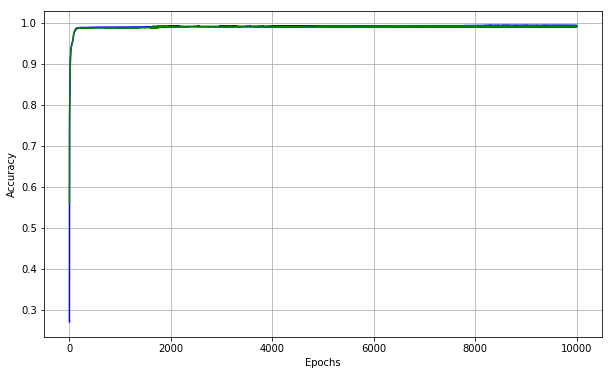

In [20]:
plt.figure(figsize=(10,6))
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(accuracy, "blue")
plt.plot(val_accuracy, "green")
plt.show()

In [21]:
epochs = [i for i in range(len(val_accuracy))]

In [22]:
def predict_occupancy(df, index):
    test_x = np.asarray([[ df["Temperature"][index], df["Humidity"][index], df["Light"][index], df["CO2"][index] ]])
    prediction = model.predict_classes(test_x)[0][0]
    if prediction == 1 : print("Room is occupied")
    else : print("Room is empty")

In [23]:
def get_index_by_timestamp(df, time_stamp):
    index = df[df["Time_Stamp"] == time_stamp].index[0]
    return index

In [24]:
index = get_index_by_timestamp(original_df, "2/2/2015 14:25")

In [25]:
predict_occupancy(df, index)

Room is empty
